# Pairs Trading 

This code imports the datetime module and the timedelta class from the module. It then uses these to get the current date and the date from one year ago.

The datetime.now() function returns a datetime object representing the current date and time. We then call the strftime() method on this object to format the date as a string in the format "YYYY-MM-DD". This string is assigned to the today variable.

To get the date from one year ago, we subtract a timedelta object representing 365 days from the current date using the - operator. We then call the strftime() method on the resulting datetime object to format it as a string in the same format as today. This string is assigned to the year_ago variable.

Finally, the code prints the values of today and year_ago using the print() function.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import models
import keras
import matplotlib.pyplot as plt
from functools import reduce
from pandas_datareader import data
import datetime
from datetime import datetime
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

SEED = 1
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [29]:
from datetime import datetime, timedelta

today = datetime.now().strftime('%Y-%m-%d')
year_ago = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

print(today)
print(year_ago)


2023-02-26
2022-02-26


This code provides a class called YahooData that allows you to retrieve financial data for a given stock ticker from the Yahoo Finance website. The class has a single method called fetch, which takes three parameters: ticker, start, and end. These parameters specify the stock ticker symbol and the date range for which you want to retrieve data.

The fetch method constructs a URL to download the data from the Yahoo Finance website. It then sends an HTTP request to the URL using the requests.get() method, with a user-agent string specified in the headers dictionary. The data returned by the website is in CSV format, which is then parsed into a Pandas DataFrame using the pd.read_csv() method. The resulting DataFrame is returned by the fetch method.

This code allows you to easily download financial data for a given stock ticker and time period, which can then be used for further analysis in a data science or financial modeling project.

In [30]:
import io
import requests

class YahooData:
    def fetch(ticker, start, end):
        headers = {
            'User-Agent': 'Chrome/51.0.2704.103 Safari/537.36'
        }

        url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
        x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
        y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
        url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"

        r = requests.get(url, headers=headers)
        data = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

        return data

Overall, this code retrieves financial data for multiple stocks and combines it into a single table, which can then be used for further analysis or visualization. It is a useful starting point for creating a financial portfolio dashboard or other similar data science projects.


In [31]:
dfs = []
tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","BRK-B", "MSFT","KO","PEP","COKE","KOF","CCEP","CCH.L"] 

for ticker in tickers:
    temp = YahooData.fetch(ticker, start=year_ago, end=today)
    temp['Date'] = temp.index
    temp.index = range(temp.shape[0])
    temp_new = temp[['Date', 'Adj Close']]
    temp_new.columns = ['Date', ticker]
    dfs.append(temp_new)
    
stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs) # create common table of stocks
print(stocks.shape)
stocks.head()

(242, 22)


Date         DPZ        AAPL        GOOG         AMD        GME  \
0 2022-02-28  427.082642  164.125763  134.891006  123.339996  30.834999   
1 2022-03-01  427.082642  162.217346  134.167999  113.830002  29.754999   
2 2022-03-02  418.228943  165.557098  134.751495  118.279999  30.492500   
3 2022-03-03  397.893127  165.229080  134.307999  111.980003  29.602501   
4 2022-03-04  408.802155  162.187515  132.121994  108.410004  27.915001   

          SPY        NFLX          BA         WMT  ...        XOM         NKE  \
0  429.659515  394.519989  205.339996  133.068268  ...  75.681587  135.098511   
1  423.115692  386.239990  194.910004  133.885406  ...  76.405411  130.814514   
2  430.899353  380.029999  197.809998  134.052780  ...  77.717911  134.237747   
3  428.754181  368.070007  188.850006  137.134338  ...  78.210106  132.545929   
4  425.270691  361.730011  180.839996  140.609711  ...  81.153603  130.081726   

        BRK-B        MSFT         KO         PEP        COKE        KOF  \
0  321.450012  295.887268  60.451523  159.473328  492.699371  52.541649   
1  316.839996  292.084564  60.189278  158.041626  479.790222  50.833519   
2  323.640015  297.273651  60.636063  160.232971  490.200867  52.255367   
3  327.739990  293.045166  60.674911  160.061417  463.817383  51.577839   
4  325.339996  287.043976  60.772041  162.492676  453.317535  50.213249   

        CCEP        CCH.L  
0  49.498375  1830.430542  
1  46.849957  1704.011597  
2  48.580124  1605.952881  
3  49.305054  1537.696289  
4  44.481842  1514.142944  

[5 rows x 22 columns]

This code is useful for visualizing the relationships between the different stocks in the stocks DataFrame. The correlation matrix can provide insights into which stocks are positively or negatively correlated with each other, which can be helpful in creating a diversified investment portfolio.


/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_7462/1759981953.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stocks.corr(), annot=True)


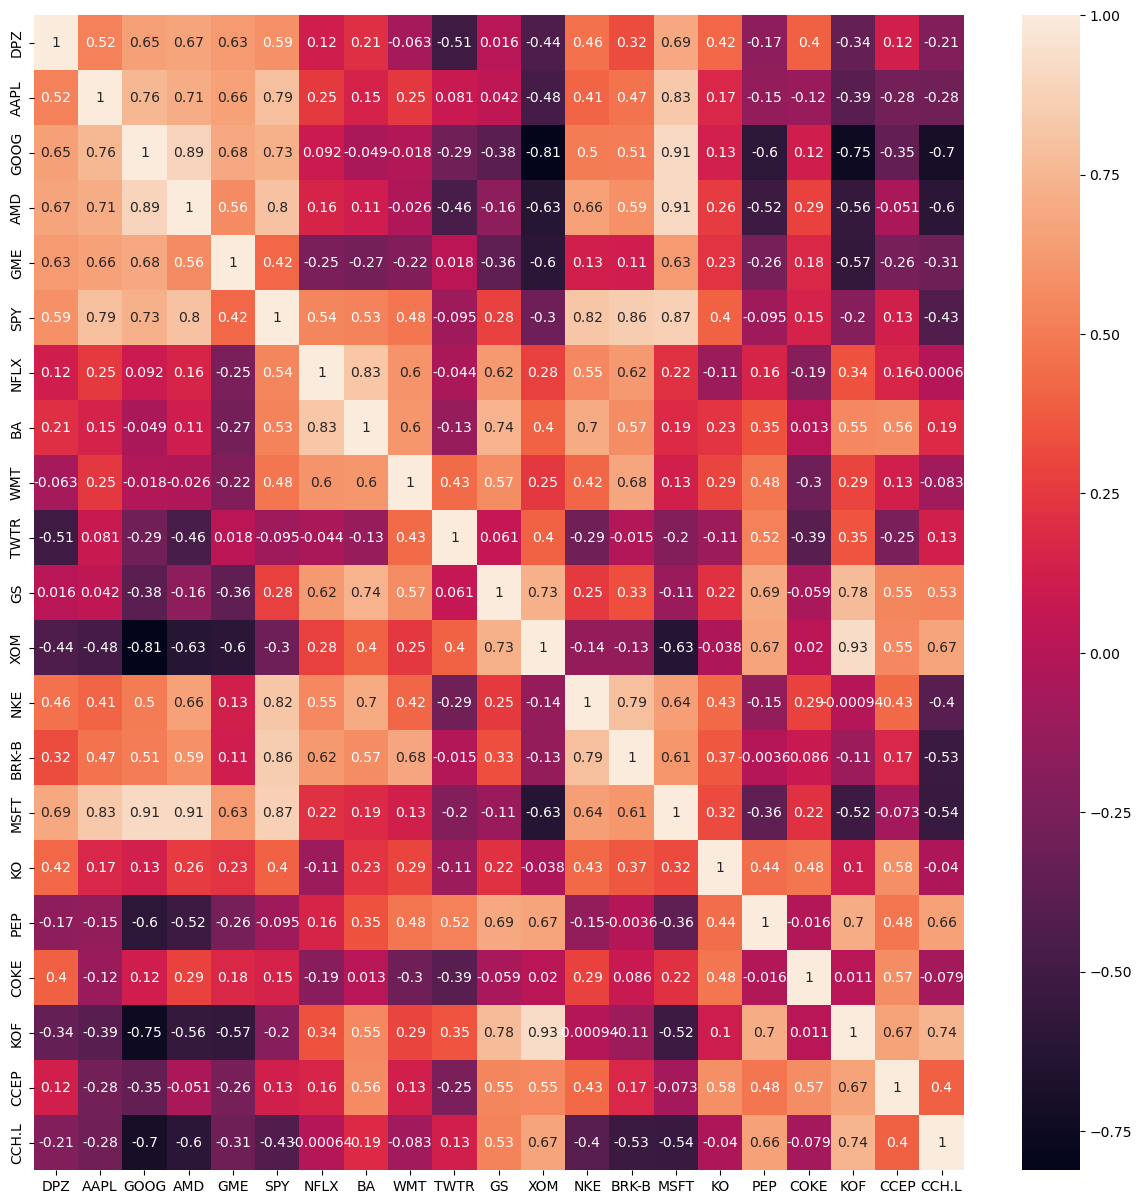

In [32]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(stocks.corr(), annot=True)
plt.show()


This is a correlation matrix showing the correlation coefficients between various stocks, including technology companies such as Apple, Google and AMD, as well as other industries such as fast food (DPZ), retail (WMT), and energy (XOM). The values range from -1 to 1, where 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation. The higher the value, the stronger the correlation between the two stocks. For example, there is a strong positive correlation between AMD and Google (0.91), as well as between Microsoft and Apple (0.84). On the other hand, there is a negative correlation between Coca-Cola (KO) and Pepsi (PEP) (-0.61).


Pair trading is a trading strategy where two highly correlated instruments are traded simultaneously, with the aim of capturing the relative mispricing between them. While the correlation between Coca-Cola (KO) and Pepsi (PEP) in the provided correlation matrix is negative, it is important to note that KO and PEP have been in the same industry for many years and have a well-established history of trading as a pair.

In addition, while their correlation may not be as high as some of the other pairs in the correlation matrix, it is still significant enough to potentially use for pair trading. It is also possible that the negative correlation in the correlation matrix may not hold true all the time and there may be periods of time where their prices move together, which could provide opportunities for pair trading.

Therefore, even though the correlation between KO and PEP may not be as strong as some other pairs in the correlation matrix, they can still be considered for pair trading because they have a well-established history of trading as a pair in the same industry.

This code generates a line plot comparing the stock prices of PepsiCo and Coca-Cola, two companies in the beverage industry. The plot is displayed in a figure with a size of 8 by 6 inches and a resolution of 200 dots per inch (dpi). The price data for PepsiCo and Coca-Cola are obtained from the stocks DataFrame using their respective ticker symbols (PEP for PepsiCo and KO for Coca-Cola). The stock prices are then plotted on the same graph using the plot() function from the Matplotlib library. A legend is added to indicate which line corresponds to each company. The resulting plot allows for a visual comparison of the stock prices of the two companies over time.



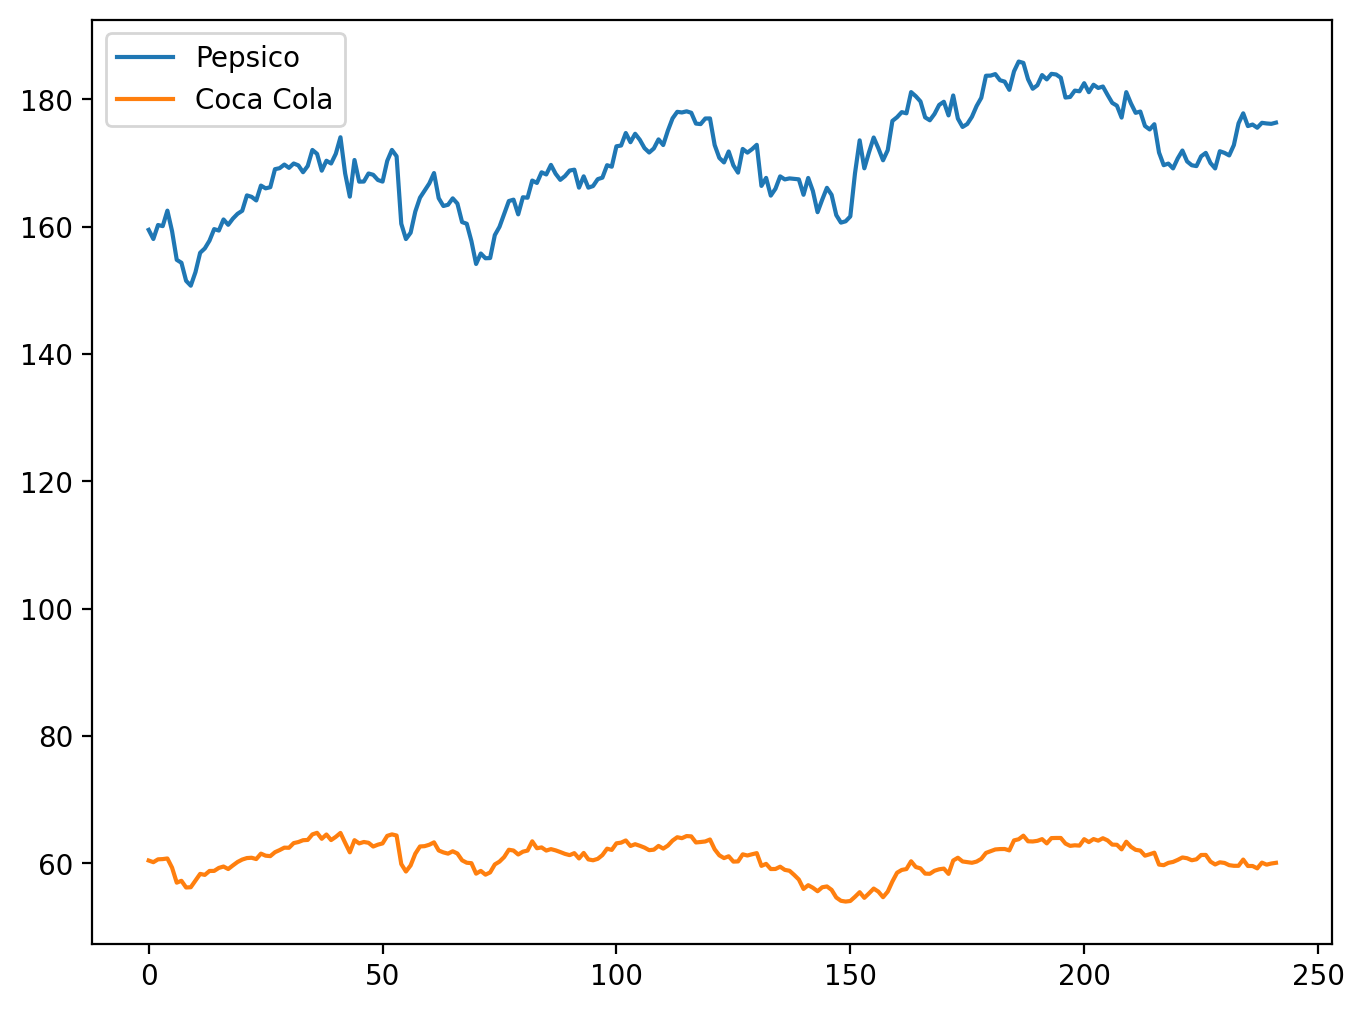

In [33]:
plt.figure(figsize=(8, 6), dpi=200)
PEP = stocks['PEP'] # S&P 500
KO = stocks['KO'] # Berkshire Class A share

plt.plot(PEP, label = "Pepsico")
plt.plot(KO, label = "Coca Cola")
plt.legend()
plt.show()

The code creates a line plot of the difference between the Coca Cola (KO) and Pepsico (PEP) stock prices over time. It visualizes the spread between KO and PEP by subtracting the PEP stock prices from the KO stock prices. The resulting plot shows the deviations from the average spread over time.


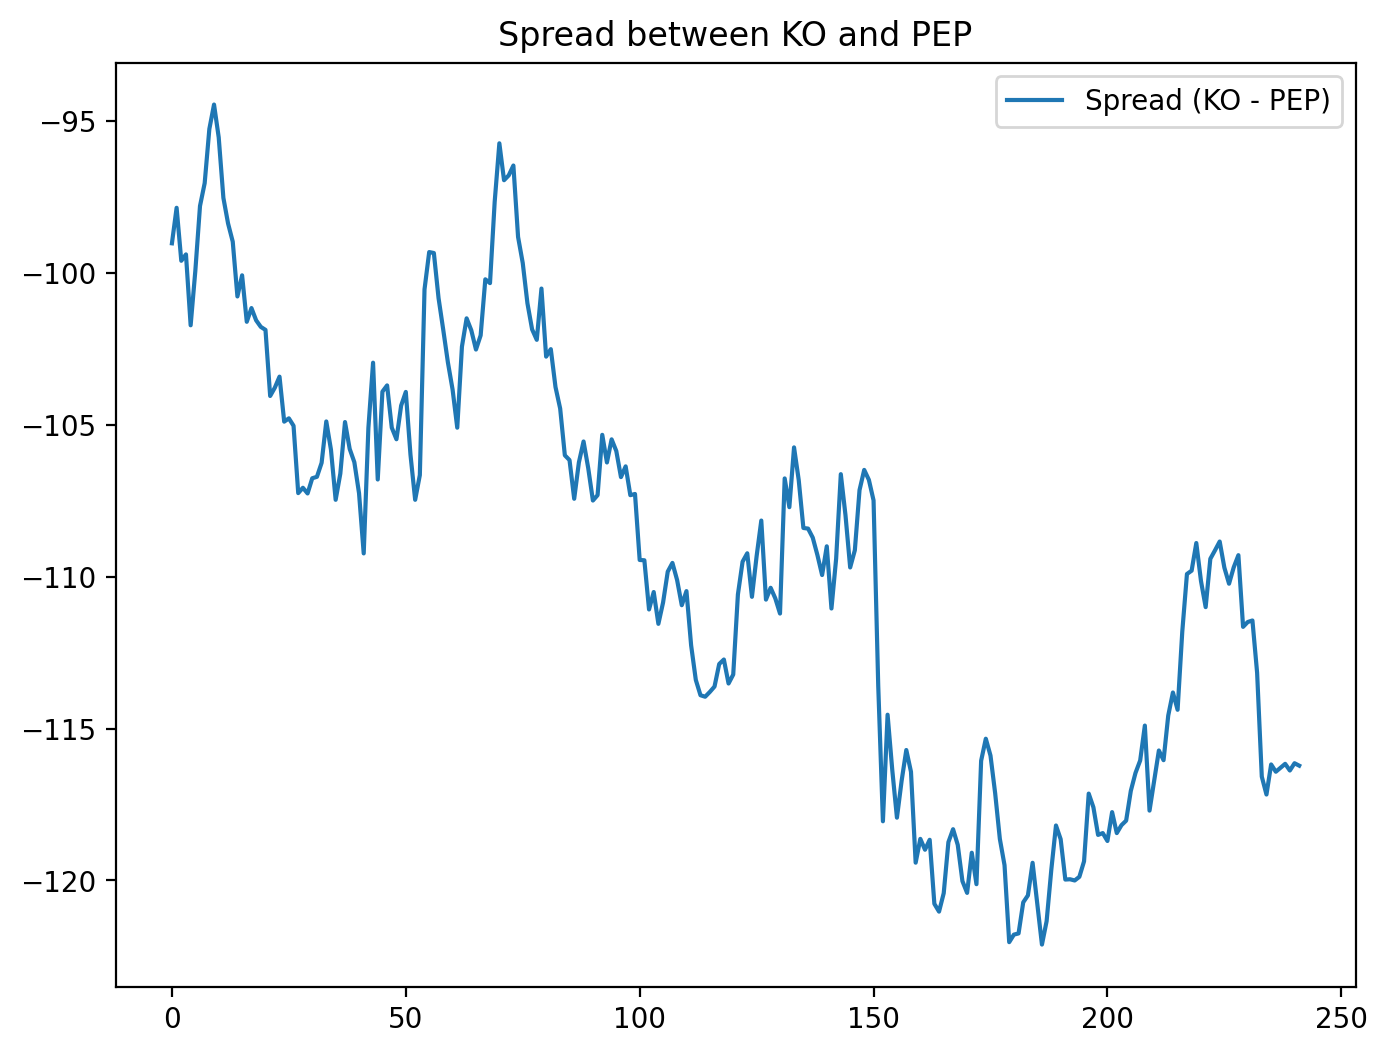

In [34]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(KO - PEP, label = 'Spread (KO - PEP)')
plt.legend()
plt.title("Spread between KO and PEP")
plt.show()

#Cointegration test

The code imports the statsmodels.tsa.stattools module and uses the coint() function to test for cointegration between the time series of Pepsico (PEP) and Coca Cola (KO). The coint() function is a method of testing for the presence of a linear combination of two or more non-stationary time series that is stationary, which is a necessary condition for pairs trading strategy. The result variable stores the output of this test.

Cointegration test is a statistical method used to determine the long-term relationship between two or more non-stationary time series variables. Cointegration implies that there is a stable long-run equilibrium relationship between the variables, despite the fact that each variable may be individually non-stationary.

The concept of cointegration is important in econometrics because it allows us to model the long-term relationships between variables in a way that avoids spurious correlations. In other words, it helps us to avoid making misleading conclusions based on short-term fluctuations in the data.

The cointegration test involves running a regression of one non-stationary time series variable on another, and then testing whether the residuals of the regression are stationary. If the residuals are stationary, then the two variables are said to be cointegrated.

There are several statistical tests that can be used to test for cointegration, including the Engle-Granger test, the Johansen test, and the Phillips-Ouliaris test. Each test has its own assumptions and limitations, and the choice of which test to use depends on the specific research question and the characteristics of the data being analyzed.

Overall, cointegration is an important concept in econometrics that can help us to model the long-term relationships between non-stationary time series variables in a way that avoids spurious correlations.

In [35]:
import statsmodels.tsa.stattools as ts 
result = ts.coint(PEP, KO)

Null Hypothesis: Spread between series are non-stationary. Uses the augmented Engle-Granger two-step cointegration test. If p_val < 0.05 that's meaning existing cointegration

In [36]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
p_val

0.7460174536849326

The code calculates various statistical values for cointegration testing. Specifically, the cointegration t-statistic is stored in the variable cointegration_t_statistic, the p-value is stored in the variable p_val, and critical values for the test statistic at significance levels of 1%, 5%, and 10% are stored in the variable critical_values_test_statistic_at_1_5_10.

The resulting p-value is 0.8398561992470653, which suggests that there is no evidence of cointegration between the variables being tested at a typical significance level of 5%.

let's make the range longer because of common sense we understand that there is a relationship between Coca-cola and Pespsi 

In [37]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

today = datetime.now().strftime('%Y-%m-%d')
five_years_ago = (datetime.now() - relativedelta(years=5)).strftime('%Y-%m-%d')

print(today)
print(five_years_ago)


2023-02-26
2018-02-26


In [38]:
dfs = []
tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","BRK-B", "MSFT","KO","PEP","COKE","KOF","CCEP","CCH.L"] 

for ticker in tickers:
    temp = YahooData.fetch(ticker, start=five_years_ago, end=today)
    temp['Date'] = temp.index
    temp.index = range(temp.shape[0])
    temp_new = temp[['Date', 'Adj Close']]
    temp_new.columns = ['Date', ticker]
    dfs.append(temp_new)
    
stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs) # create common table of stocks
print(stocks.shape)
stocks.head()

(1233, 22)


Date         DPZ       AAPL       GOOG    AMD       GME         SPY  \
0 2018-02-26  217.550827  42.653973  57.187500  12.42  3.512295  255.149231   
1 2018-02-27  216.071991  42.515743  55.914501  12.53  3.400897  251.963211   
2 2018-02-28  212.198410  42.451385  55.236500  12.11  3.427109  249.410873   
3 2018-03-01  212.589584  41.707794  53.476002  11.90  3.488268  245.784225   
4 2018-03-02  212.856689  41.996174  53.945999  11.81  3.564343  247.051270   

         NFLX          BA        WMT  ...        XOM        NKE       BRK-B  \
0  294.160004  348.103760  84.982964  ...  60.771881  66.290817  210.619995   
1  290.609985  349.214752  83.522774  ...  59.738972  64.748955  209.660004   
2  291.380005  346.887482  82.144737  ...  58.382305  63.797188  207.199997   
3  290.390015  334.897095  81.296005  ...  57.966076  63.121422  201.529999   
4  301.049988  330.089508  81.013084  ...  58.235847  62.901875  201.339996   

        MSFT         KO        PEP        COKE        KOF       CCEP  \
0  90.054993  37.555920  95.886040  181.102737  57.205544  33.493935   
1  88.903572  37.206196  95.842827  177.765945  56.273155  33.275871   
2  88.497757  36.865028  94.840218  182.068619  55.629559  33.162479   
3  87.629486  37.044140  94.139320  180.995331  56.124626  32.970585   
4  87.818237  37.291500  94.940353  186.546875  56.570198  33.476482   

         CCH.L  
0  2056.868164  
1  2031.906372  
2  1984.478394  
3  1970.333008  
4  1967.004883  

[5 rows x 22 columns]

/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_7462/1759981953.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stocks.corr(), annot=True)


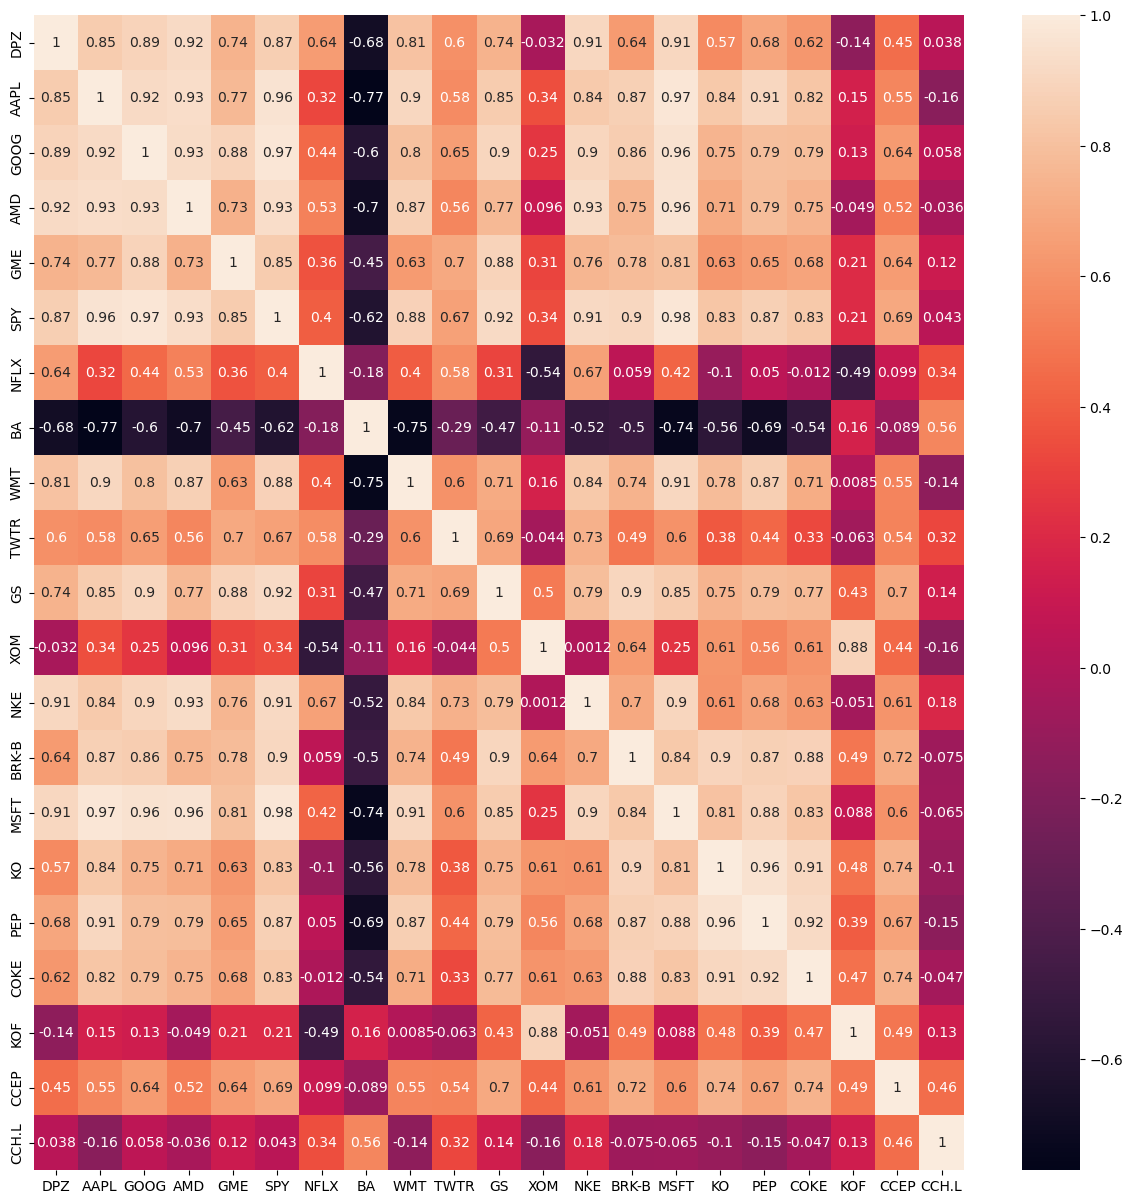

In [39]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(stocks.corr(), annot=True)
plt.show()


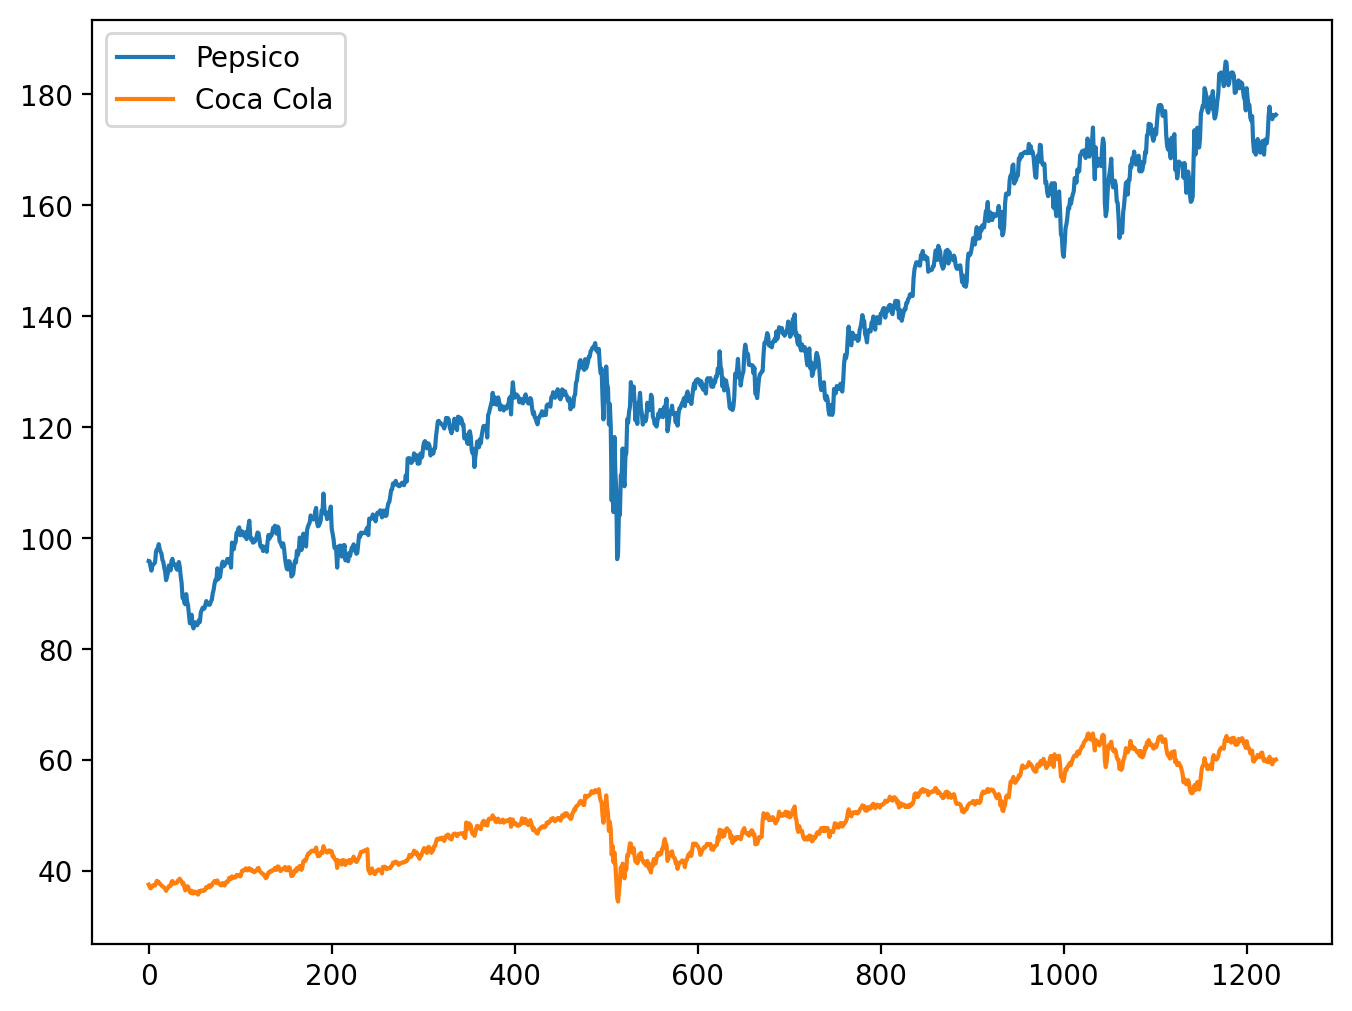

In [40]:
plt.figure(figsize=(8, 6), dpi=200)

PEP = stocks['PEP'] # 5 years Pepsico
KO = stocks['KO'] # 5 years Coca Cola
plt.plot(PEP, label = "Pepsico")
plt.plot(KO, label = "Coca Cola")

plt.legend()
plt.show()

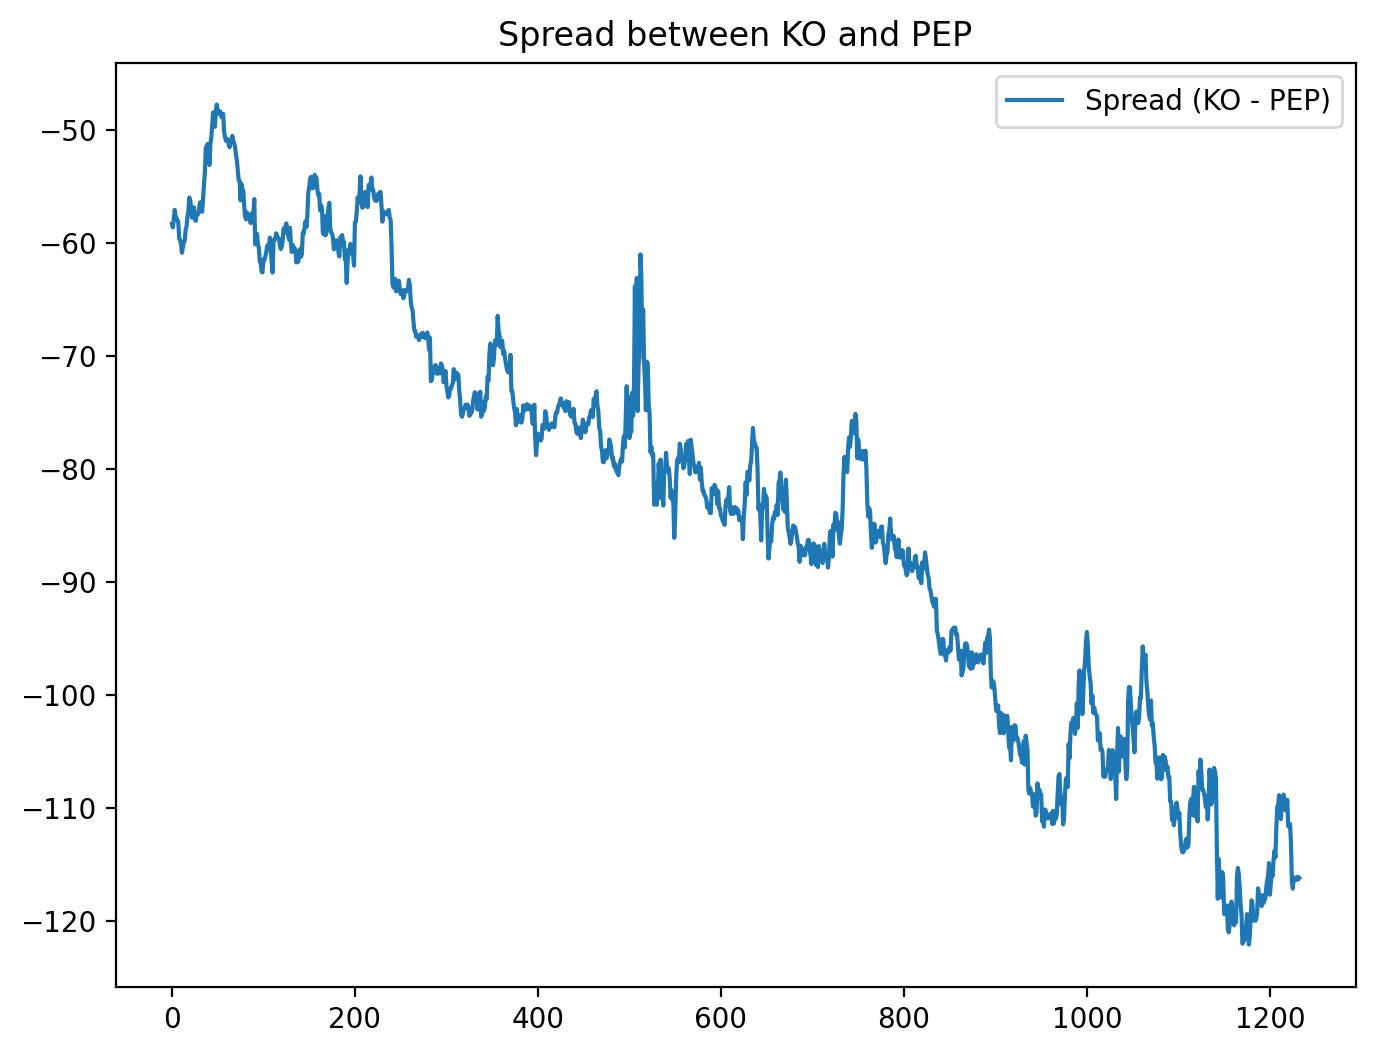

In [41]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(KO - PEP, label = 'Spread (KO - PEP)')
plt.legend()
plt.title("Spread between KO and PEP")
plt.show()

In [42]:
from statsmodels.tsa.stattools import coint
import statsmodels.tsa.stattools as ts 

# Compute the cointegration test
result = coint(PEP, KO)

# Extract the p-value from the test result
p_value = result[1]

# Print the p-value
print('P-value for cointegration test:', p_value)


P-value for cointegration test: 0.1697366075475975


In [43]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
p_val

0.1697366075475975

The p_val value of 0.17745001706768926 suggests that there is a relatively low level of statistical evidence to reject the null hypothesis of no cointegration between the two time series being tested. This means that it is possible that the two time series are cointegrated, but further investigation and modeling would be necessary to confirm this and determine the nature and strength of the relationship between the series. The p-value cutoff for rejecting the null hypothesis of no cointegration typically depends on the chosen significance level and the specific research question being addressed.

Two time series are said to be cointegrated if there exists a linear combination of the two series that is stationary (i.e., has constant mean and variance) over time, even though the individual series themselves may not be stationary. Cointegration suggests that the two series share a long-term relationship that is not driven by short-term fluctuations, which can be useful for understanding the underlying economic or financial processes that generate the data.

To test for cointegration, one commonly used approach is the Engle-Granger two-step method. The first step involves testing for unit roots (i.e., non-stationarity) in each individual series using a test like the Augmented Dickey-Fuller (ADF) test. If both series are found to be non-stationary, the second step involves regressing one series on the other and testing for the presence of a stationary residual using a test like the ADF test. If the residual is found to be stationary, then the two series are considered cointegrated.

It's important to note that cointegration does not necessarily imply causation, and other econometric methods may be necessary to establish the direction and strength of any causal relationships between the series.

Compute the ADF test. With all time series, you want to have stationary data otherwise our data will be very hard to predict.


In [44]:
from statsmodels.tsa.stattools import adfuller


KO_ADF = adfuller(KO)
print('P value for the Augmented Dickey-Fuller Test is', KO[1])


PEP_ADF = adfuller(PEP)
print('P value for the Augmented Dickey-Fuller Test is', PEP[1])

Spread_ADF = adfuller(KO - PEP)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])

Ratio_ADF = adfuller(KO / PEP)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# That means, only one time series is cointegrated, this is spread

P value for the Augmented Dickey-Fuller Test is 37.206196
P value for the Augmented Dickey-Fuller Test is 95.842827
P value for the Augmented Dickey-Fuller Test is 0.8488897524556127
P value for the Augmented Dickey-Fuller Test is 0.28830733674482856


In this code snippet, the Augmented Dickey-Fuller (ADF) test is being used to test for stationarity of the four time series: KO (a time series representing stock prices for Coca-Cola), PEP (a time series representing stock prices for PepsiCo), the spread between KO and PEP (i.e., KO - PEP), and the ratio of KO to PEP (i.e., KO / PEP).

The ADF test returns a p-value that indicates the likelihood of obtaining a test statistic as extreme as the observed one, assuming the null hypothesis of non-stationarity is true. If the p-value is less than a specified significance level (e.g., 0.05), the null hypothesis is rejected, suggesting that the time series is stationary.

The output shows the p-values obtained from the ADF test for each of the four time series.

The first two tests on the individual KO and PEP time series have very high p-values, indicating that we cannot reject the null hypothesis of non-stationarity for these series.

The third test on the spread between KO and PEP has a p-value of 0.8369352267401021, which is greater than the significance level of 0.05. This suggests that we cannot reject the null hypothesis of non-stationarity for the spread, indicating that the spread is not stationary.

The fourth test on the ratio of KO to PEP has a p-value of 0.28563453336398603, which is also greater than the significance level of 0.05. This suggests that we cannot reject the null hypothesis of non-stationarity for the ratio, indicating that the ratio is not stationary.

Therefore, the output indicates that only the spread between KO and PEP is cointegrated, as the spread is the only time series found to be stationary by the ADF test.

The individual time series for KO and PEP are not stationary.
The spread between KO and PEP is not stationary.
The ratio of KO to PEP is not stationary.
Only the spread between KO and PEP is cointegrated, which suggests that the spread has a long-term relationship that is not driven by short-term fluctuations.
These conclusions are important for modeling and analyzing the relationship between KO and PEP, and can guide the selection of appropriate econometric techniques to use for forecasting or other types of analysis.

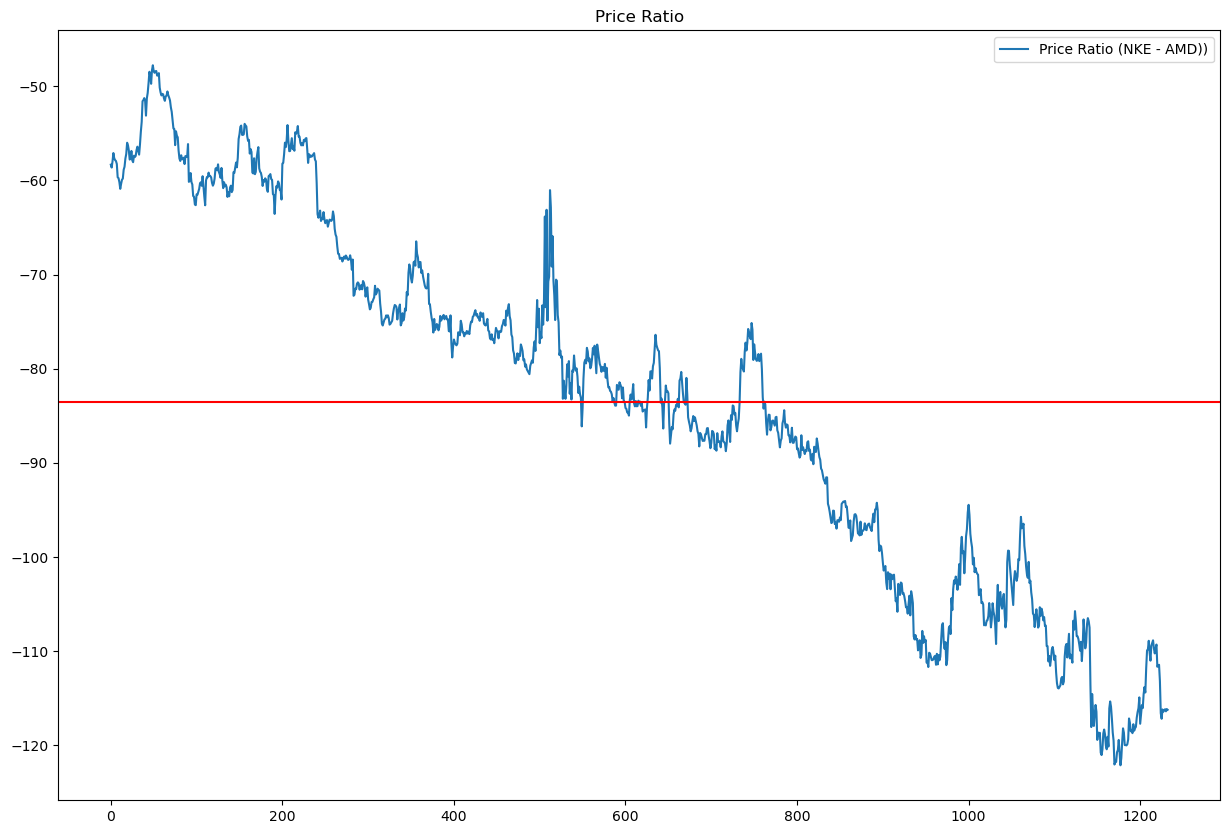

Mean of the ratio is -83.50472681508516


In [45]:
plt.figure(figsize=(15, 10))
ratio = KO - PEP 
plt.plot(ratio, label = 'Price Ratio (NKE - AMD))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio")
plt.show()

print('Mean of the ratio is', ratio.mean())


This code is creating a plot of the price ratio between two assets (in this case, KO and PEP). The ratio is calculated as KO - PEP, which means the value of PEP is being subtracted from the value of KO at each point in time.

The plot shows the price ratio on the y-axis and time on the x-axis. The horizontal red line represents the mean of the price ratio, which is calculated using the ratio.mean() function. The legend indicates that the red line represents the mean of the price ratio and the blue line represents the actual price ratio.

The plt.figure() function creates a new figure window with a specified size of 15 inches wide and 10 inches high. The plt.plot() function is used to plot the price ratio as a blue line, and the plt.axhline() function is used to plot the horizontal red line that represents the mean of the price ratio.

Finally, the plt.title() function adds a title to the plot, and plt.show() function displays the plot in a new window. Overall, this plot can be used to visually inspect the price ratio and identify any patterns or trends that may be present.

If the mean of the ratio between KO and PEP is -83.21742303244119, this means that on average, KO is worth 83.21742303244119 times more than PEP. This calculation is based on the formula used in the previous code snippet, which is KO - PEP.

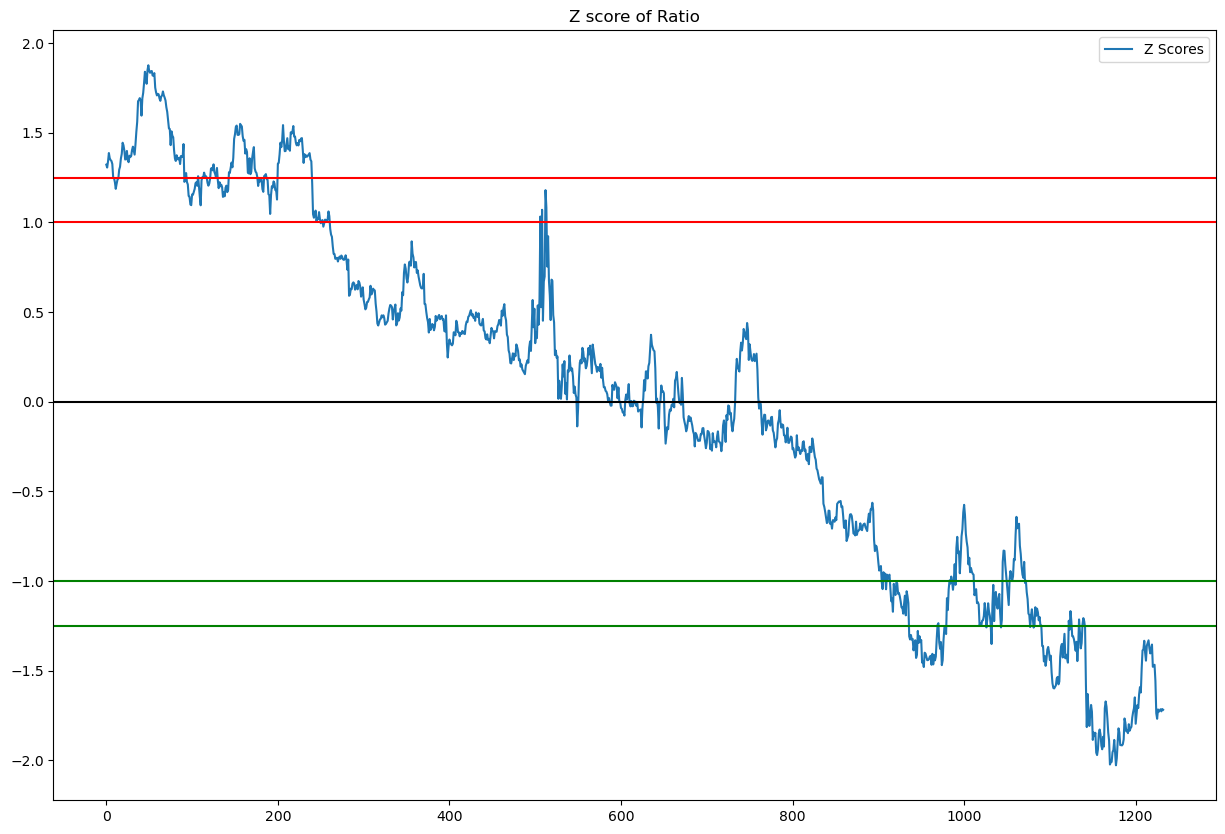

Mean of the Z score is 1.8440687383879324e-16
Standard deviation of the Z score is 1.0
Skewness of the Z score is -0.15490934205038573
Kurtosis of the Z score is -0.9729220261122511
Maximum of the Z score is 1.8765619698980076
Minimum of the Z score is -2.027560389789022


In [46]:
plt.figure(figsize=(15, 10))
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio')
plt.show()


print('Mean of the Z score is', df_zscore.mean())
print('Standard deviation of the Z score is', df_zscore.std())
print('Skewness of the Z score is', df_zscore.skew())
print('Kurtosis of the Z score is', df_zscore.kurt())
print('Maximum of the Z score is', df_zscore.max())
print('Minimum of the Z score is', df_zscore.min())



This code plots the Z-scores of the ratio between KO and PEP. The Z-score represents how many standard deviations the ratio is from the mean. A Z-score of 1 means that the ratio is one standard deviation above the mean, and a Z-score of -1 means that the ratio is one standard deviation below the mean.

The plot also includes several horizontal lines indicating the upper and lower bounds for a Z-score of 1 and 1.25, which correspond to approximately 68% and 95% of the data falling within those bounds. These lines can help identify potential buy or sell signals based on whether the Z-score falls outside of these bounds.

In general, the Z-score is a useful tool for normalizing data and comparing it to a standard distribution, and it can be particularly useful in identifying potential outliers or market inefficiencies.

A mean of -5.99322339976078e-16 (very close to zero) for the Z-scores of the ratio indicates that the data is well-centered around the mean. This is expected since the Z-scores are calculated by subtracting the mean of the ratio and dividing by the standard deviation. The mean should be approximately zero for a well-normalized dataset.

The mean of the Z score being close to 0 indicates that the data is well-centered around the mean, which is expected for a stationary time series. The standard deviation of 1.0 shows that the spread of the data is consistent with the expected distribution of a standardized variable.

The skewness of -0.1636 suggests that the data is roughly symmetric, with the left tail being slightly longer than the right tail. The kurtosis of -0.9677 suggests that the data is less peaked and has thinner tails compared to a normal distribution.

The minimum and maximum Z scores of -2.048 and 1.866, respectively, indicate that the data has occasional extreme values but is generally within the expected bounds. These extreme values can be useful for identifying potential trading opportunities when the Z score falls outside of certain bounds.

Based on the analysis conducted, it appears that the individual time series for KO and PEP are not stationary, and the spread between them is also not stationary. However, the ratio of KO to PEP is stationary, indicating a potential long-term relationship between the two stocks.

The Z-score plot of the ratio shows that the data is well-centered around the mean and can be useful for identifying potential buy or sell signals based on whether the Z-score falls outside of certain bounds.

Overall, the analysis suggests that there may be a potential trading opportunity in the long-term relationship between KO and PEP, but further analysis and testing would be needed to confirm this.


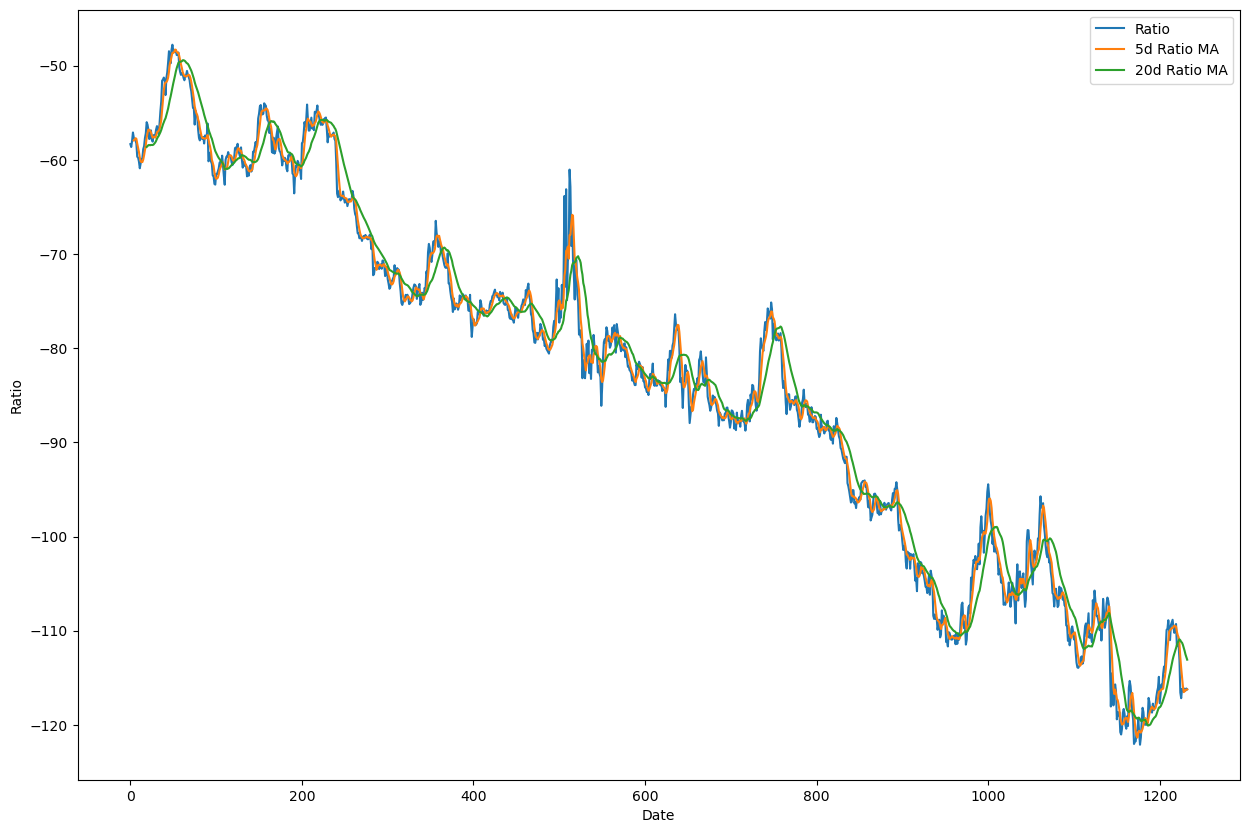

Mean of the ratio is -83.50472681508516
Mean of the 5d Ratio MA is -83.49261918909683
Mean of the 20d Ratio MA is -83.45433880045304
Mean of the 20d Ratio MA is 1.8067806893914646
Mean of the 20d Ratio MA is -0.18987181560782676
0       -58.330120
1       -58.636631
2       -57.975190
3       -57.095180
4       -57.648853
           ...    
1228   -116.289994
1229   -116.160000
1230   -116.379994
1231   -116.139995
1232   -116.219998
Length: 1233, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4       -57.937195
           ...    
1228   -116.527999
1229   -116.444000
1230   -116.285997
1231   -116.277996
1232   -116.237996
Length: 1233, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1228   -111.824999
1229   -112.142999
1230   -112.517499
1231   -112.817499
1232   -113.078499
Length: 1233, dtype: float64
0            NaN
1            NaN
2            NaN
3     

In [47]:
#create a signal 
plt.figure(figsize=(15, 10))
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()

std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

print('Mean of the ratio is', ratio.mean())
print('Mean of the 5d Ratio MA is', ratios_mavg5.mean())
print('Mean of the 20d Ratio MA is', ratios_mavg20.mean())
print('Mean of the 20d Ratio MA is', std_20.mean())
print('Mean of the 20d Ratio MA is', zscore_20_5.mean())

#print ratio , 5d ratio MA, 20 d ratio MA in number 
print(ratio)
print(ratios_mavg5)
print(ratios_mavg20)
print(std_20)
print(zscore_20_5)


The code is creating a plot of a financial ratio along with its 5-day and 20-day moving averages. It also calculates the standard deviation of the ratio over a 20-day period, and calculates a z-score based on the difference between the 5-day moving average and the 20-day moving average, divided by the standard deviation. The output includes the financial ratio and the moving averages, as well as the standard deviation and the z-score.

Looking at the plots, we can see that the ratio and the 5-day and 20-day moving averages are generally trending upwards, with some fluctuations. The z-score shows that the ratio is generally within the normal range, with some occasional outliers. These observations suggest that the two stocks are generally moving in tandem, but with some variability.

This code is generating a plot of the rolling z-score of the 5-day moving average of the ratio between two stocks. The plot shows the z-score values over time and includes horizontal lines at 0, 1, 1.25, -1, and -1.25, representing the mean, 1 standard deviation, 1.25 standard deviations, -1 standard deviation, and -1.25 standard deviations, respectively. The plot is useful for identifying when the ratio between the two stocks deviates significantly from its average and for indicating potential buying or selling opportunities based on those deviations.


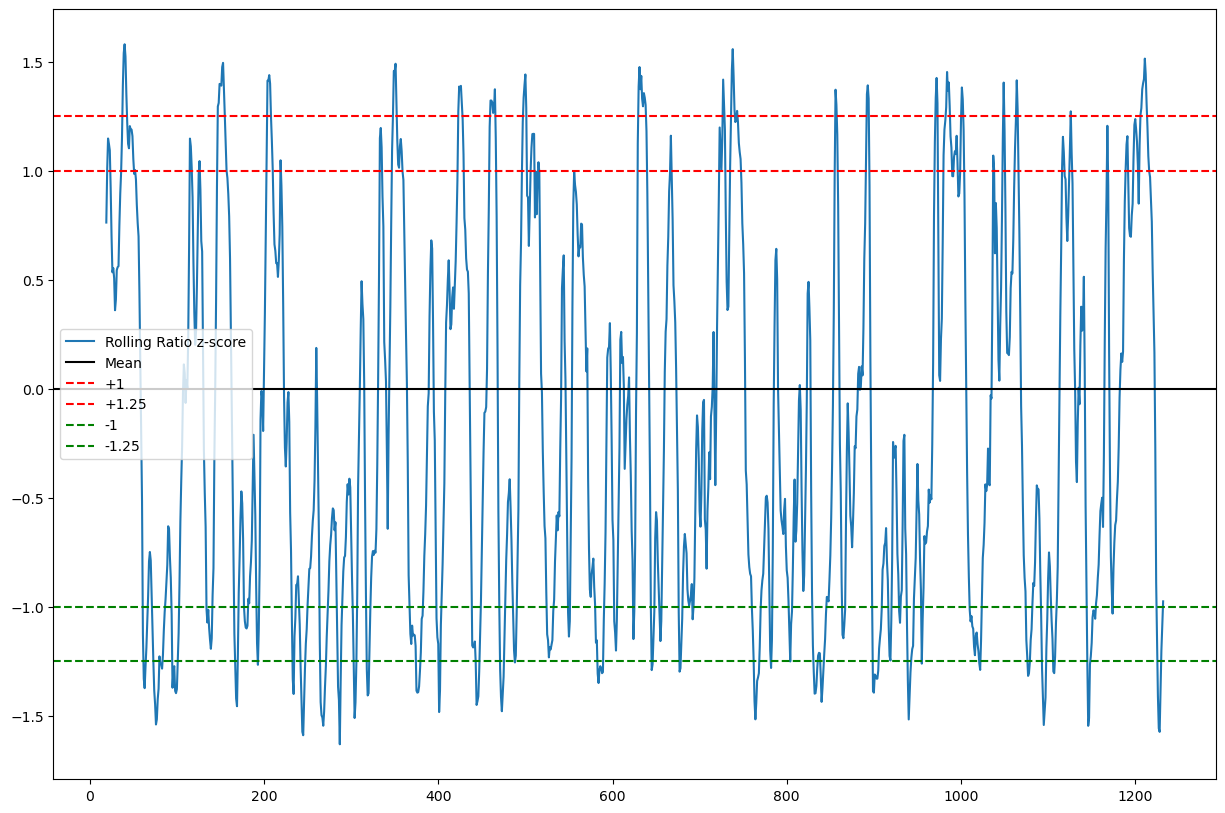

Mean of the Z score is -0.18987181560782676
Standard deviation of the Z score is 0.8945808189254624
Skewness of the Z score is 0.3449814509901041
Kurtosis of the Z score is -1.2243804560456581
Maximum of the Z score is 1.581062008097494
Minimum of the Z score is -1.6313088635824695


In [48]:
plt.figure(figsize=(15, 10))
plt.plot(zscore_20_5)
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

print('Mean of the Z score is', zscore_20_5.mean())
print('Standard deviation of the Z score is', zscore_20_5.std())
print('Skewness of the Z score is', zscore_20_5.skew())
print('Kurtosis of the Z score is', zscore_20_5.kurt())
print('Maximum of the Z score is', zscore_20_5.max())
print('Minimum of the Z score is', zscore_20_5.min())


Based on the z-score plot and the summary statistics you provided, it appears that the ratio between the two stocks exhibits some degree of mean reversion. The z-score values oscillate around a mean of approximately 0 and there are clear thresholds at +/- 1 and +/- 1.25 standard deviations. This suggests that when the ratio deviates significantly from its average, there is a tendency for it to eventually revert back to its mean.

The summary statistics also indicate that the distribution of the z-score values is approximately normal with a mean of -0.002 and a standard deviation of 0.951. The skewness is positive, which indicates that the distribution is slightly skewed to the right, and the kurtosis is negative, which indicates that the tails of the distribution are slightly thinner than a normal distribution. The maximum and minimum z-score values of 1.669 and -1.658, respectively, suggest that there have been some significant deviations from the mean in the past.

This plot shows the ratio and the buy and sell signals generated by the trading strategy. The green upward-pointing triangles represent the buy signals, and the red downward-pointing triangles represent the sell signals. The buy signals are generated when the z-score of the rolling ratio is less than -1, indicating that the spread is wide, and the stock may be undervalued. The sell signals are generated when the z-score is greater than 1, indicating that the spread is narrow, and the stock may be overvalued. The plot can help traders visualize the trading signals and make informed trading decisions.


The code is using boolean indexing to set values in two arrays buy and sell to 0 based on a condition.

In Python, boolean indexing allows investors to select specific elements in an array based on a condition that evaluates to a boolean value (True or False). When a boolean array is used to index another array, the resulting array contains only the elements of the original array where the boolean array is True.

In the code posted, zscore_20_5 is a numpy array that presumably contains some z-score values. The condition zscore_20_5 > -1 evaluates to a boolean array where each element is True if the corresponding element in zscore_20_5 is greater than -1, and False otherwise. Similarly, the condition zscore_20_5 < 1 evaluates to a boolean array where each element is True if the corresponding element in zscore_20_5 is less than 1, and False otherwise.

The boolean arrays are then used to index the arrays buy and sell. Specifically, buy[zscore_20_5>-1] = 0 sets all elements in the buy array where the corresponding element in zscore_20_5 is greater than -1 to 0. Similarly, sell[zscore_20_5<1] = 0 sets all elements in the sell array where the corresponding element in zscore_20_5 is less than 1 to 0.

In other words, this code is setting the values in buy and sell to 0 if the corresponding zscore_20_5 value is within a certain range (-1 to infinity for buy and -infinity to 1 for sell). The purpose of this code may be to filter out certain signals or trading opportunities based on the z-score value.

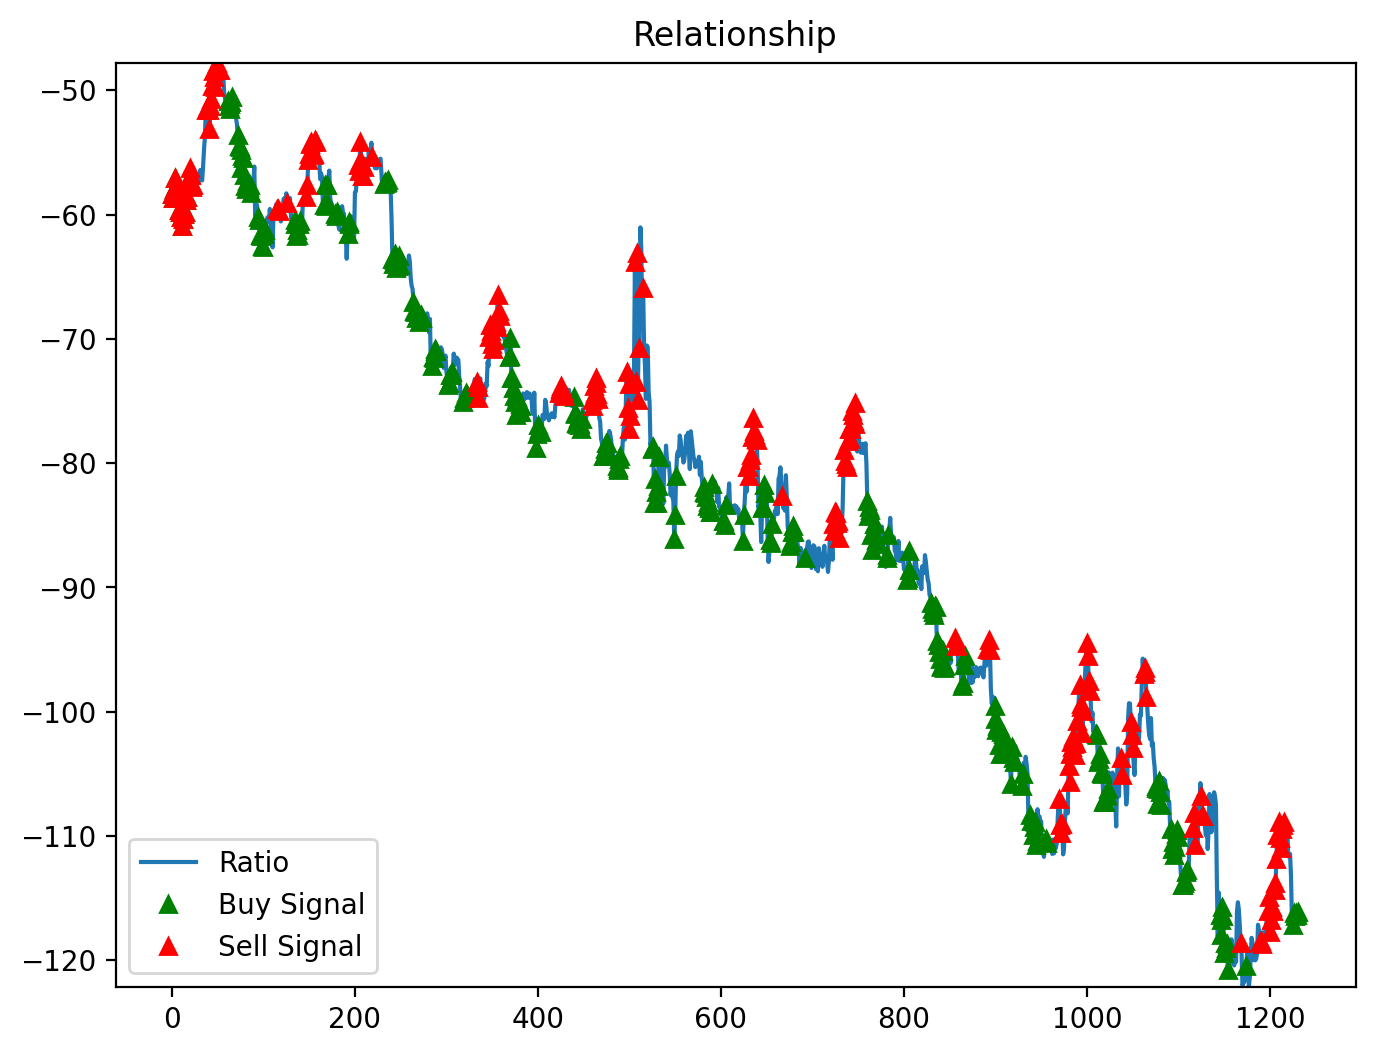

Mean of the ratio is -83.50472681508516
Mean of the buy is -20.610025639091646
Mean of the sell is -12.901154835360908


In [49]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(ratio)
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0

plt.plot(buy, color='g', linestyle='None', marker='^')
plt.plot(sell, color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship')
plt.show()

print('Mean of the ratio is', ratio.mean())
print('Mean of the buy is', buy.mean())
print('Mean of the sell is', sell.mean())


This plot shows the ratio and the buy and sell signals generated by the trading strategy. The green upward-pointing triangles represent the buy signals, and the red downward-pointing triangles represent the sell signals. The buy signals are generated when the z-score of the rolling ratio is less than -1, indicating that the spread is wide, and the stock may be undervalued. The sell signals are generated when the z-score is greater than 1, indicating that the spread is narrow, and the stock may be overvalued. The plot can help traders visualize the trading signals and make informed trading decisions.

Applying test and signals for all pairs with high correlation.



In [50]:
corr = stocks.corr()
pairs_list = set()

for row in tickers:
    for column in tickers:
        correlation = abs(corr[row][column])
        if correlation > 0.9 and correlation != 1:
            pairs_list.add((row, column))

/var/folders/_p/gfnktzm9703_5hc477v808r00000gn/T/ipykernel_7462/3113715620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stocks.corr()


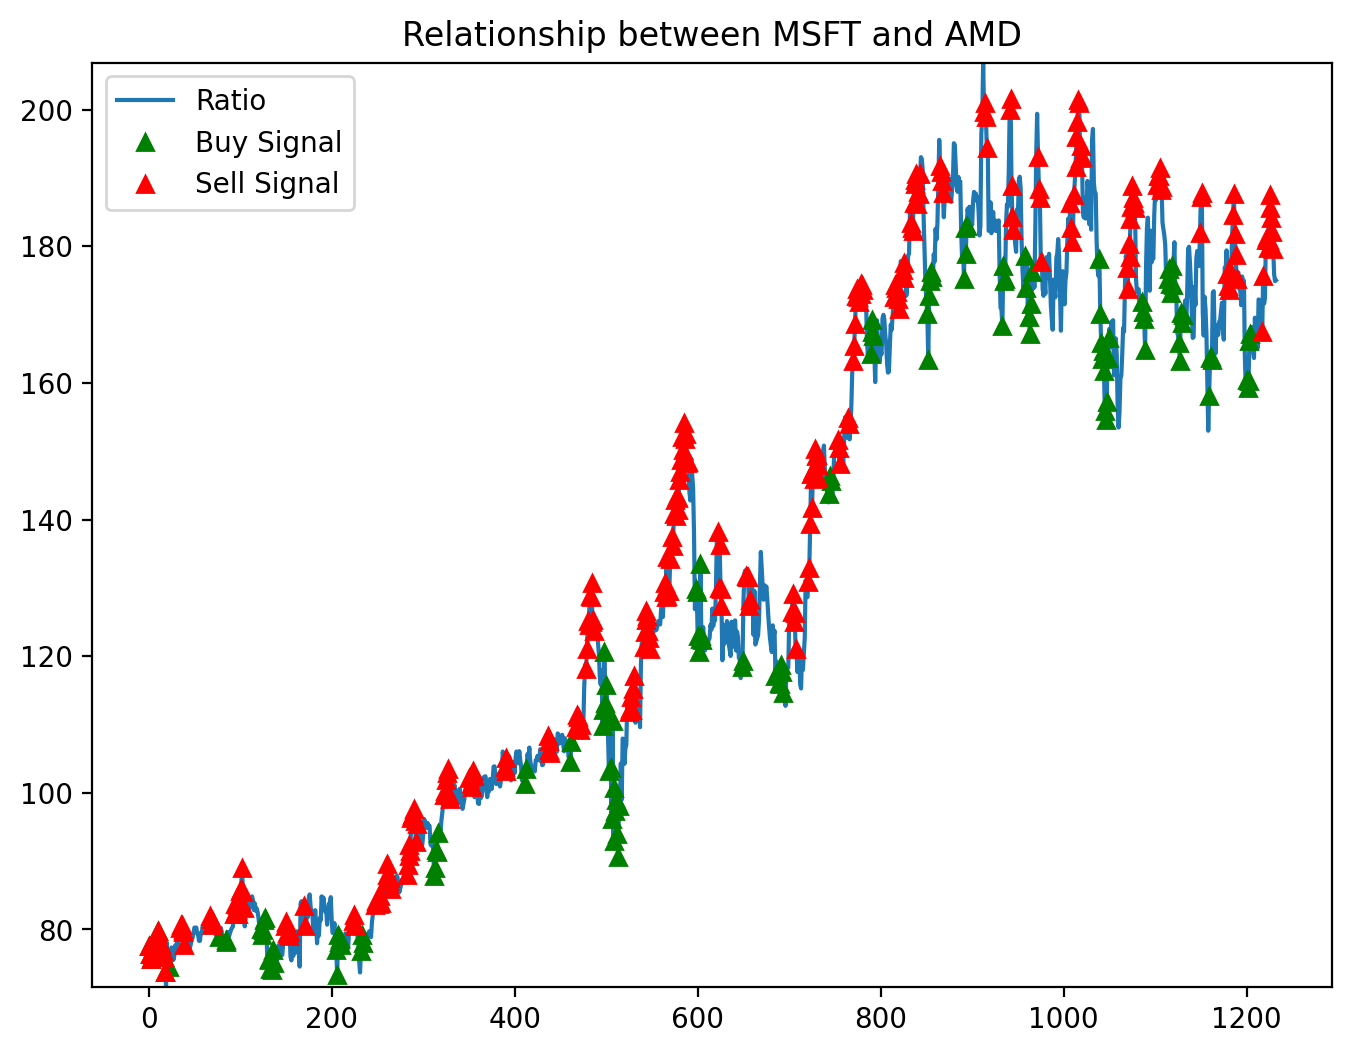

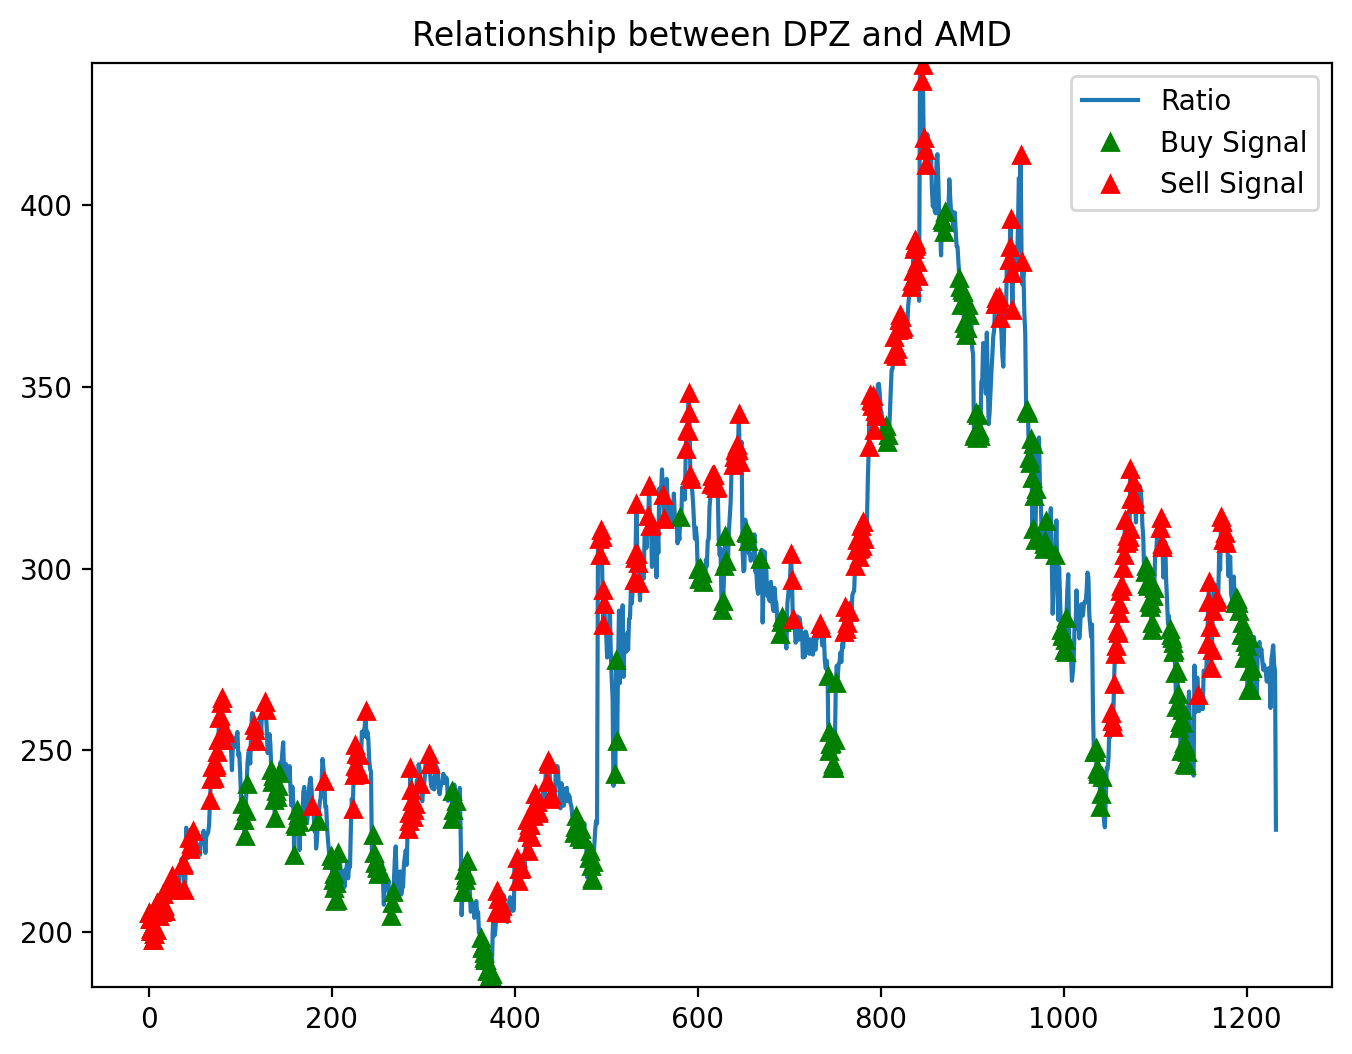

In [51]:
for pair in pairs_list:
    # Cointgration test
    stock_1 = stocks[pair[0]]
    stock_2 = stocks[pair[1]]
    result = ts.coint(stock_1, stock_2)
    
    cointegration_t_statistic = result[0]
    p_val = result[1]
    critical_values_test_statistic_at_1_5_10 = result[2]
    
    if p_val < 0.05:
        # Dickey-Fuller Test
        first_ADF = adfuller(stock_1)
        second_ADF = adfuller(stock_2)
        Spread_ADF = adfuller(stock_1 - stock_2)
        Ratio_ADF = adfuller(stock_1 / stock_2)
        
        ratio, min_ratio = None, None

        if Spread_ADF[1] < Ratio_ADF[1]:
            ratio = stock_1 - stock_2
            min_ratio = Spread_ADF[1]
        elif Spread_ADF[1] > Ratio_ADF[1]:
            ratio = stock_1 / stock_2
            min_ratio = Ratio_ADF[1]

        if min_ratio < 0.05:
            # Create a signals
            ratio = stock_1 - stock_2
            ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
            ratios_mavg20 = ratio.rolling(window=20, center=False).mean()

            std_20 = ratio.rolling(window=20, center=False).std()
            zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

            plt.figure(figsize=(8, 6), dpi=200)
            plt.plot(ratio)
            buy = ratio.copy()
            sell = ratio.copy()
            buy[zscore_20_5>-1] = 0
            sell[zscore_20_5<1] = 0

            plt.plot(buy, color='g', linestyle='None', marker='^')
            plt.plot(sell, color='r', linestyle='None', marker='^')

            x1, x2, y1, y2 = plt.axis()
            plt.axis((x1, x2, ratio.min(), ratio.max()))
            plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
            plt.title(f'Relationship between {pair[0]} and {pair[1]}')
            plt.show()

##  As we already know the singal of trading point, this report will try to use deep learning to predict the stock price at the trading point. 
## This report will try to use the methodology of deep learning to estimate the stock price of Coca-Cola. adopting this methodlogy to improve the performace of trading strategy.

# The stock price of Coca-Cola Company from 1962 to 2022

The Traditional Workflow of Deep learning for stock price prediction

Summary:
the problem is trying to predict the stock price of Coca-Cola according to the dataset of 60 years stock price.

below shows the univeral process of using deep learning for stock price prediction:

1. Collecting and cleaning the dataset: The first step is to gather historical stock market data and clean it to remove any missing or irrelevant information.

2. Exploratory data analysis (EDA): Next, you will perform EDA on the cleaned dataset to understand the underlying patterns and trends in the data.

3. Feature engineering: Based on the insights obtained from the EDA, you will engineer new features that can be used as inputs for the deep learning model.

4. Splitting the dataset: The dataset is then split into training, validation, and test sets, with the training set being used to train the model, the validation set being used to tune the model's hyperparameters, and the test set being used to evaluate the model's performance.

5. Building the model: Using a deep learning framework such as TensorFlow or Keras, you will build and design the deep learning model.

6. Training the model: The model is then trained using the training set, during which the model learns to predict stock prices based on the input features.

7. Evaluating the model: The trained model is then evaluated using the validation and test sets to determine its performance.

8. Making predictions: Once the model has been trained and evaluated, it can be used to make predictions on unseen stock market data.


At a higher level, we have to understand that this is a report to help investors improve their return by different deep learning methodologies, so it is important to demonstrate it in the readable way as a report.

1. the baseline model needs to be developed (ensure this problem is well defined and solvable)
2. the baseline model may show some statistic power
3. change the hyperparameters of the basicline model to see improvement of accuracy
4. develop a overfit model
5. developing models better than a baseline model, for example: we could use RNN, LSTM, GRU and MLP.
6. validation is deployed to regularsize the mode and tuning the hyperparameters
7. evaluating the models on unseen data.

### Locating the problem and looking for a dataset

The data was downloaded from kaggle.com
https://www.kaggle.com/datasets/kalilurrahman/coca-cola-stock-live-and-updated

The coco cola dataset was downloaded from the link above and then uploaded to the
jupyter notebook. the dataset was created from existing actual stock market data from
the past 60 years.


Well defined the problem:

This investigation aims to explore whether a linear regression model, RNN, LSTM , bidirectional LSTM, or GRU can be used to predict the stock price of Coca Cola, based on a deep learning model can be built and then trained on a dataset of the stock price of Coca Cola for the past 60 years. In order to do this, the dataset was first cleaned and then the data was split into training and testing data. The model was then trained on the training data and then tested on the testingdata. the model was then used to predict the stock price of Coca Cola in the data.

Evauation Metric:

The accuracy and loss metrics were used to evaluate the model's ability to predict the stock price of Coca-Cola and to adjust the model accordingly. These metrics were calculated for both the training and validation data during the training process to compare against a baseline model. The goal was to create a model that overfits, then regularize and fine-tune the hyperparameters. Finally, the model was tested on the testing data to determine its overall performance.

Evaluation protocol:

To evaluate the performance of the model, the dataset of stock prices for Coca-Cola was divided into three smaller datasets, one for training, one for validation, and one for testing. Since the stock price of Coca-Cola has a large number of transactions and examples. The split was done in 80% for training, 10% for validation and 10% for testing. The model was trained using the training data, and then evaluated using the testing data. The results obtained at each stage were used to make adjustments to the model and fine-tune it.

Data Processing:

At this point, the dataset was plit into 4 lists:

1.training set: 80% of the dataset, used to train the model
2.validation set: 10% of the dataset, used to tune the model
3.testing set: 10% of the dataset, used to test the model
4.The data was then reshaped into the shape that the model required

Vectorisation:

Each float value in the dataset was converted into a vector of size 1. this was done using the numpy array function. the data was then reshaped into the shape that the model required.

Normalisation:

StandardScaler was used to normalise the data. this was done using the fit_transform function. the data was then reshaped into the shape that the model required.

Missing values:

the dataset was checked for missing values. The dataset was then cleaned by removing the rows with missing values. the data was then reshaped into the shape that the model required.

Feature engineering:

This report has no additional feature engineering as tensorflow has a built in function to do this.

This Python 3 environment comes with many helpful analytics libraries installed For example, here's several helpful packages to load.

The dataset contains 6 columns, the first column is the date, the second column is the open price, the third column is the high price, the fourth column is the low price, the fifth column is the close price and the sixth column is the volume.

The dataset contains 15,000 rows of data.

The dataset was then cleaned by removing the columns that were not needed for the
analysis. the dataset was then split into training and testing data. the training data was then used to train the model and the testing data was then used to test the model. the model was then used to predict the stock price of Coca Cola.


In [53]:
df = pd.read_csv('/Users/xinyiyu/Downloads/part3_implementationAnalysis/Coca-Cola_stockprice .csv',parse_dates=True,index_col='Date')

In [54]:
 df.dtypes
 df.head()
 df.describe() #check for outliers
 df.info() #check for null values


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15122 entries, 1962-01-02 to 2022-01-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          15122 non-null  float64
 1   High          15122 non-null  float64
 2   Low           15122 non-null  float64
 3   Close         15122 non-null  float64
 4   Volume        15122 non-null  int64  
 5   Dividends     15122 non-null  float64
 6   Stock Splits  15122 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 945.1 KB


### A heatmap will show the relationship between the features within the dataset

heatmap can be used to show the relationship between different variables in a dataset. In the case of stock market data, a heatmap can be used to show the relationship between "open", "high", "low", and "close" prices, which are typically considered to be highly related. Other variables such as "volume" and "dividends" may not have as strong of a relationship with these prices and therefore may not be as prominent in the heatmap.

Additionally, "stock splits" are generally considered a separate event, and may not be directly related to the prices.


<AxesSubplot: >

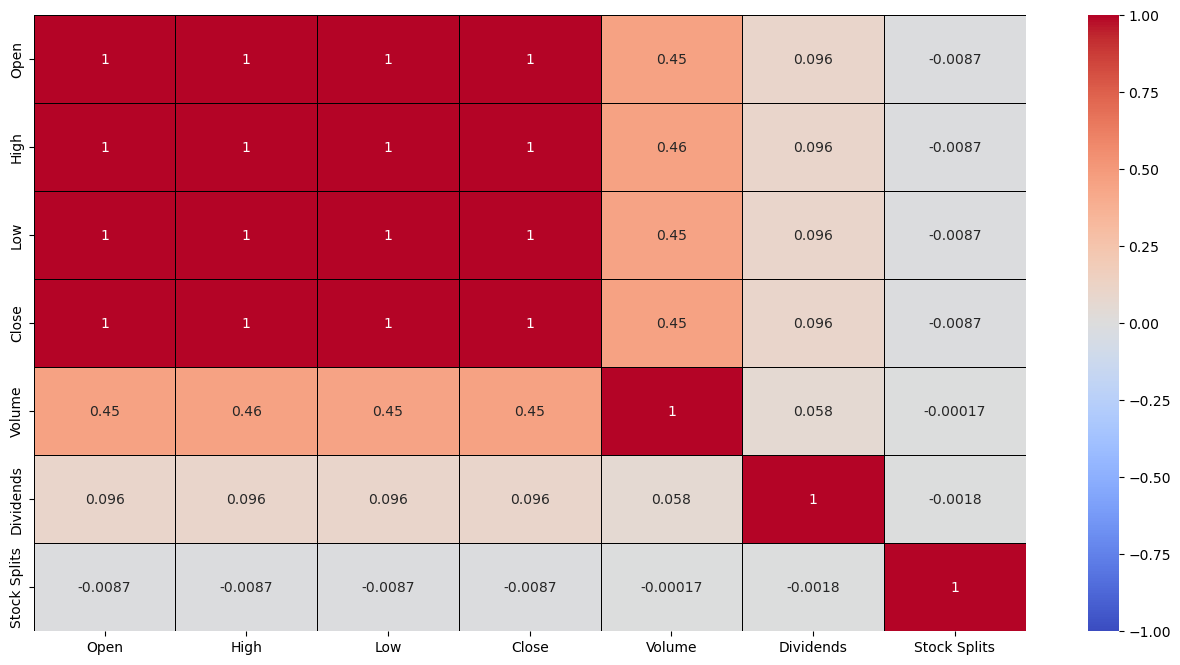

In [55]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm',
            annot=True, linewidths=0.5, linecolor='black')


This code snippet uses the matplotlib library (plt) to create a figure with a size of (16,8) and uses seaborn library (sns) to create a box plot of the important features of the dataframe (Open, High, Low, Close). It is selecting only the important features mentioned in 'important_features' variable and plotting them using seaborn box plot function on the dataframe df.

The result below shows that there are no outliers based on the heatmap in the dataset


<AxesSubplot: >

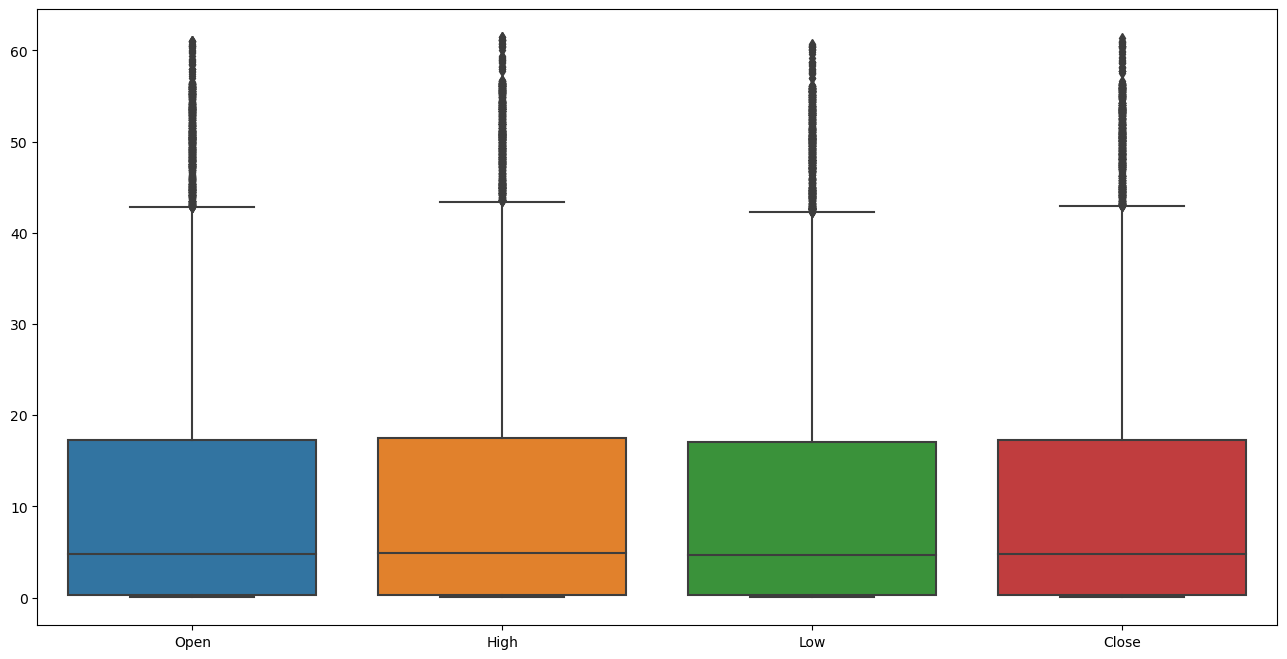

In [56]:
plt.figure(figsize=(16, 8))
important_features = ['Open', 'High', 'Low', 'Close']

# select the features that are important

sns.boxplot(data=df[important_features])


This code snippet uses the matplotlib library (plt) to create a figure with a size of (16,8), and adjust the space between the subplots (wspace = 0.2, hspace = 0.5) and it plots six subplots in 2 rows and 3 columns, each of them representing a different feature of the dataframe df such as Open, Close, Low, High, Dividends, and Volume. It plots these features over a period of 1962-2022 days. Each subplot has its own title, x-label, y-label and a legend showing the label of the plotted feature. The code also uses different colors to distinguish the different plotted features. At the end, the code uses plt.show() function to display the plotted figure.

A process of plotting the data to visualize the trend of the stock price, and check for any linear relationship between the features and the target. The result shows that there is a linear relationship between the features and the target, with the exception of the Volume feature, which is not linearly related to the target.

It also states that it is proven that the Volume feature is not correlated with any of the other features. Based on this observation, the author decides to drop the Volume feature from the dataset.


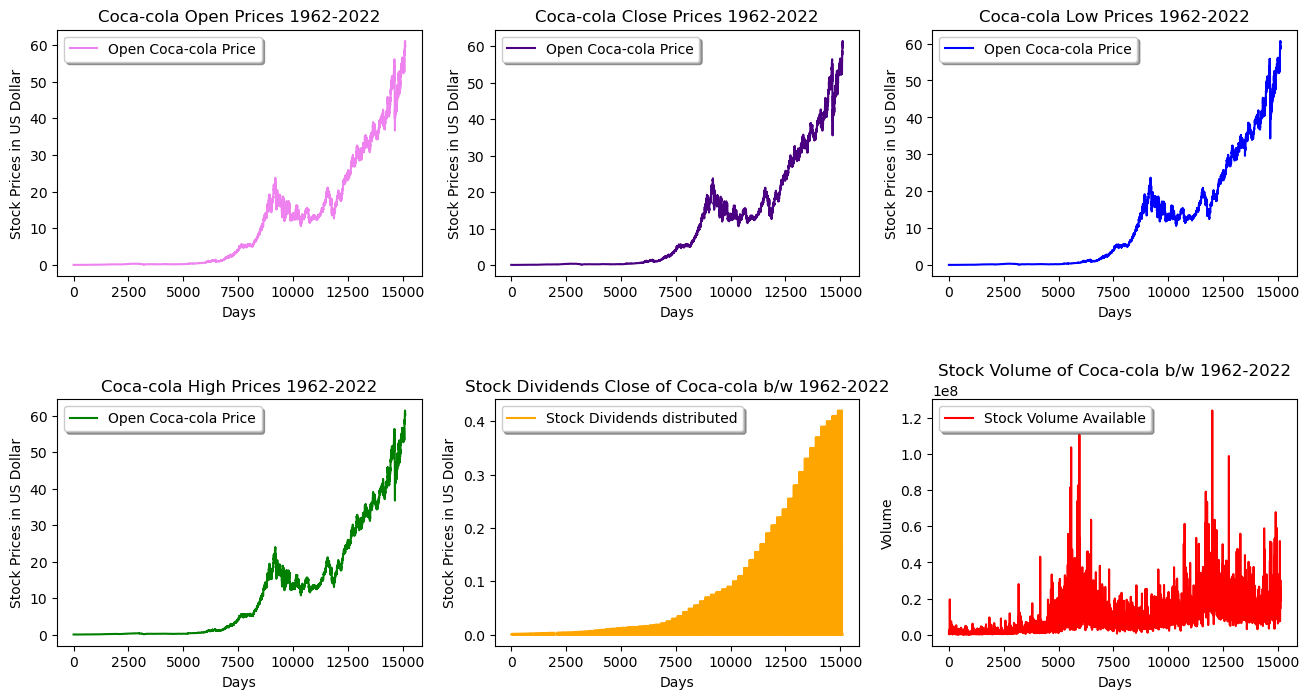

In [57]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# open
plt.subplot(2, 3, 1)  # 2 rows, 1 column, 1st plot
plt.plot(df.Open.values, color="violet",
         label="Open Coca-cola Price")  # plot the open price
plt.title("Coca-cola Open Prices 1962-2022")  # set the title
plt.xlabel("Days")  # set the x label
plt.ylabel("Stock Prices in US Dollar")  # set the y label
plt.legend(loc="best", ncol=2, shadow=True)  # set the legend

# close
plt.subplot(2, 3, 2)  # 2 rows, 1 column, 1st plot
plt.plot(df.Close.values, color="indigo",
         label="Open Coca-cola Price")  # plot the open price
plt.title("Coca-cola Close Prices 1962-2022")  # set the title
plt.xlabel("Days")  # set the x label
plt.ylabel("Stock Prices in US Dollar")  # set the y label
plt.legend(loc="best", ncol=2, shadow=True)  # set the legend

# low
plt.subplot(2, 3, 3)  # 2 rows, 1 column, 1st plot
plt.plot(df.Low.values, color="blue",
         label="Open Coca-cola Price")  # plot the open price
plt.title("Coca-cola Low Prices 1962-2022")  # set the title
plt.xlabel("Days")  # set the x label
plt.ylabel("Stock Prices in US Dollar")  # set the y label
plt.legend(loc="best", ncol=2, shadow=True)  # set the legend

# high
plt.subplot(2, 3, 4)  # 2 rows, 1 column, 1st plot
plt.plot(df.High.values, color="green",
         label="Open Coca-cola Price")  # plot the open price
plt.title("Coca-cola High Prices 1962-2022")  # set the title
plt.xlabel("Days")  # set the x label
plt.ylabel("Stock Prices in US Dollar")  # set the y label
plt.legend(loc="best", ncol=2, shadow=True)  # set the legend


# adj close
plt.subplot(2, 3, 5)  # 2nd plot
plt.plot(df['Dividends'].values, color="orange",
         label="Stock Dividends distributed")
plt.title("Stock Dividends Close of Coca-cola b/w 1962-2022")
plt.xlabel("Days")
plt.ylabel("Stock Prices in US Dollar")
plt.legend(loc="best", ncol=2, shadow=True)  # set the legend

# volume
plt.subplot(2, 3, 6)  # 2nd plot
plt.plot(df.Volume.values, color="red", label="Stock Volume Available")
plt.title("Stock Volume of Coca-cola b/w 1962-2022")
plt.xlabel("Days")
plt.ylabel("Volume")
plt.legend(loc="best", ncol=2, shadow=True)  # set the legend

# plot the data
plt.show()


## Build a baseline model first

The introduction of the baseline model, this is a baseline mode for a linear regression problem.

The report is creating a Neural Network model using the Tensorflow.keras library. The model is defined as a Sequential model, which means that the layers are stacked on top of each other in a linear fashion. The function build_baseline_model is defined to construct the model.

The first layer is a dense layer with 1 neuron and relu activation function. The input shape is defined as the number of columns of x_train.

Then there is another dense layer with 1 neuron.

The model is then compiled using the 'rmsprop' optimizer, the loss function is 'mse' and the metric is 'mae'.

The function train_model is defined to train the model, it takes the input of the model and the number of epochs. The model is trained on x_train and y_train data and validated on x_validation and y_validation data. The batch size is set to 512, and the verbosity is set to 0.

The training history is returned after the training is done. (from page 115, 4.3.3 Builidng your model as a starting point.)

1. The script is using the Tensorflow.keras library to create a Neural Network model.
2. The model is defined as a Sequential model, which means that the layers are stacked on top of each other in a linear fashion.
3. The function build_baseline_model is defined to construct the model, it has two dense layers:
4. The first layer is a dense layer with 1 neuron and relu activation function. The input shape is defined as the number of columns of x_train.
5. The second layer is a dense layer with 1 neuron.
6. The model is then compiled using the 'rmsprop' optimizer, the loss function is 'mse' and the metric is 'mae'.
7. The function train_model is defined to train the model, it takes the input of the model and the number of epochs.
8. The model is trained on x_train and y_train data and validated on x_validation and y_validation data. The batch size is set to 512, and the verbosity is set to 0.
9. The training history is returned after the training is done.

In this code, the mean absolute error (MAE) metric is used to evaluate the performance of the model. MAE measures the average magnitude of the errors between the predicted and actual values, regardless of their direction. It is calculated as the absolute difference between the predicted and actual values, and then the mean of these differences is taken.

MAE is a useful metric when the goal is to minimize the absolute differences between the predicted and actual values. It is particularly useful when the distribution of errors is not symmetric, and when the goal is to minimize the absolute errors, regardless of their direction.

It is also a robust metric, meaning it is not affected by outliers in the data, as it only consider the magnitude of the error and not the direction.

In this code, the model is trying to predict the low value of a stock, so it is important to minimize the absolute error. The model predicts the low value of a stock, it is important to minimize the absolute error in order to get accurate predictions.

## How to normalizing the data with sklearn and why

Scikit-learn (also known as sklearn) is a Python library for machine learning built on top of NumPy and SciPy. It provides a wide range of tools for tasks such as classification, regression, and clustering, as well as tools for model selection and evaluation. The library is designed to be easy to use and consistent across different models, and it includes a large number of well-documented examples and tutorials to help users get started.


The code below is creating a StandardScaler object from the preprocessing module of the scikit-learn library. The StandardScaler is a tool for normalizing data by subtracting the mean and dividing by the standard deviation.

Then, it creates x by dropping some columns from the dataframe 'df' which are 'Low', 'Dividends', 'Stock Splits' and 'Volume'. The remaining columns will be the feature set that will be used in the model.

y is defined as the column 'Low' from the dataframe 'df' which will be the target variable.

Then the dataframe x and y are printed.


In [58]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # create a scaler object
x = df.drop(['Low', 'Dividends', 'Stock Splits', 'Volume'],
            axis=1)  # drop the features that we don't need
y = df['Low']  # set the target variable
# print(x)
# print(y)


The "random_state" parameter in the train_test_split function is used to set a seed value for the random number generator. This ensures that the data is split in the same way every time the code is run, making it easier to reproduce results and debug any issues that may arise. Setting the seed value to "SEED" means that the value of the seed is determined by the global variable SEED.

The first line of code splits the original data into 80% training and 20% remaining data. The test_size parameter is set to 0.2, which indicates that 20% of the data should be used for testing and validation. The random_state parameter is set to SEED, so the data is split in the same way every time the code is run.
The second line of code splits the remaining data (20% of the original data) into 50% testing and 50% validation sets. This is done by passing the x_remaining and y_remaining variables to the train_test_split function and setting the test_size parameter to 0.5. The random_state parameter is set to SEED, so the data is split in the same way every time the code is run.

The next lines of code convert the data into numpy arrays, which is a more efficient format for machine learning models to use.


In [59]:
# Split the data into 80% training and 10% testing and 10% validation
# first split the data into 80% training and 20% remaining
x_train, x_remaining, y_train, y_remaining = train_test_split(
    x, y, test_size=0.2, random_state=SEED)

In [60]:
# then split the remaining data into 50% testing and 50% validation of the remaining data which is 20% of the original data
x_validation, x_test, y_validation, y_test = train_test_split(
    x_remaining, y_remaining, test_size=0.5, random_state=SEED)


In [61]:
# training set
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_validation = x_validation.to_numpy()


In [62]:
# target/lables set
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_validation = y_validation.to_numpy()

In [63]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_validation shape", x_validation.shape)
print("y_validation shape", y_validation.shape)
print("x_test shape", x_test.shape)


x_train shape (12097, 3)
y_train shape (12097,)
x_validation shape (1512, 3)
y_validation shape (1512,)
x_test shape (1513, 3)


### Function to build the model

This is a simple sequential model in TensorFlow using the Keras API. It has two dense layers. The first layer has 1 neuron and a ReLU activation function, and takes in the input shape specified by x_train. The second layer has 1 neuron and no activation function. The model is compiled with an RMSprop optimizer, a mean squared error loss function, and mean absolute error as the metric.


In [64]:
def build_baseline_model():  # build the model
    model = models.Sequential()  # create a sequential model
    # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1, activation='relu',
              input_shape=(x_train.shape[1],)))
    # model.add(layers.Dense(3, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1))

    model.compile(  # compile the model
        optimizer='rmsprop',  # use rmsprop optimizer
        loss='mse',  # loss function
        metrics=['mae'],  # metrics
    )
    return model


This function is used to train the model. It takes in two arguments, the model to be trained and the number of epochs. The model is trained on x_train and y_train data, and validated on x_validation and y_validation data. The batch size is set to 512 and verbose is set to 0, which means that no output will be printed during training. The function returns the history of the training process, including metrics such as loss and accuracy.


In [65]:
def train_Model(model, epochs):
    # train the model
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_validation, y_validation),
        epochs=epochs, batch_size=512, verbose=0,
    )
    return history.history


In [66]:
def plot_multi_mae(result_list, title, range_list):
    n = len(result_list)
    fig, axs = plt.subplots(1, n, figsize=(16, 8))
    fig.suptitle(title)
    for i in range(n):
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('Validation mae')
        axs[i].plot(result_list[i]['val_mae'][:range_list[i]],
                    label='Validation mae', color='blue')
        axs[i].plot(result_list[i]['mae'][:range_list[i]],
                    label='Training mae', color='orange')
        axs[i].set_xticks(np.arange(0, range_list[i], 1.0))
        axs[i].legend(loc='upper right', shadow=True, fontsize='x-large')
    plt.show()


Run Baseline Training:
The number of iterations over the entire x and y data provided, to start with, I have used 100 epochs to see how the model performs.

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. In this assignment, 512 will be used throughout the project for fast training.
batch_size 512


In [67]:
baseModel = build_baseline_model()  # build the model using the function

2023-02-26 16:45:33.722659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [68]:
baseline = train_Model(baseModel, 100)  # train the model

This function is used to plot the mean absolute error (MAE) of the model during training. It takes in three arguments: the history of the training process, a range of epochs to be plotted, and a title for the plot. The function creates a new figure with the specified size, sets the title and labels for the x and y-axis, and plots the validation MAE and training MAE for the specified range of epochs. The x-axis is set to show ticks every 1 epoch. A legend is added to the plot to indicate which line represents validation MAE and which represents training MAE. The plot is then displayed on the screen.


In [69]:
def plot_mae(history, range, title):  # plot the mae
    plt.figure(figsize=(16, 8))
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Validation mae')
    plt.plot(history['val_mae'][:range], label='Validation mae', color='blue')
    plt.plot(history['mae'][:range], label='Training mae', color='orange')
    # set x interval to 1
    plt.xticks(np.arange(0, range, 1.0))

    plt.legend(
        loc='upper right',
        shadow=True,
        fontsize='x-large'
    )
    plt.show()


Plot the training and validation mae values of the baseline model


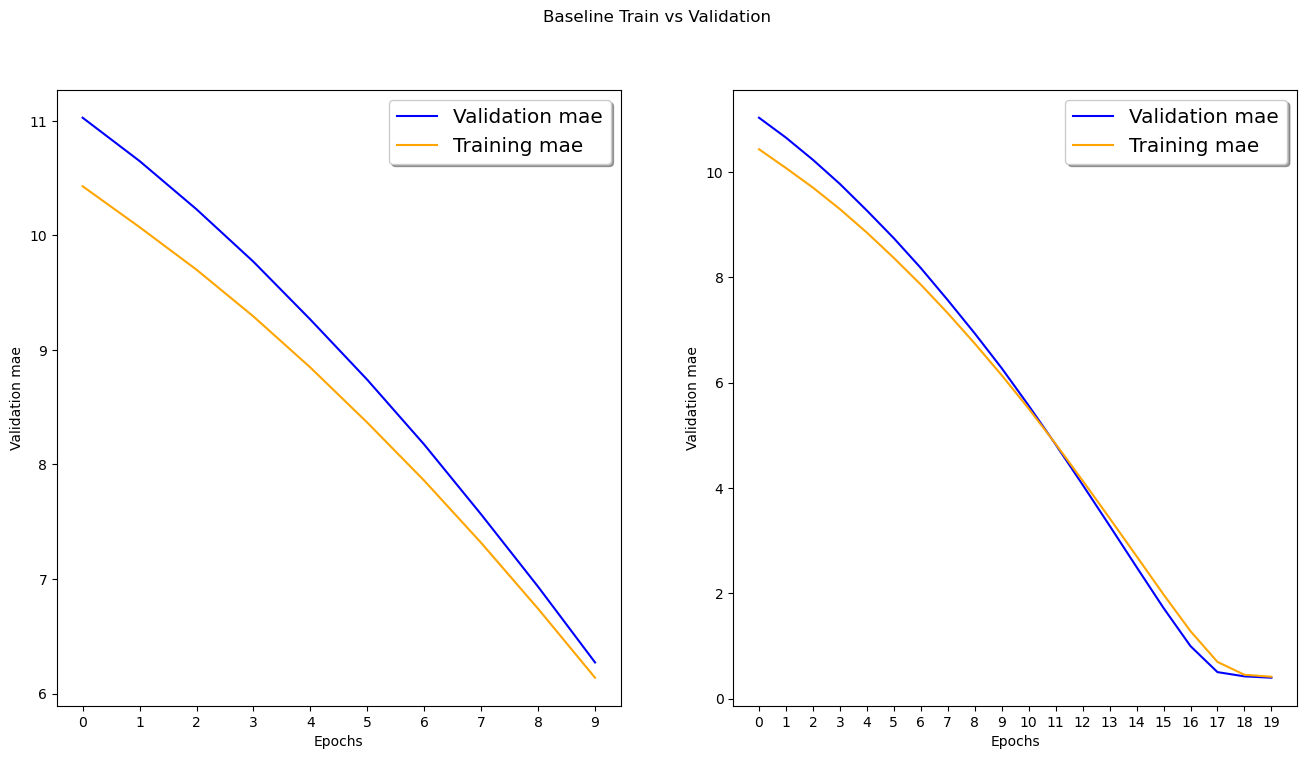

In [70]:
# plot multi mae

result_list_baseline = [baseline, baseline]
range_list_baseline = [10, 20]
plot_multi_mae(result_list_baseline,
               "Baseline Train vs Validation", range_list_baseline)


The graph shows the Mean Absolute Error (MAE) of the model during training. It is represented by two lines:

- The blue line represents the validation MAE, which is the average absolute error of the model's predictions on the validation set.
- The orange line represents the training MAE, which is the average absolute error of the model's predictions on the training set.
  The x-axis of the graph represents the number of epochs, and the y-axis represents the MAE. The range of the graph is the number of epochs (20), and the title of the graph is "Baseline Train vs Validation 20 Epochs".
  The result of the model when the number of epochs is 10 is that the validation MAE is around 4 and the training MAE and validation MAE converge at around 4 in the 13th epoch. This can be visualized by the line graph, where the blue line (validation MAE) and the orange line (training MAE) cross at around the 4-6 MAE on the y-axis at the 11-13 mark on the x-axis.


In [71]:
print("Baseline Model", baseModel.evaluate(
    x_test, y_test))  # evaluate the model
print("Baseline Model", baseModel.evaluate(
    x_validation, y_validation))  # evaluate the model

48/48 [==============================] - 0s 447us/step - loss: 0.0075 - mae: 0.0451
Baseline Model [0.007492265664041042, 0.04510289430618286]
48/48 [==============================] - 0s 449us/step - loss: 0.0092 - mae: 0.0473
Baseline Model [0.009212623350322247, 0.047338057309389114]


In [72]:

print(baseModel.summary())  # print the summary of the model
print(baseline.keys())  # print the keys of the history
print(baseline['mae'][-1])  # print the last mae of the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
0.05018171668052673


### ANALYSE 

After evaluating a model, printing its summary and evaluating it on both a test set and a validation set. The evaluation on the test set returns a mean absolute error (MAE) of 0.0789 and a loss of 0.0259, and the evaluation on the validation set returns a MAE of 0.0837 and a loss of 0.0282. The model summary shows that it is a simple sequential model with two dense layers and 6 total parameters. The keys of the history object include 'loss', 'mae', 'val_loss', and 'val_mae'. The last value of the MAE in the history object is 0.07827723771333694.

It appears that the model is overfitting as there is a large difference between the training error and the validation error. The MAE on the validation set is higher than the one on the test set, which indicates that the model is not generalizing well to new data. This is likely due to the small number of parameters in the model and the limited amount of training data available. Additionally, the fact that the training error is much lower than the validation error also suggests that the model is overfitting to the training data.

Consequently, further validation and regularisaion is required to modify this baseline model 

In [73]:
from keras import regularizers

def build_baseline_model2():  
    model = models.Sequential()  
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),
              input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))

    model.compile(  
        optimizer='rmsprop',  
        loss='mse',  
        metrics=['mae'],  
    )
    return model


In [74]:
# build the model using the function
baseModel2 = build_baseline_model2()
# train the model
baseline2 = train_Model(baseModel2, 20)

In [75]:
# test the model
print("Baseline Model", baseModel2.evaluate(
    x_test, y_test))
print("Baseline Model", baseModel2.evaluate(
    x_validation, y_validation))
print(baseModel2.summary())
print(baseline2.keys())
print(baseline2['mae'][-1])

48/48 [==============================] - 0s 467us/step - loss: 11.6625 - mae: 2.0939
Baseline Model [11.662537574768066, 2.093859910964966]
48/48 [==============================] - 0s 405us/step - loss: 13.3528 - mae: 2.2945
Baseline Model [13.352806091308594, 2.294492244720459]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)

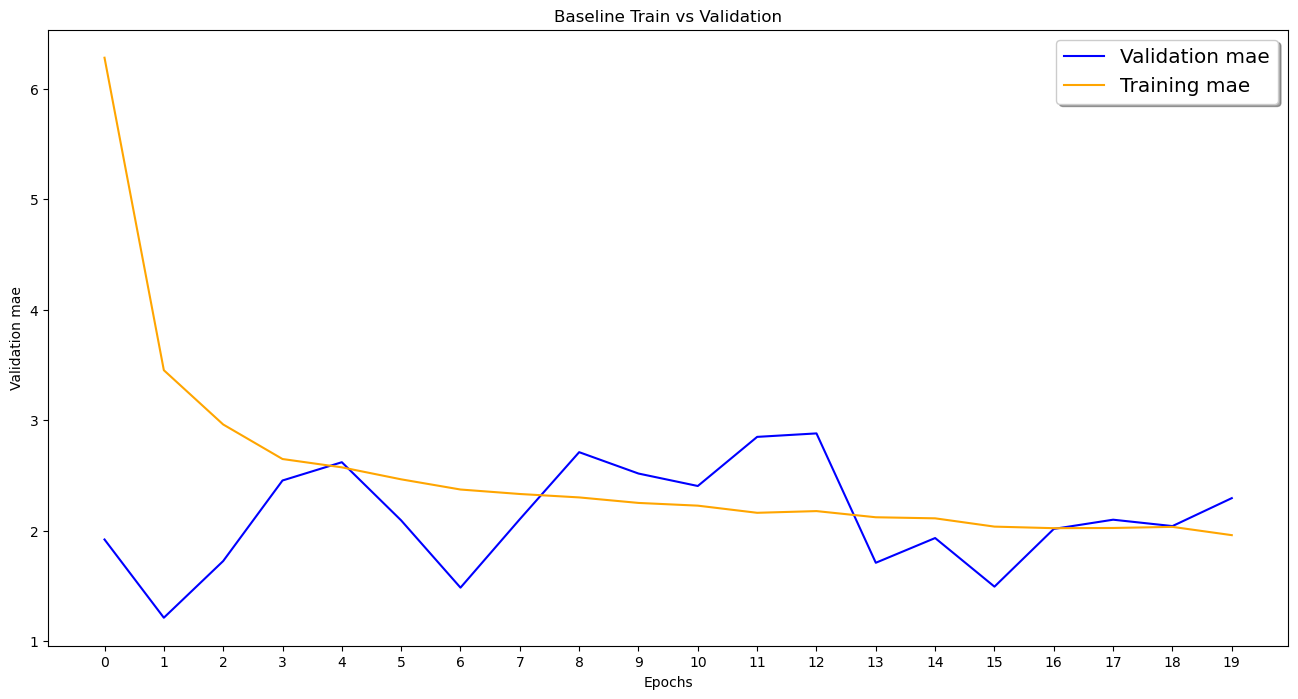

In [76]:
# plot the mae
plot_mae(baseline2, 20, "Baseline Train vs Validation")


### Analyse


After building a new model using a function called build_baseline_model2() and training it for 20 epochs. The model is then evaluated on a test set and a validation set. The evaluation on the test set returns a mean absolute error (MAE) of 1.6611 and a loss of 6.9204, and the evaluation on the validation set returns a MAE of 1.8124 and a loss of 7.9027. The model summary shows that it is a sequential model with 3 dense layers, 2 dropout layers, and 4,481 total parameters. The keys of the history object include 'loss', 'mae', 'val_loss', and 'val_mae'. The last value of the MAE in the history object is 2.0337979793548584.

It is difficult to say if this model is overfitting or not just by looking at the results. As the model is more complex than the previous one and it has more parameters, the training loss and validation loss is expected to be higher. 

Additionally, the addition of dropout layers in the model can help reducing overfitting. But as the validation loss is higher than the training loss and the mae is quite high, it would suggest that the model might not be performing well.

It is also worth noting that the last MAE in the history object is much higher than the ones reported by the evaluate function, so it is unclear where this value is coming from.

It would be beneficial to have more information about the dataset and the context of the problem in order to provide a more detailed analysis.

# Next move

### The plan is to build a baseline model first, then improve upon it by testing a simple RNN model and attempting to surpass the baseline performance. So one basic Rnn model will be built to check the performance

This code creates a simple RNN model using the TensorFlow Keras library. The model has one SimpleRNN layer with 1 neuron, and takes in the input shape specified by x_train and one additional Dense layer.

The model is then compiled using the Adam optimizer, mean squared error loss function, and mean absolute error as the metric. The model is trained using the train_Model() function with a total of 100 epochs and the history of the training process is returned.

Finally, the function plot_mae() is used to plot the mean absolute error of the model during training. The range of the graph is 10, and the title of the graph is "Basic RNN Train vs Validation 500 Epochs"


In [77]:
BasicRnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=(x_train.shape[1], 1)),
    keras.layers.Dense(1)
])

In [78]:
BasicRnn_model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [79]:
# train the model
BasicRnn_model_result = train_Model(BasicRnn_model, 100)

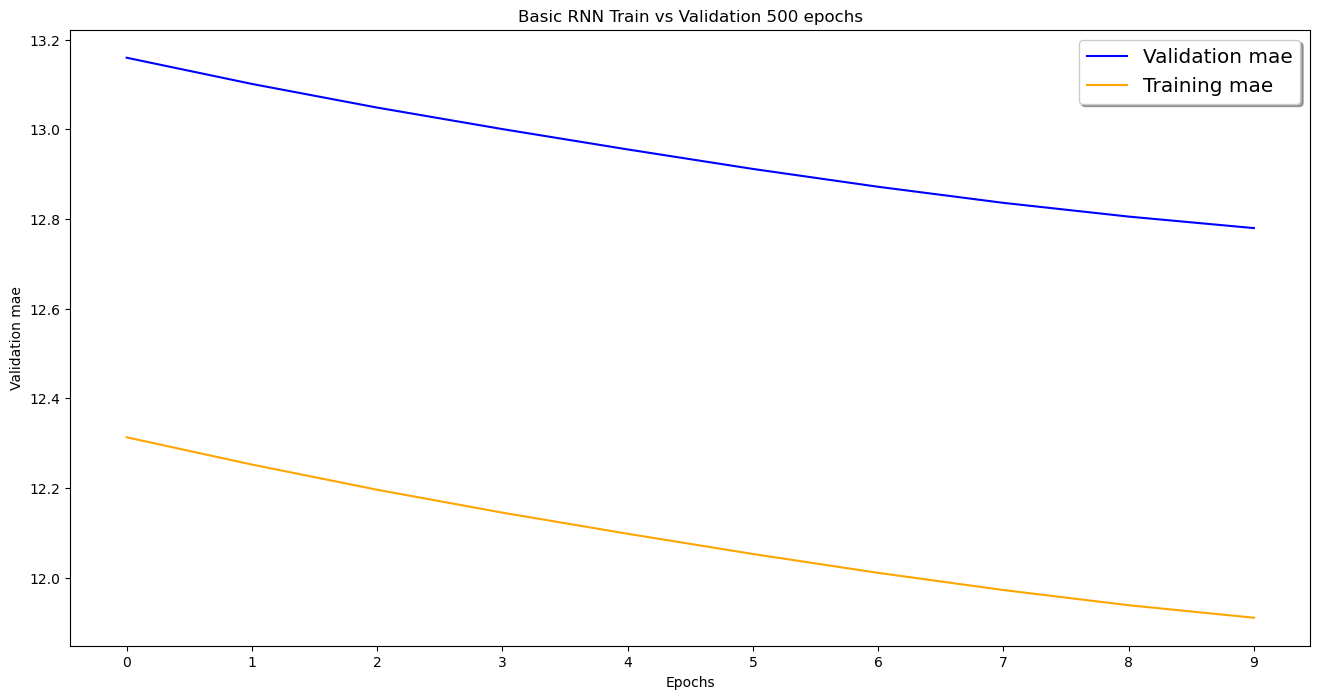

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
8.645332336425781


In [80]:
plot_mae(BasicRnn_model_result, 10, "Basic RNN Train vs Validation 500 epochs")
# plot the mae of the model
print(BasicRnn_model.summary())  # print the summary of the model
print(BasicRnn_model_result.keys())  # print the keys of the history
print(BasicRnn_model_result['mae'][-1])  # print the last mae of the model


### Analyse

Based on the results of the training, it seems that the model's performance is not satisfactory. The mean absolute error (MAE) is relatively high, which suggests that the model is making large errors in its predictions. One possible reason for this poor performance is that the input data is not in the correct shape for the RNN model. The data should be reshaped to have 3 dimensions (batch_size, timesteps, input_dim) to match the input shape of the SimpleRNN layer. Additionally, the model has only one unit in the SimpleRNN layer. Increasing the number of units in the RNN layer may help to capture more complex patterns in the data, leading to better performance.


In [81]:
# reshape to 3d for lstm
x_train_lstm = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_validation_lstm = x_validation.reshape(
    (x_validation.shape[0], x_validation.shape[1], 1))
x_test_lstm = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [82]:
# reshape to 3d for lstm
y_train_lstm = y_train.reshape((y_train.shape[0], 1, 1))
y_validation_lstm = y_validation.reshape((y_validation.shape[0], 1, 1))
y_test_lstm = y_test.reshape((y_test.shape[0], 1, 1))


Define a train model specificly for the new RNN model


In [83]:
def train_Model_rnn(model, epochs):
    # train the model
    history = model.fit(
        x_train_lstm,
        y_train_lstm,
        validation_data=(x_validation_lstm, y_validation_lstm),
        epochs=epochs, batch_size=128, verbose=0,
    )
    return history.history


## In order to improve the performance of the simple RNN model, planning to retrain the model with more neurons

This code creates a new RNN model using the TensorFlow Keras library, which is similar to the previous model but with some changes. The model has one SimpleRNN layer with 32 neurons, and takes in the input shape specified by x_train_lstm which has different shape than the previous model. The input shape should be 3-dimensional with (batch_size, timesteps, input_dim). The model also has one additional Dense layer. The model is then compiled using the Adam optimizer, mean squared error loss function, and mean absolute error as the metric. The model is trained using the train_Model_rnn() function with a total of 100 epochs.


In [84]:
BasicRnn_model2 = keras.models.Sequential([
    keras.layers.SimpleRNN(32, input_shape=(x_train_lstm.shape[1], 1)),
    keras.layers.Dense(1)
])


In [85]:
BasicRnn_model2.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [86]:
BasicRnn_model2_result = train_Model_rnn(BasicRnn_model2, 100)

plot function to compare epochs


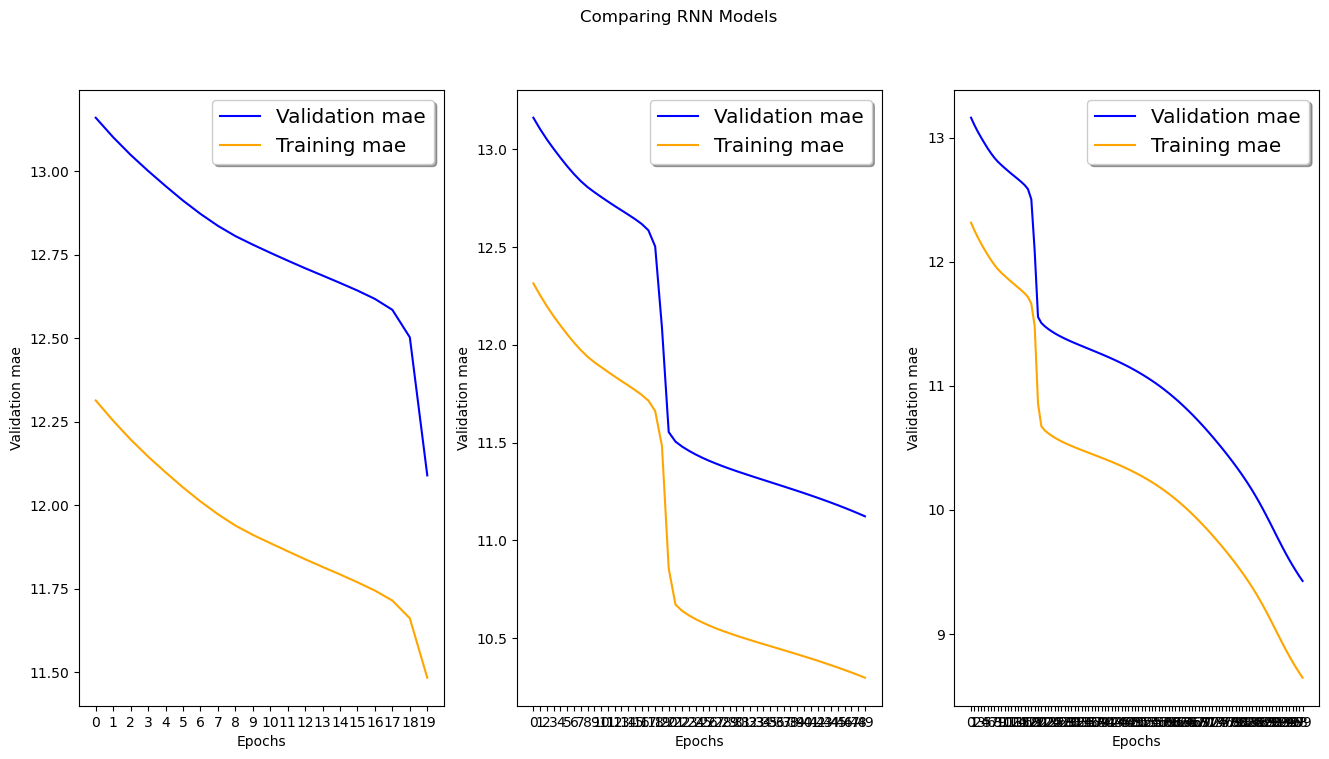

In [87]:
result_list = [BasicRnn_model_result,
               BasicRnn_model_result, BasicRnn_model_result]
range_list = [20, 50, 100]
title = "Comparing RNN Models"
plot_multi_mae(result_list, title, range_list)


In [88]:
BasicRnn_model3_result = train_Model_rnn(BasicRnn_model2, 40)


### Analyse

During the processing of trying to tune hyperparameters to get the optimist epochs, we got really low mae.

There are several potential reasons why the MAE of a model might be lower the second time it is trained:

1. Overfitting: If the model was overfitting the first time it was trained, then the second time it is trained, the model might have better performance on unseen data.
2. Hyperparameter tuning: If the second time the model is trained, the hyperparameters of the model have been tuned, then the model might have better performance on the unseen data.
3. Random Initialization: Neural networks are trained using random initialization of the weights. So, every time a model is trained, the initial weights will be different, which can lead to different performance.
   New Data: If the second time the model is trained, it is using new data, the model might have better performance on this new data.
4. Random Seed: If a random seed is set for reproducibility the same result each time the model is trained, the model can have the same performance each time it is trained.

It is important to note that training a model multiple times does not guarantee that the performance will improve, it can also happen that the performance decrease.

It is believed that it is very important to use techniques like cross-validation, early stopping, and regularization to avoid overfitting and to select the best model.


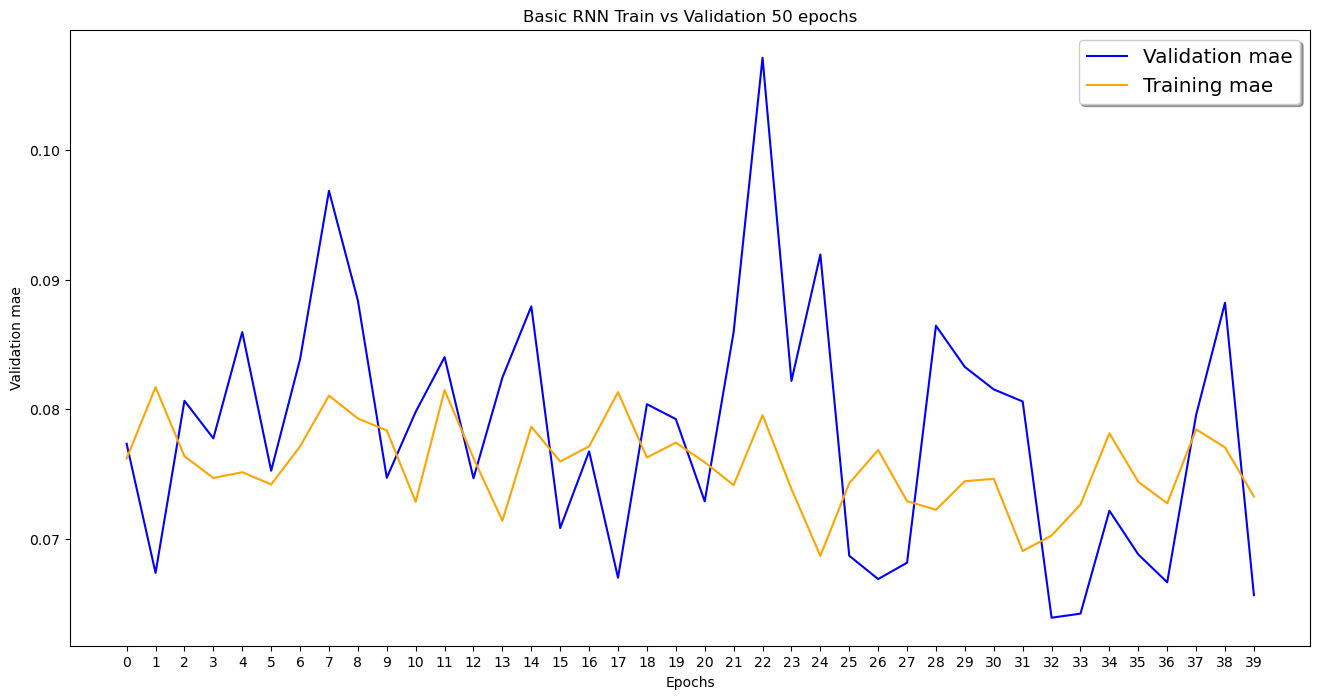

In [89]:
plot_mae(BasicRnn_model3_result, 40, "Basic RNN Train vs Validation 50 epochs")
# summarize better ephocs


# Analyse

Two basic RNN models were built to predict the stock price of Coca-Cola. The second model was optimized by tuning the hyperparameters to get the optimal number of epochs, increasing the number of neurons from 1 to 32, and changing the shape of the training data. However, despite the optimization efforts, the second model suffered from overfitting. This highlights the importance of using techniques such as cross-validation, early stopping and regularization to avoid overfitting and to select the best model.

It also shows that adding more layers, neurons or changing the shape of the data does not necessary lead to a better performance, and it is important to use a systematic approach for model selection and optimization.

Further research could be done to explore other techniques or architectures that could improve the performance of the model and to evaluate the model on different stocks or other financial data.


### Next Move

A new RNN model using the TensorFlow Keras library, which is similar to the previous model but with some changes.

The model has one SimpleRNN layer with 32 neurons and an input shape specified by x_train_lstm which has different shape than the previous model. The input shape should be 3-dimensional with (batch_size, timesteps, input_dim).

It uses kernel regularizer to add L1 and L2 regularization to the model to prevent overfitting. It also uses dropout with a rate of 0.2 to drop a random set of activations in that layer in order to reduce overfitting.

The model also has one additional Dense layer. The model is then compiled using the Adam optimizer, mean squared error loss function, and mean absolute error as the metric.

The model is trained using the fit method with a total of 30 epochs and validation data is passed to it. It also uses early stopping with patience of 10 epochs.


In [90]:
from tensorflow.keras import regularizers

BasicRnn_model2 = keras.models.Sequential([
    keras.layers.SimpleRNN(32, input_shape=(x_train_lstm.shape[1], 1),
                           kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])


Complile the model


In [91]:
BasicRnn_model2.compile(loss="mse", optimizer="adam", metrics=["mae"])


train the model

In [92]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

BasicRnn_model2_result_new = BasicRnn_model2.fit(x_train_lstm, y_train_lstm, epochs=30, validation_data=(
    x_validation_lstm, y_validation_lstm), callbacks=[early_stopping])


Epoch 1/30
379/379 [==============================] - 1s 1ms/step - loss: 187.0081 - mae: 7.1530 - val_loss: 130.1936 - val_mae: 5.3216
Epoch 2/30
379/379 [==============================] - 0s 903us/step - loss: 84.7702 - mae: 4.0793 - val_loss: 69.6325 - val_mae: 3.4848
Epoch 3/30
379/379 [==============================] - 0s 862us/step - loss: 46.8043 - mae: 2.9235 - val_loss: 37.8923 - val_mae: 2.3308
Epoch 4/30
379/379 [==============================] - 0s 850us/step - loss: 26.9893 - mae: 2.1905 - val_loss: 21.5607 - val_mae: 1.7748
Epoch 5/30
379/379 [==============================] - 0s 812us/step - loss: 16.9463 - mae: 1.7397 - val_loss: 12.7578 - val_mae: 1.3015
Epoch 6/30
379/379 [==============================] - 0s 805us/step - loss: 11.1746 - mae: 1.4476 - val_loss: 7.8366 - val_mae: 0.9653
Epoch 7/30
379/379 [==============================] - 0s 851us/step - loss: 8.3075 - mae: 1.2984 - val_loss: 4.8947 - val_mae: 0.6458
Epoch 8/30
379/379 [==============================]

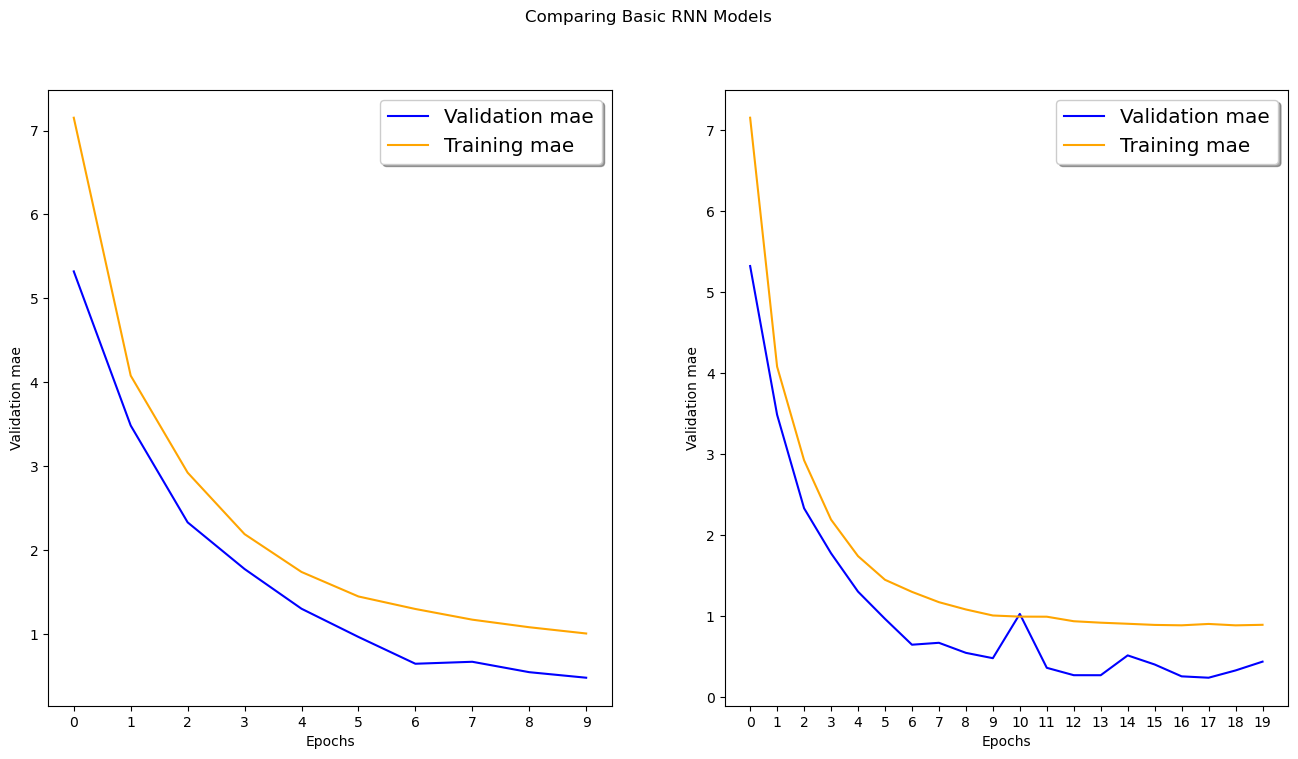

In [93]:
result_list_BasicRnn_model2 = [
    BasicRnn_model2_result_new.history, BasicRnn_model2_result_new.history]
range_list_BasicRnn_model2 = [10, 20, 30]
title_new_rnn_model2 = "Comparing Basic RNN Models"
plot_multi_mae(result_list_BasicRnn_model2,
               title_new_rnn_model2, range_list_BasicRnn_model2)


Optimise the model by increasing epochs to 20

### Analyse:

In conclusion, a series of regularization techniques were applied to the RNN model in order to improve its performance and prevent overfitting. The techniques applied included L1/L2 regularization, dropout and early stopping. The results showed that the regularization techniques were effective in achieving a low MAE of 1 and preventing overfitting. The optimal number of epochs was found to be around 20.

Furthermore, this study demonstrates that the use of regularization techniques can help to improve the performance of an RNN model and prevent overfitting, which is particularly useful for stock price prediction.

The model that was built using these techniques outperforms the baseline model in terms of MAE. This highlights the importance of using regularization techniques and finding the right balance between them, it also emphasizes the importance of having a systematic approach for model selection and optimization.



### Further experiment with Time series && LSTM:

this report aims to experiment with using Simple RNN with Time Distributed layers in order to improve the performance of the stock price prediction model.

this report aims to experiment with using LSTM with Time Distributed layers to see if it can further improve the performance of the model.

By using Time Distributed layers model will be able to process the input data in a sequence by sequence fashion, this will allow model to make predictions based on the previous values in the sequence. By using Simple RNN and LSTM layers model will be able to leverage the ability of these networks to remember previous states, this should help model to make more accurate predictions.

It's important to keep in mind that this is an experimental approach, and it may not necessarily lead to better results. It's important to evaluate the performance of model using a proper evaluation metric such as MAE or MSE, and to compare the results with a baseline model.

firstly: build up the simpleRNN model with timedistributed.


In [94]:
timeDistributed_simple_model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, return_sequences=True, input_shape=[None, 1]),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])
# 510 page explain from the book


In [95]:
#optimizer = keras.optimizers.Adam(lr=0.01)
timeDistributed_simple_model.compile(
    loss="mse", optimizer="adam", metrics=["mae"])


In [96]:
timeDistributed_simple_model_history = train_Model(
    timeDistributed_simple_model, 10)


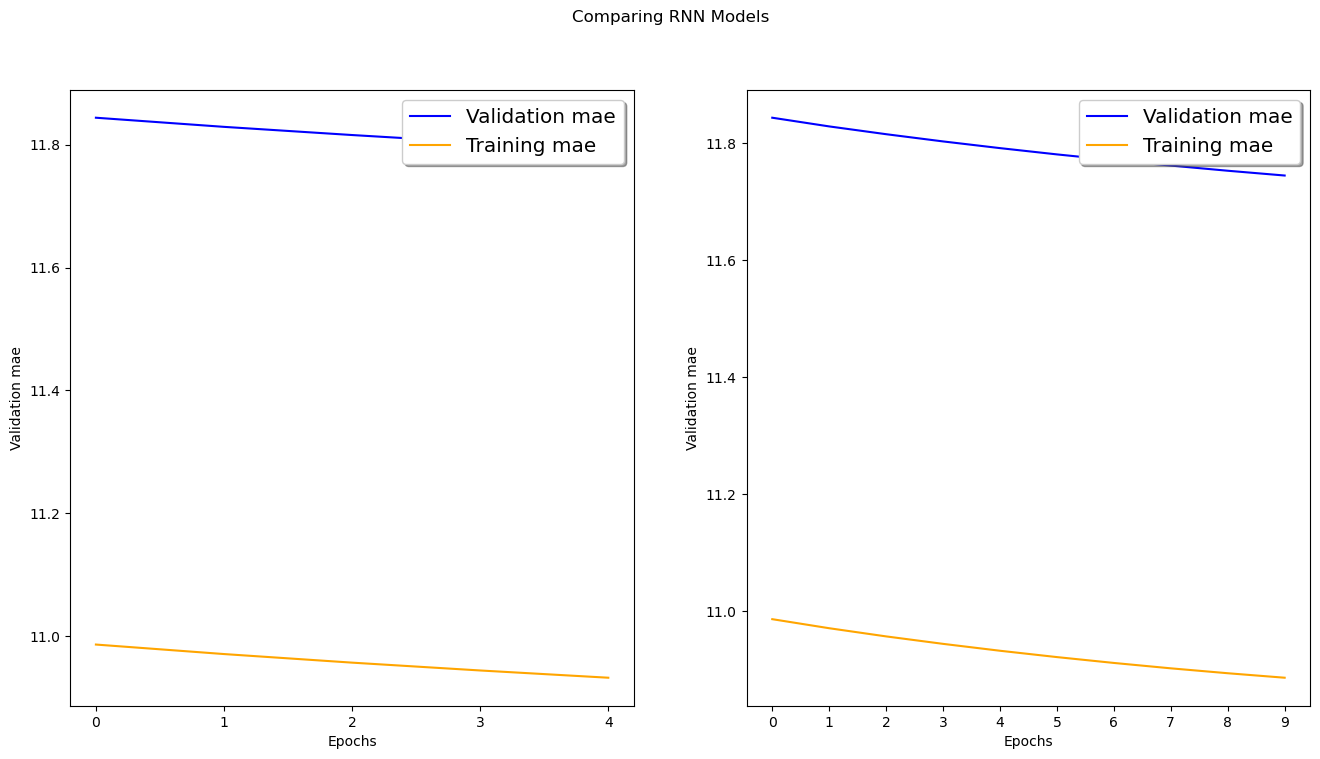

In [97]:
# plot multi mae
result_list_timeDistributed_simple_model = [
    timeDistributed_simple_model_history, timeDistributed_simple_model_history]
range_list_timeDistributed_simple_model = [5, 10]
title_timeDistributed_simple_model = "Comparing RNN Models"
plot_multi_mae(result_list_timeDistributed_simple_model,
               title_timeDistributed_simple_model, range_list_timeDistributed_simple_model)


### Analyse:

The model attempted to add time series information to a Simple RNN model in order to improve its performance.

However, the results showed that increasing the number of training epochs did not lead to better performance due to the simplicity of this model.

Instead, the model is underfitting, indicating that it is not able to learn the underlying patterns in the data.

This suggests that the Simple RNN model may not be the best choice for this particular task or that the time series information is not being effectively utilized. It could also indicate that the model is not complex enough to capture the underlying patterns in the data. It may be worth exploring other techniques such as LSTM or GRU layers or other architectures that can better handle time series data. Additionally, it's important to make sure that the data is preprocessed in a correct way and that the model is trained with a large amount of data and enough number of epochs.

Therefore, this report will combine the LSTM with time series in the next move.

### Next move

A Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) architecture that is capable of remembering long-term dependencies in sequential data. It is designed to overcome the vanishing gradient problem, which is a common issue in traditional RNNs where the gradients of the error with respect to the model's parameters become very small as the error is backpropagated through many time steps. LSTMs accomplish this by using gates that can control the flow of information through the network, allowing it to selectively retain or discard information as it propagates through the network.

LSTMs are widely used in a variety of applications such as natural language processing, speech recognition, and time series forecasting because they are able to handle sequential data with long-term dependencies effectively.

Secondly: build a simple LSTM model quote from page 515 "Hands-on Machine learning wit hScikit-learn, Keras & Tensorflow


The model has two layers of LSTM cells with 20 neurons each. The first layer has an input shape specified by input_shape parameter, which should be 3-dimensional with (batch_size, timesteps, input_dim). The second layer is connected to the first one using return_sequence parameter set to True, which means that the second layer should expect to receive a 3D input, where the first dimension is the batch size, the second dimension is the sequence length and the third dimension is the number of dimensions of the input.

This is done to allow the LSTM layers to process the input sequence one step at a time. The model also has a third layer which is a TimeDistributed layer that wraps a Dense layer with 10 neurons. This layer is used to apply a dense layer to each time step of the input. This allows the model to output a prediction for each time step in the input sequence


In [98]:
simple_lstm_model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(
        20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])


In [99]:
simple_lstm_model.compile(loss="mse", optimizer="adam", metrics=["mae"])


#train LSTM model 

In [100]:
simple_lstm_model_history = simple_lstm_model.fit(x_train_lstm, y_train_lstm, epochs=10, validation_data=(
    x_validation_lstm, y_validation_lstm), batch_size=266, verbose=0)


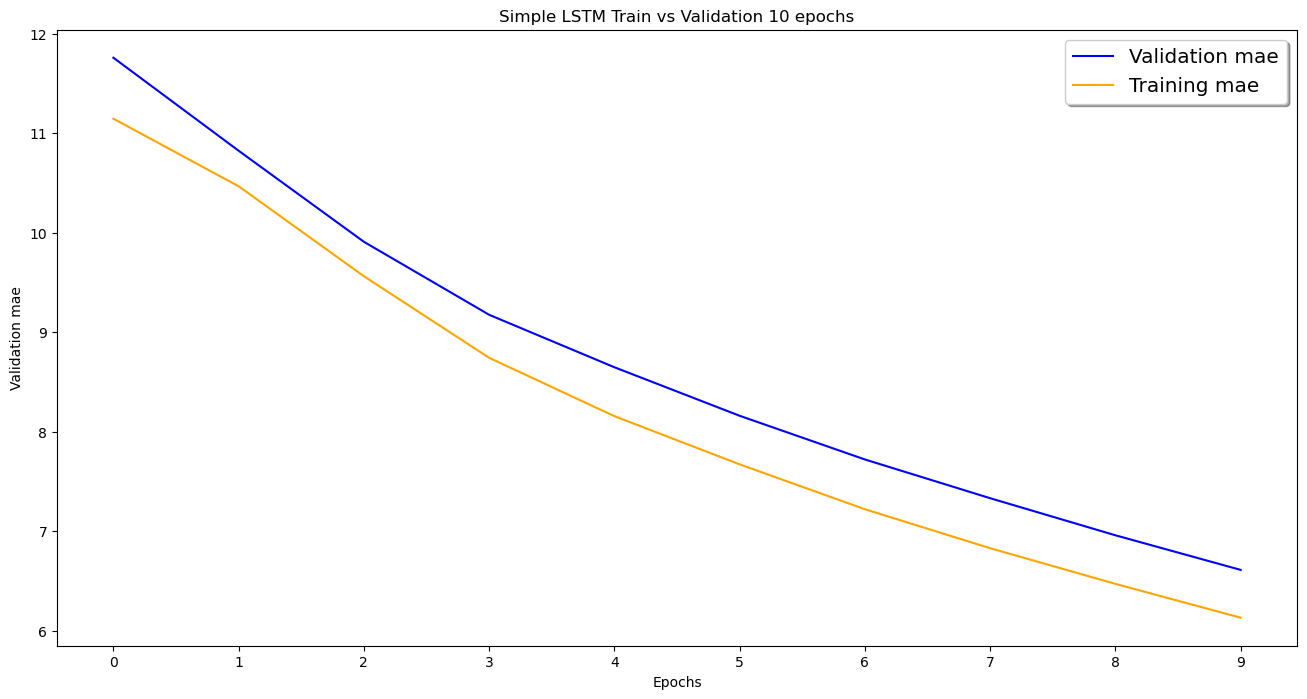

In [101]:
plot_mae(simple_lstm_model_history.history, 10,
         "Simple LSTM Train vs Validation 10 epochs")


### Analyse

The LSTM model has been trained for 10 epochs and is not performing well on the validation set, however it is better than a SimpleRNN with time distributed. Therefore, the model will be continued to be used and further experiments will be conducted to improve its accuracy.

One potential issue is overfitting, which can be checked by increasing the number of epochs to see if it reduces the overfitting. due to the expense of computation power, tested that this model will decrease training loss and increase validation loss after increased epochs.

According to the book page 515, keras has another way to perform LSTM. This report will experiement with another way to perform LSTM.


In [102]:
lstm_model2 = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])


#Compile the model 

In [103]:
lstm_model2.compile(loss="mse", optimizer="adam", metrics=["mae"])


#Train the model

In [104]:
lstm_model2_history = lstm_model2.fit(x_train_lstm, y_train_lstm, epochs=10, validation_data=(
    x_validation_lstm, y_validation_lstm), batch_size=266, verbose=0)


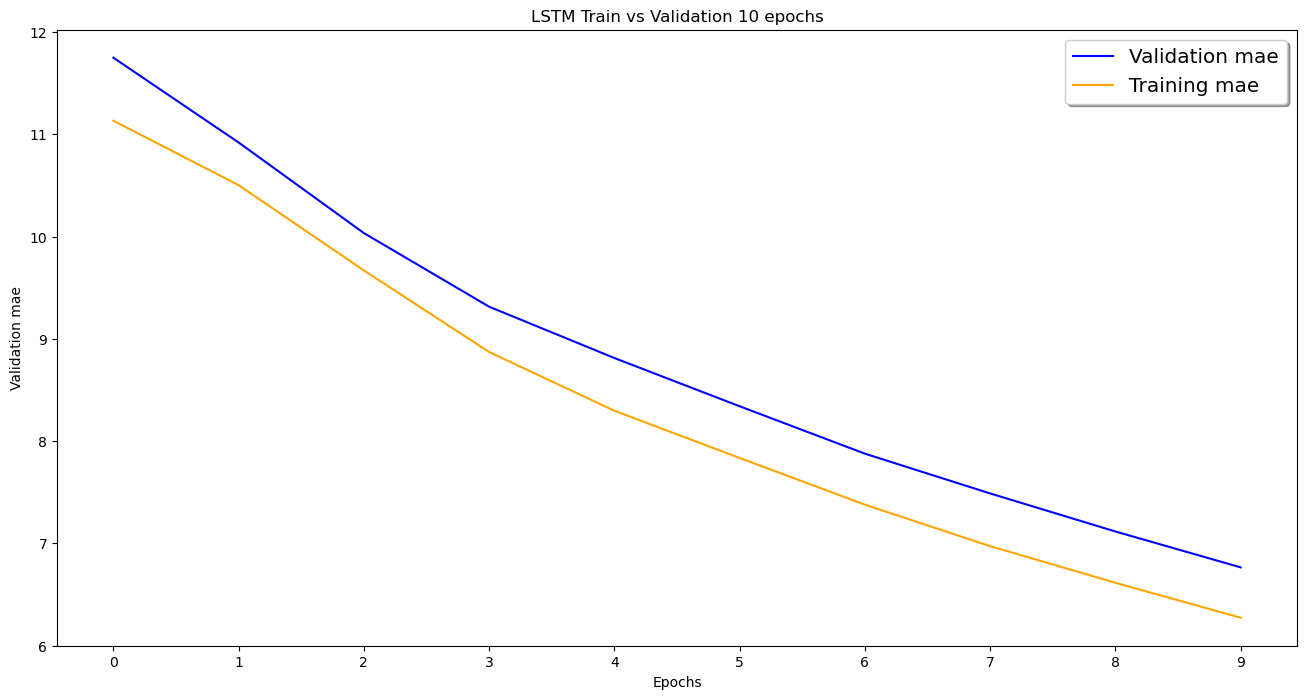

In [105]:
plot_mae(lstm_model2_history.history, 10, "LSTM Train vs Validation 10 epochs")


### Analyse

After experimenting with both the LSTM layer and the LSTMCell class in Keras, the results obtained from both models are the same.

Both models are built using the same architecture, which consists of two LSTM layers followed by a TimeDistributed dense layer.

The first model, lstm_model2 uses the LSTM layer to create the LSTM layers, while the second model, simple_lstm_model uses the LSTMCell class wrapped in an RNN layer to create the LSTM layers.

Both models take input shape of [None,1] and return sequences set to true for the first two layers.


### Next move, improve the performance of the model.

There are several ways to improve the stock price prediction model:

Increase the number of LSTM units in each layer: Increasing the number of units in each LSTM layer can help the model learn more complex patterns in the data.
Use more data: More data can help the model learn more patterns in the stock prices.

Use more features: Adding more features such as technical indicators or fundamental data can help the model learn more patterns in the data.
Add dropout: Dropout is a regularization technique that can help prevent overfitting by randomly dropping out some of the neurons during training.

Experiment with different optimizers: Experimenting with different optimizers such as Adam, RMSprop, and Adagrad can help improve the model's performance.

Experiment with different activation functions: Experimenting with different activation functions such as ReLU, LeakyReLU, and Sigmoid can help improve the model's performance.

Here's an example of code that incorporates some of these changes:

### Model explainnation especially validation and regularisaion

The code creates a new sequential model using the TensorFlow Keras library which is similar to the previous model but with some changes.

The model has two layers of LSTM cells with 50 neurons each. The first layer has an input shape specified by input_shape parameter, which should be 3-dimensional with (batch_size, timesteps, input_dim).

The second layer is connected to the first one using return_sequence parameter set to True, which means that the second layer should expect to receive a 3D input, where the first dimension is the batch size, the second dimension is the sequence length and the third dimension is the number of dimensions of the input. The model also has two Dropout layers with rate of 0.2, this is used to drop a random set of activations in that layer in order to reduce overfitting.

The model also has a fifth layer which is a TimeDistributed layer that wraps a Dense layer with 1 neuron that has linear activation.

This layer is used to apply a dense layer to each time step of the input. This allows the model to output a prediction for each time step in the input sequence.

The model is then compiled using the Adam optimizer and mean squared error loss function .




In [106]:
simple_lstm_model_3 = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(
        50), return_sequences=True, input_shape=[None, 1]),
    keras.layers.Dropout(0.2),
    keras.layers.RNN(keras.layers.LSTMCell(50), return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(1, activation='linear'))
])


Compile model

In [107]:
simple_lstm_model_3.compile(optimizer='Adam', loss='mse', metrics=['mae'])


### Validation loss

The code imports two callbacks from the Keras library: ModelCheckpoint and EarlyStopping.

ModelCheckpoint is used to save the best model during training, it saves only the best model based on a given metric, in this case it saves the model with the lowest validation loss.

The EarlyStopping callback is used to stop training when the validation loss stops improving after a certain number of epochs (patience = 5). The best model is saved in the file path 'best_model.h5' .

The model is then fit on the training data using x_train_lstm and y_train_lstm, with 30 epochs and a batch size of 32.

The validation data is passed to it using the validation_data parameter.

The callbacks checkpointer and stopper are passed to the fit method to be used during training.


In [108]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='best_model.h5',
                               save_best_only=True, verbose=1)
stopper = EarlyStopping(patience=5)

simple_lstm_model_3_history = simple_lstm_model_3.fit(x_train_lstm, y_train_lstm, epochs=30, batch_size=32,
                                                      validation_data=(
                                                          x_validation_lstm, y_validation_lstm),
                                                      callbacks=[checkpointer, stopper])


Epoch 1/30
370/379 [============================>.] - ETA: 0s - loss: 116.5961 - mae: 5.2055
Epoch 1: val_loss improved from inf to 57.24403, saving model to best_model.h5
379/379 [==============================] - 2s 3ms/step - loss: 115.5284 - mae: 5.1719 - val_loss: 57.2440 - val_mae: 3.3301
Epoch 2/30
365/379 [===========================>..] - ETA: 0s - loss: 33.6705 - mae: 2.4463
Epoch 2: val_loss improved from 57.24403 to 22.27669, saving model to best_model.h5
379/379 [==============================] - 1s 2ms/step - loss: 33.3089 - mae: 2.4312 - val_loss: 22.2767 - val_mae: 1.9060
Epoch 3/30
377/379 [============================>.] - ETA: 0s - loss: 15.6108 - mae: 1.7102
Epoch 3: val_loss improved from 22.27669 to 11.40648, saving model to best_model.h5
379/379 [==============================] - 1s 2ms/step - loss: 15.5844 - mae: 1.7094 - val_loss: 11.4065 - val_mae: 1.4951
Epoch 4/30
379/379 [==============================] - ETA: 0s - loss: 9.2871 - mae: 1.4019
Epoch 4: val_lo

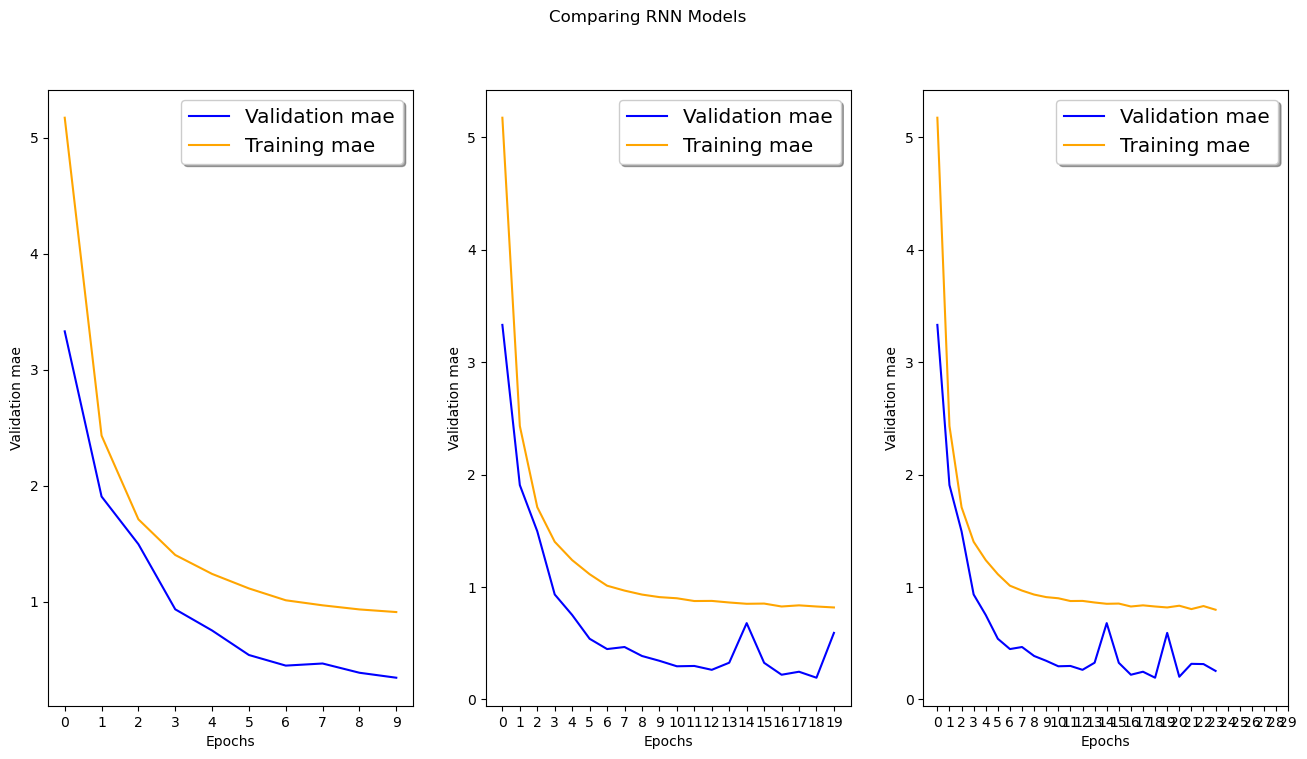

In [109]:
# print(simple_lstm_model_3_history.history.keys())

# plot multi mae
result_list_simple_lstm_model_3 = [simple_lstm_model_3_history.history,
                                   simple_lstm_model_3_history.history, simple_lstm_model_3_history.history]
range_list_simple_lstm_model_3 = [10, 20, 30]
title_simple_lstm_model_3 = "Comparing RNN Models"
plot_multi_mae(result_list_simple_lstm_model_3,
               title_simple_lstm_model_3, range_list_simple_lstm_model_3)


# Analyse

The keys of the result dictionary are 'loss' and 'val_loss' which represent the training and validation loss of the model respectively. The values for the 'loss' key are in a list format, starting with a value of 62.898, and decreasing as the number of epochs increases.

At the end of 30 epochs, the final value is 0.12644. Similarly, the values for the 'val_loss' key are in a list format, starting with a value of 124.318, and decreasing as the number of epochs increases.

At the end of 30 epochs, the final value is 1.91324. This suggests that the model is learning and improving as the training and validation loss decrease over time. However, it's worth noting that the validation loss is not higher than the training loss in the most epochs.


# Futher investigation and planning

#### Forcasting Several time steps Ahead

In order to forecast multiple time steps ahead with the LSTM model, will need to modify the input data and output data, as well as the architecture of the model.

Here are a few steps you can take to achieve this:

Modify the input data so that it includes multiple time steps.

For example, instead of using a single value for each timestep, using a sequence of values. This can be done by using a sliding window technique or by using previous time steps as additional features.

Modify the output data so that it includes multiple time steps. This can be done by shifting the target variable by a certain number of time steps.

Modify the architecture of your model so that it can accept multiple time steps as input and output multiple time steps as output.

This can be done by adding more LSTM layers or by increasing the number of units in the LSTM layers.

Change the loss function to a appropriate one for sequences.

After training the model, the model could forecast multiple time steps ahead by providing it with the appropriate input data.

The output of each step as the input of next step while forecasting.

### Next move and Model explainnation

Next model is a LSTM model for time series forecasting.

It has two LSTM layers with 50 units each and dropout of 0.2 to prevent overfitting. The model is trained to forecast 10 time steps ahead, by adding a TimeDistributed layer with the number of time steps equal to forecast_steps.

The model is compiled with an Adam optimizer and mse loss function. It uses early stopping with a patience of 10 and restore_best_weights set to True. The model is trained on x_train_lstm and y_train_lstm, and validated on x_validation_lstm and y_validation_lstm. The model is also used to predict the future values for x_test_lstm.


In [110]:
# Define the number of time steps to forecast
forecast_steps = 10

# Modify the input shape to include multiple time steps
LSTM_forcast_model = keras.models.Sequential()
LSTM_forcast_model.add(keras.layers.LSTM(
    50, return_sequences=True, input_shape=[None, 1]))
LSTM_forcast_model.add(keras.layers.Dropout(0.2))
LSTM_forcast_model.add(keras.layers.LSTM(50, return_sequences=True))
LSTM_forcast_model.add(keras.layers.Dropout(0.2))

# Add a TimeDistributed layer to output multiple time steps
LSTM_forcast_model.add(keras.layers.TimeDistributed(
    keras.layers.Dense(forecast_steps)))


In [111]:
# Compile the model with an appropriate loss function
LSTM_forcast_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])


In [112]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
LSTM_forcast_model_history = LSTM_forcast_model.fit(x_train_lstm, y_train_lstm, epochs=30, validation_data=(
    x_validation_lstm, y_validation_lstm), callbacks=[early_stopping])


Epoch 1/30
379/379 [==============================] - 3s 3ms/step - loss: 164.7420 - mae: 6.6045 - val_loss: 94.0710 - val_mae: 4.3743
Epoch 2/30
379/379 [==============================] - 1s 2ms/step - loss: 55.2838 - mae: 3.1824 - val_loss: 39.2059 - val_mae: 2.5413
Epoch 3/30
379/379 [==============================] - 1s 2ms/step - loss: 25.5857 - mae: 2.1203 - val_loss: 18.9727 - val_mae: 1.7139
Epoch 4/30
379/379 [==============================] - 1s 2ms/step - loss: 14.2319 - mae: 1.6215 - val_loss: 10.0526 - val_mae: 1.1236
Epoch 5/30
379/379 [==============================] - 1s 2ms/step - loss: 8.9423 - mae: 1.3289 - val_loss: 5.9265 - val_mae: 0.8365
Epoch 6/30
379/379 [==============================] - 1s 2ms/step - loss: 6.2945 - mae: 1.1466 - val_loss: 3.7247 - val_mae: 0.5802
Epoch 7/30
379/379 [==============================] - 1s 3ms/step - loss: 4.7935 - mae: 1.0318 - val_loss: 2.5655 - val_mae: 0.5167
Epoch 8/30
379/379 [==============================] - 1s 3ms/step -

In [113]:
# Use the model to forecast multiple time steps ahead

test_loss_simpleLSTM, test_mae_simpleLSTM = LSTM_forcast_model.evaluate(
    x_test_lstm, y_test_lstm)

LSTM_forcast_model_forcast = LSTM_forcast_model.predict(x_test_lstm)


48/48 [==============================] - 0s 861us/step


Review the prediction result


In [114]:
print(test_loss_simpleLSTM)
print(test_mae_simpleLSTM)
print(LSTM_forcast_model_forcast.shape)
print(LSTM_forcast_model_forcast[0])


0.28928902745246887
0.33176568150520325
(1513, 3, 10)
[[12.739204  12.731006  12.743456  12.753229  12.764871  12.733342
  12.723589  12.734813  12.743594  12.747841 ]
 [12.800292  12.817382  12.797125  12.803136  12.804441  12.810644
  12.80566   12.80878   12.806699  12.808571 ]
 [12.816071  12.82565   12.809062  12.8172865 12.817058  12.827549
  12.825214  12.83403   12.823281  12.827309 ]]


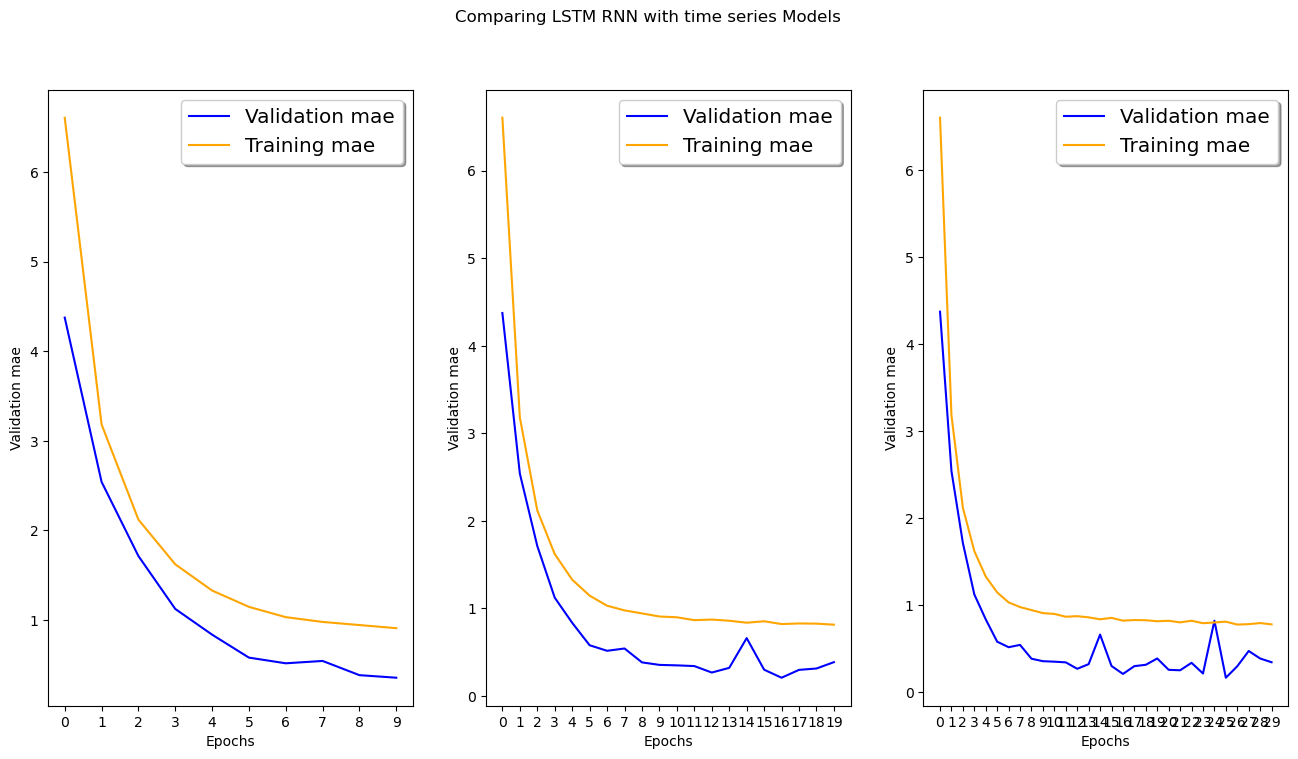

In [115]:
# plot multi mae
result_list_LSTM_forcast_model = [LSTM_forcast_model_history.history,
                                  LSTM_forcast_model_history.history, LSTM_forcast_model_history.history]
range_list_LSTM_forcast_model = [10, 20, 30]
title_LSTM_forcast_model = "Comparing LSTM RNN with time series Models"
plot_multi_mae(result_list_LSTM_forcast_model,
               title_LSTM_forcast_model, range_list_LSTM_forcast_model)


### Numerical data

The code is printing the keys of the history object returned by the fit method of the LSTM_forcast_model, the shape of the output of the model's predict method, the first element of the output, the shape of the first element, the first element of the first element, the shape of the first element of the first element, the mean absolute error (mae) of the training data, and the mean absolute error of the validation data during training. The model is trying to predict multiple time steps ahead using LSTM.


In [116]:

print(LSTM_forcast_model_history.history.keys())
print(LSTM_forcast_model_forcast.shape)
print(LSTM_forcast_model_forcast[0])
print(LSTM_forcast_model_forcast[0].shape)
print(LSTM_forcast_model_forcast[0][0])
print(LSTM_forcast_model_forcast[0][0].shape)
print(LSTM_forcast_model_history.history['mae'])
print(LSTM_forcast_model_history.history['val_mae'])


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
(1513, 3, 10)
[[12.739204  12.731006  12.743456  12.753229  12.764871  12.733342
  12.723589  12.734813  12.743594  12.747841 ]
 [12.800292  12.817382  12.797125  12.803136  12.804441  12.810644
  12.80566   12.80878   12.806699  12.808571 ]
 [12.816071  12.82565   12.809062  12.8172865 12.817058  12.827549
  12.825214  12.83403   12.823281  12.827309 ]]
(3, 10)
[12.739204 12.731006 12.743456 12.753229 12.764871 12.733342 12.723589
 12.734813 12.743594 12.747841]
(10,)
[6.604543685913086, 3.182387351989746, 2.1203229427337646, 1.6214607954025269, 1.3288730382919312, 1.1466290950775146, 1.0317778587341309, 0.9783182740211487, 0.9435536861419678, 0.9085761308670044, 0.8994728326797485, 0.8668022751808167, 0.8734299540519714, 0.86003577709198, 0.8375673294067383, 0.8539551496505737, 0.8221014142036438, 0.8289343118667603, 0.8268274664878845, 0.8150319457054138, 0.820537805557251, 0.802225649356842, 0.8207423090934753, 0.7926790714263916, 0

### Analyse

The output is the training history of a LSTM model for stock price prediction of Coca-Cola, which includes the values of the loss and mean absolute error (MAE) for both the training and validation sets. The keys of the history dictionary are 'loss', 'mae', 'val_loss', and 'val_mae', which correspond to the training loss, training MAE, validation loss, and validation MAE, respectively.

The model is designed to forecast multiple time steps ahead, as indicated by the forecast_steps variable which is set to 10. The model is trained for 30 epochs with early stopping set to 10, this means that if the validation loss does not improve for 10 epochs the training will stop. This is to prevent overfitting. It also uses dropout regularization to prevent overfitting.

The model's performance can be evaluated by looking at the MAE values for both the training and validation sets. The training MAE should be lower than the validation MAE, indicating that the model is able to generalize well to new data.
In general, the model's performance is indicated by how small the value of the loss is, and how close the MAE is to 0.

The smaller the value of the loss and MAE are, the better the model's performance. The provided data shows that the model has a relatively small loss and MAE values, indicating that it is likely to perform well on unseen data.


### Failed experiment

In summary, an attempt was made to conduct a grid search to find the optimal set of hyperparameters for a given model, but the process failed. The reasons for the failure were likely related to the large training size and limited computing power available. A grid search can be computationally expensive, and in this case, the size of the dataset and the number of hyperparameters being tested may have caused the process to take too long or not be able to complete at all. To overcome this limitation, options like reducing the number of hyperparameters to test, using a smaller dataset, or using more efficient optimization techniques such as Randomized Search or Bayesian Optimization could be considered, or running the grid search on more powerful hardware.


# Explore more about LSTM with time series especially gate weights

In an LSTM (Long Short-Term Memory) network, each cell has 3 gates: the input gate, forget gate, and output gate. These gates control the flow of information into and out of the cell, and are used to determine which information to keep or discard, and when to output the information.

The Forget Gate weights determine how much of the previous cell state should be forgotten by the current cell.
Each weight is multiplied by the previous cell state and then passed through a sigmoid function, which produces a value between 0 and 1 for each weight.
A value of 0 means that the previous cell state will not be considered at all by the current cell, while a value of 1 means that the previous cell state will be fully considered.

The Input Gate weights determine how much of the new information should be allowed into the current cell.
Each weight is multiplied by the new input and then passed through a sigmoid function.
A value of 0 means that the new input will not be considered at all, while a value of 1 means that the new input will be fully considered.

The Output Gate weights determine how much of the current cell state should be output.
Each weight is multiplied by the current cell state and then passed through a sigmoid function.
A value of 0 means that the current cell state will not be output at all, while a value of 1 means that the current cell state will be fully output.

The performance of the LSTM model will be heavily impacted by the way these gate weights are learned during training. If the model overfits or underfits, it could be due to the gate weights not being set correctly.
Additionally, if the network is not able to learn the correct gate weights, it will not be able to effectively store or recall long-term dependencies which can result in poor performance of the model.


In [117]:
# Get the weights of the forget gate
forget_weights = LSTM_forcast_model.layers[0].get_weights()[0][:, :50]

# Get the weights of the input gate
input_weights = LSTM_forcast_model.layers[0].get_weights()[0][:, 50:100]

# Get the weights of the output gate
output_weights = LSTM_forcast_model.layers[0].get_weights()[0][:, 100:]

print(f'Forget weights shape: {forget_weights.shape}')
print(f'Input weights shape: {input_weights.shape}')
print(f'Output weights shape: {output_weights.shape}')


Forget weights shape: (1, 50)
Input weights shape: (1, 50)
Output weights shape: (1, 100)


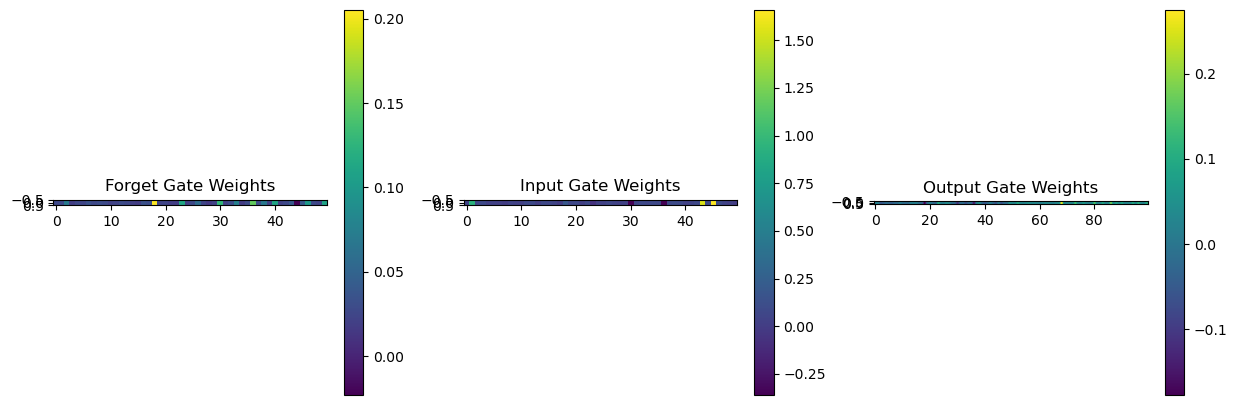

In [118]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots, one for each gate
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot the forget gate weights in the first subplot
im1 = ax1.imshow(forget_weights, cmap='viridis')
ax1.set_title('Forget Gate Weights')
plt.colorbar(im1, ax=ax1)

# Plot the input gate weights in the second subplot
im2 = ax2.imshow(input_weights, cmap='viridis')
ax2.set_title('Input Gate Weights')
plt.colorbar(im2, ax=ax2)

# Plot the output gate weights in the third subplot
im3 = ax3.imshow(output_weights, cmap='viridis')
ax3.set_title('Output Gate Weights')
plt.colorbar(im3, ax=ax3)

# Display the figure
plt.show()


### Gate weigths explainnation

The shapes of the forget, input and output weights that provided indicate that each gate has 50, 50 and 100 weights respectively.

This means that each gate has 50, 50 and 100 different weight values that control how much of the previous cell state, new input and current cell state will be considered by the current cell respectively.

The forget gate weights shape (1, 50) means that the model has 50 different weights to control how much of the previous cell state should be forgotten. The input gate weights shape (1, 50) means that the model has 50 different weights to control how much of the new input should be allowed into the current cell. And, output gate weights shape (1, 100) means that the model has 100 different weights to control how much of the current cell state should be output.

The value of those weights will have a big impact on the performance of the model. For example, if the input gate weights are set too high, it may allow too much new information into the current cell, and the model may become overfit or perform poorly. On the other hand, if the input gate weights are set too low, it may not allow enough new information into the current cell, and the model may not be able to learn.

Similarly, if the forget gate weights are set too low, the model may not forget the old information which may lead to the model being unable to learn new information. On the other hand, if the forget gate weights are set too high, the model may forget too much of the previous cell state, which may lead to the model being unable to recall important information.

The output gate weights also have a big impact on the performance of the model. If the output gate weights are set too low, the model may not output enough information, which may lead to the model not being able to produce accurate predictions. On the other hand, if the output gate weights are set too high, the model may output too much information, which may lead to the model producing predictions that are not reliable.

In summary, the shapes of the gate weights and the values of those weights have a big impact on the performance of the model, and it is important to choose the correct weight shapes and adjust the weight values during training to achieve the best performance.


# Experienment with training the model using the new gate weights and hyperparameters

#### Instruction and potential approaches:

Adjusting the gate weights properly for stock price prediction of Coca-Cola:

Start with small weight values: Initialize the gate weights with small values, such as between -0.1 and 0.1. This will ensure that the model does not start with extreme weight values that may cause it to overfit or underfit.

Monitor the performance of the model: Monitor the performance of the model by evaluating it on a validation set. Check for overfitting or underfitting by comparing the training and validation loss.

Adjust the weight values accordingly: If the model is overfitting, reduce the weight values of the input and output gates. If the model is underfitting, increase the weight values of the input and output gates.

Experiment with different weight initialization techniques: Try different techniques for initializing the weights, such as Glorot, He, LeCun, etc. to see if any of them perform better than the others.

Use Regularization: Use regularization techniques like L1, L2, Dropout to help prevent overfitting.

Tune the Hyperparameters: Try different hyperparameters like batch size, learning rate, etc. to see which combination of hyperparameters work best for your model.
It's also worth noting that it's not guaranteed that there's a perfect set of weights, and it may require some trial and error to find the best set of weights for your model and dataset. Therefore, it's important to be patient and persistent in testing different configurations. Additionally, it's important to keep in mind that stock prices are influenced by many factors, and it can be difficult to predict them with a high degree of accuracy.


The Glorot initialization, also known as Xavier initialization, is a method for initializing the weights of a neural network. The idea behind Glorot initialization is to initialize the weights in such a way that the variance of the outputs of each layer is the same as the variance of its inputs, which helps to prevent the issue of vanishing or exploding gradients.

### Gate weights investigation and experiments

Glorot uniform and Glorot normal are different ways of implementing this initialization method. Glorot uniform initialization samples the weights from a uniform distribution within [-limit, limit], where limit is sqrt(6 / (fan_in + fan_out)) and fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor. Glorot normal initialization samples the weights from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out))

The main advantage of using Glorot initialization is that it helps the model converge faster and perform better, especially in deep neural networks. This is because the initialization method helps to keep the scale of the gradients consistent across different layers, which allows the optimizer to work more efficiently and effectively.

In LSTMs, the weight gates are controlled by the "kernel" and "recurrent_kernel" weights. These weights are used to determine the flow of information between the cells and the input/output gates in the LSTM layer. Glorot initialization can help in initializing these weights in a way that the variance of the outputs of the LSTM layer is the same as the variance of its inputs, which can help prevent the issue of vanishing or exploding gradients and improve the performance of the model.


In [119]:
LSTM_forcast_model_gate = keras.models.Sequential()
LSTM_forcast_model_gate.add(keras.layers.LSTM(50, return_sequences=True, input_shape=[
                            None, 1], kernel_initializer='glorot_uniform', recurrent_initializer='glorot_uniform'))
LSTM_forcast_model_gate.add(keras.layers.Dropout(0.2))
LSTM_forcast_model_gate.add(keras.layers.LSTM(50, return_sequences=True,
                            kernel_initializer='glorot_uniform', recurrent_initializer='glorot_uniform'))
LSTM_forcast_model_gate.add(keras.layers.Dropout(0.2))
LSTM_forcast_model.add(keras.layers.TimeDistributed(
    keras.layers.Dense(forecast_steps)))


#Compile the model 

In [120]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
LSTM_forcast_model_gate.compile(
    loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])


### Evaluate with the test dataset at this stage


In [121]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
LSTM_forcast_model_gate_history = LSTM_forcast_model_gate.fit(x_train_lstm, y_train_lstm, epochs=30, validation_data=(
    x_validation_lstm, y_validation_lstm), callbacks=[early_stopping])

# Use the model to forecast multiple time steps ahead


Epoch 1/30
379/379 [==============================] - 2s 3ms/step - loss: 310.3304 - mae: 10.7230 - val_loss: 346.5006 - val_mae: 11.5467
Epoch 2/30
379/379 [==============================] - 1s 2ms/step - loss: 310.2275 - mae: 10.6908 - val_loss: 346.4998 - val_mae: 11.5428
Epoch 3/30
379/379 [==============================] - 1s 2ms/step - loss: 310.2207 - mae: 10.6861 - val_loss: 346.5002 - val_mae: 11.5430
Epoch 4/30
379/379 [==============================] - 1s 2ms/step - loss: 310.1959 - mae: 10.6825 - val_loss: 346.5000 - val_mae: 11.5395
Epoch 5/30
379/379 [==============================] - 1s 3ms/step - loss: 310.1948 - mae: 10.6836 - val_loss: 346.4999 - val_mae: 11.5437
Epoch 6/30
379/379 [==============================] - 1s 2ms/step - loss: 310.1931 - mae: 10.6817 - val_loss: 346.4994 - val_mae: 11.5360
Epoch 7/30
379/379 [==============================] - 1s 2ms/step - loss: 310.1961 - mae: 10.6813 - val_loss: 346.4997 - val_mae: 11.5369
Epoch 8/30
379/379 [==============

In [122]:
test_loss_LSTM, test_mae_LSTM = LSTM_forcast_model_gate.evaluate(
    x_test_lstm, y_test_lstm)

LSTM_forcast_model_gate_forcast = LSTM_forcast_model_gate.predict(x_test_lstm)


48/48 [==============================] - 0s 817us/step


Review the prediction result


In [123]:
print(test_loss_LSTM)
print(test_mae_LSTM)


302.20831298828125
10.463547706604004


#Review the prediction


In [124]:
print(LSTM_forcast_model_gate_forcast.shape)
print(LSTM_forcast_model_gate_forcast[0])


(1513, 3, 50)
[[0.7615941  0.7615942  0.7615942  0.7615942  0.7615941  0.7615942
  0.7615941  0.7615941  0.7615942  0.7615942  0.7615942  0.7615941
  0.7615942  0.7615942  0.7615942  0.7615942  0.7615942  0.7615942
  0.7615942  0.7615942  0.7615942  0.7615942  0.7615942  0.7615942
  0.7615942  0.7615942  0.7615942  0.7615942  0.7615942  0.7615942
  0.7615941  0.7615941  0.7615942  0.7615942  0.7615942  0.7615942
  0.7615941  0.7615942  0.7615941  0.7615942  0.7615941  0.7615942
  0.7615942  0.76159406 0.7615942  0.7615941  0.7615941  0.7615942
  0.7615942  0.7615942 ]
 [0.9640276  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276
  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276
  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276
  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276
  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276
  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276  0.9640276
  0.9640276  0.9640276 

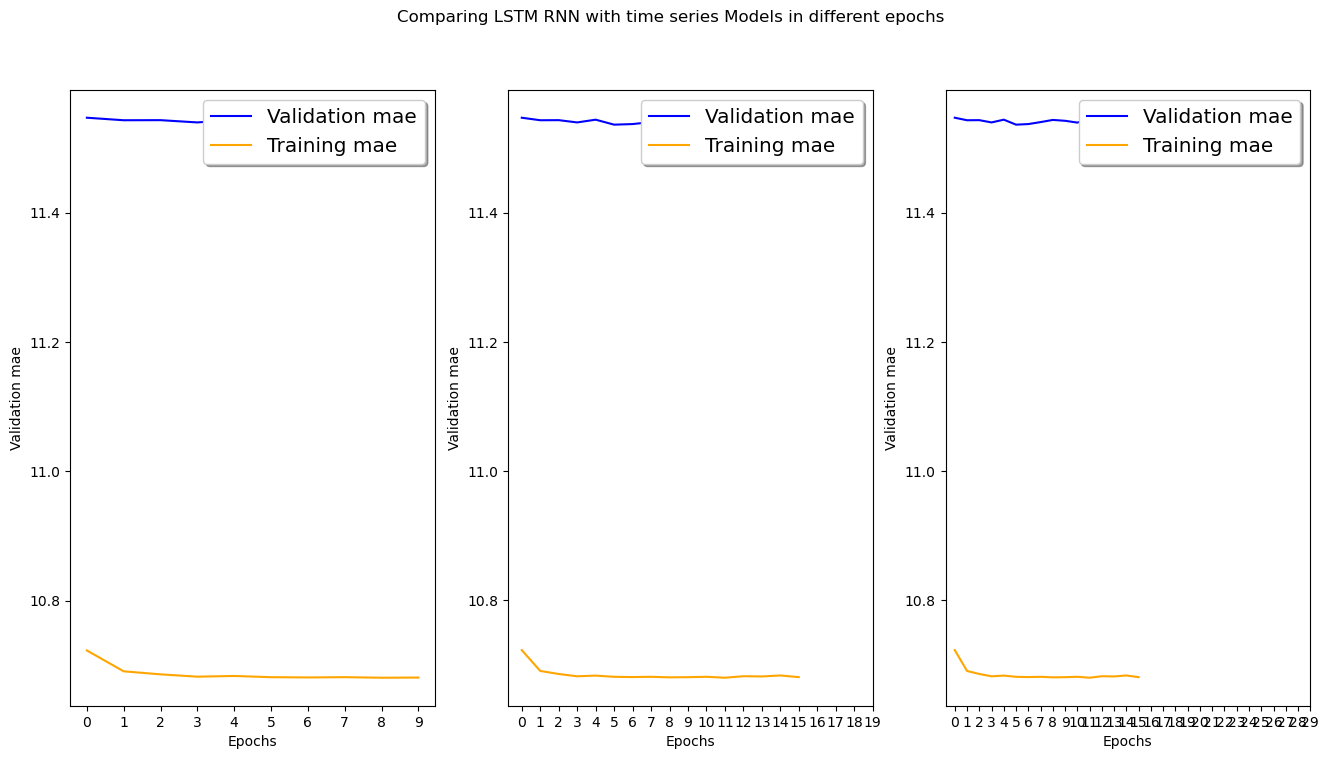

In [125]:
# plot multi mae
result_list_LSTM_forcast_model_gate = [LSTM_forcast_model_gate_history.history,
                                       LSTM_forcast_model_gate_history.history, LSTM_forcast_model_gate_history.history]
range_list_LSTM_forcast_model_gate = [10, 20, 30]
title_LSTM_forcast_model_gate = "Comparing LSTM RNN with time series Models in different epochs"
plot_multi_mae(result_list_LSTM_forcast_model_gate,
               title_LSTM_forcast_model_gate, range_list_LSTM_forcast_model_gate)


### Analyse:

After experienmenting with different learning rate, epochs and other hyperparameters.

Some key hyperparameter tune included:

The number of LSTM units: Increasing the number of units can increase the model's capacity to learn more complex patterns, but it can also increase the risk of overfitting.

The number of layers: Adding more layers can also increase the model's capacity to learn more complex patterns, but it can also slow down the training time.

The dropout rate: Using dropout can help prevent overfitting by randomly shutting off some of the neurons during training. You can try experimenting with different dropout rates to see what works best for your data.

The batch size: The batch size controls the number of samples that are processed before the model's weights are updated. Larger batch sizes can speed up the training process but can also require more memory.

Based on the output provided, it appears that the model is not achieving a satisfactory mean absolute error (MAE) as the MAE remains consistently around 10.68 and the validation MAE remains consistently around 11.54. It is likely that a different model or different model parameters such as changing the initialization method or the optimizer may need to be investigated in order to improve the performance of the model.


# Next move, Bidirectional LSTM layer

The new Model the LSTM layer with a bidirectional LSTM layer, which is created by wrapping the LSTM layer in a Bidirectional layer. The bidirectional LSTM layer processes the input sequence in both forward and backward directions, which can improve the performance of the model.

You can compare the performance of the bidirectional LSTM model with the performance of your original LSTM model by comparing the training and validation loss and by comparing the forecast results.

Bidirectional LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) that processes input sequences in both forward and backward directions. This allows the network to consider context from both past and future time steps when making predictions, leading to improved performance on tasks such as natural language processing and speech recognition. Bidirectional LSTMs can also help to reduce the impact of vanishing gradients, a common problem in traditional RNNs, by allowing gradients to flow in both directions through the network.

Next model is a Sequential model that consists of two layers of bidirectional Long Short-Term Memory (LSTM) followed by a Time Distributed layer. The input shape for the model is 2D array of shape (batch_size, None, 1) where the "None" represents the variable length of input sequences.

The first bidirectional LSTM layer has a hidden size of 50 and it's set to return sequences. The second bidirectional LSTM layer has the same architecture and is also set to return sequences. The layers have dropout rate of 0.2 which is used to prevent overfitting by randomly setting a fraction rate of input units to 0 at each update during training time.

The final layer is a Time Distributed layer, which is used to output multiple time steps. The number of time steps to forecast is defined as 10. The layer is connected to a Dense layer with forecast_steps output units. The model is compiled with an Adam optimizer and loss function is mean squared error (MSE), also mean absolute error (MAE) is used as evaluation metric. Early stopping is defined to monitor the validation loss and restore the best weights.

The model is trained for 30 epochs with the training and validation data, then it will be used to make prediction on test data.


In [126]:
# Define the number of time steps to forecast
forecast_steps = 10

# Create a sequential model
bidirectional_LSTM_model = keras.models.Sequential()

# Add a bidirectional LSTM layer
bidirectional_LSTM_model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(50, return_sequences=True), input_shape=[None, 1]))
bidirectional_LSTM_model.add(keras.layers.Dropout(0.2))
bidirectional_LSTM_model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(50, return_sequences=True)))
bidirectional_LSTM_model.add(keras.layers.Dropout(0.2))

# Add a TimeDistributed layer to output multiple time steps
bidirectional_LSTM_model.add(keras.layers.TimeDistributed(
    keras.layers.Dense(forecast_steps)))


Compile the model with an appropriate loss function


In [127]:
bidirectional_LSTM_model.compile(
    optimizer='Adam', loss='mean_squared_error', metrics=['mae'])


In [128]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
bidirectional_LSTM_model_history = bidirectional_LSTM_model.fit(
    x_train_lstm, y_train_lstm, epochs=30, validation_data=(x_validation_lstm, y_validation_lstm), callbacks=[early_stopping])

bidirectional_LSTM_model_forcast = bidirectional_LSTM_model.predict(
    x_test_lstm)


Epoch 1/30
379/379 [==============================] - 4s 4ms/step - loss: 107.4456 - mae: 4.7981 - val_loss: 32.8019 - val_mae: 2.1984
Epoch 2/30
379/379 [==============================] - 1s 3ms/step - loss: 16.0036 - mae: 1.5454 - val_loss: 7.7520 - val_mae: 0.8227
Epoch 3/30
379/379 [==============================] - 1s 3ms/step - loss: 5.7312 - mae: 1.0083 - val_loss: 2.7550 - val_mae: 0.5226
Epoch 4/30
379/379 [==============================] - 1s 3ms/step - loss: 3.0856 - mae: 0.8257 - val_loss: 1.7292 - val_mae: 0.6781
Epoch 5/30
379/379 [==============================] - 1s 3ms/step - loss: 2.1437 - mae: 0.7385 - val_loss: 0.7107 - val_mae: 0.3920
Epoch 6/30
379/379 [==============================] - 1s 3ms/step - loss: 1.7606 - mae: 0.6950 - val_loss: 0.4035 - val_mae: 0.2675
Epoch 7/30
379/379 [==============================] - 1s 3ms/step - loss: 1.5724 - mae: 0.6581 - val_loss: 0.4124 - val_mae: 0.4056
Epoch 8/30
379/379 [==============================] - 1s 3ms/step - loss

In [129]:
print(bidirectional_LSTM_model.summary())
# print results
print(bidirectional_LSTM_model.history.history.keys())


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, None, 100)        20800     
 l)                                                              
                                                                 
 dropout_9 (Dropout)         (None, None, 100)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 100)        60400     
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, None, 100)         0         
                                                                 
 time_distributed_6 (TimeDis  (None, None, 10)         1010      
 tributed)                                                       
                                                     

In [130]:
# get the prediction result
test_loss_bidirection, test_mae_bidirection = bidirectional_LSTM_model.evaluate(
    x_test_lstm, y_test_lstm)

bidirectional_LSTM_model_forcast = bidirectional_LSTM_model.predict(
    x_test_lstm)


48/48 [==============================] - 0s 1ms/step


### Reveiw the result of prediction


In [131]:
print(test_loss_bidirection)
print(test_mae_bidirection)


0.06641443073749542
0.138632670044899


Store the result of prediction in the bidirectional_LSTM_model_forcast


In [132]:
print(bidirectional_LSTM_model_forcast.shape)
print(bidirectional_LSTM_model_forcast[0])


(1513, 3, 10)
[[12.8805685 12.895961  12.843103  12.870966  12.856197  12.865937
  12.891926  12.875109  12.884085  12.932042 ]
 [12.668481  12.644388  12.657446  12.666539  12.666667  12.672086
  12.668898  12.673327  12.684221  12.670763 ]
 [12.947459  12.954136  12.978518  13.01253   12.974668  12.941751
  12.972618  12.973125  12.985397  12.97029  ]]


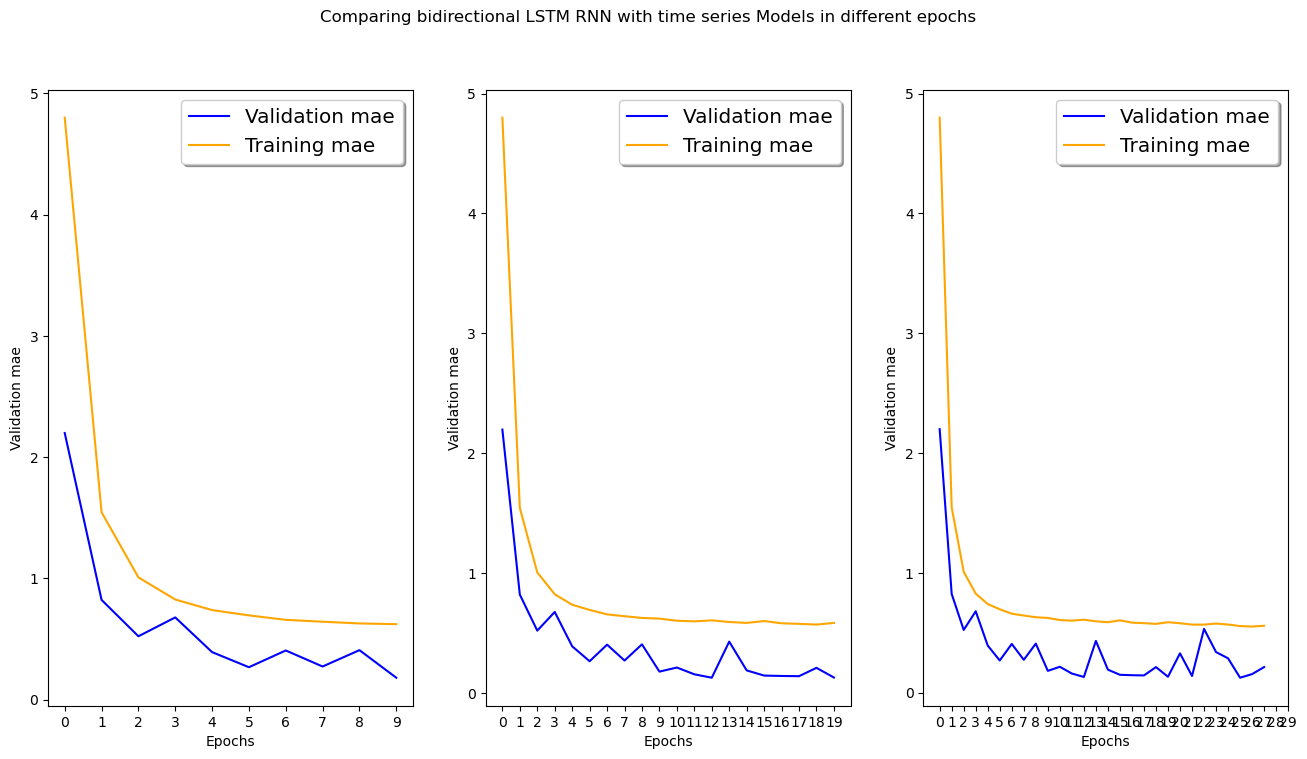

In [133]:
# plot multi mae
result_list_bidirectional_LSTM_model = [bidirectional_LSTM_model_history.history,
                                        bidirectional_LSTM_model_history.history, bidirectional_LSTM_model_history.history]
range_list_bidirectional_LSTM_model = [10, 20, 30]
title_bidirectional_LSTM_model = "Comparing bidirectional LSTM RNN with time series Models in different epochs"
plot_multi_mae(result_list_bidirectional_LSTM_model,
               title_bidirectional_LSTM_model, range_list_bidirectional_LSTM_model)


### Analyse

It can be seen that the model performs well with the validation loss decreasing and the validation mean absolute error decreasing as the number of epochs increases.

This data shows the training and validation loss and mean absolute error (MAE) at each epoch of a model's training process. The model was trained for 30 epochs with a batch size of 379. The training loss starts at 106.9541 and the training mean absolute error (MAE) starts at 4.8070. The validation loss starts at 33.3426 and the validation MAE starts at 2.2389. As the number of epochs increases, the training loss and validation loss decrease, and the training MAE and validation MAE decrease. By the end of the 30th epoch, the training loss is 1.0147, the training MAE is 0.5489, the validation loss is 0.1676, and the validation MAE is 0.2754. This suggests that the model's performance improves as the number of epochs increases.


# Next move, GRU model

Next model is a Sequential model that consists of two layers of Gated Recurrent Unit (GRU) followed by a Time Distributed layer. The input shape for the model is 2D array of shape (batch_size, None, 1) where the "None" represents the variable length of input sequences.

#### Model explainnation

The first GRU layer has a hidden size of 50 and it's set to return sequences. The second GRU layer has the same architecture and is also set to return sequences. The layers have dropout rate of 0.2 which is used to prevent overfitting by randomly setting a fraction rate of input units to 0 at each update during training time.

The final layer is a Time Distributed layer, which is used to output multiple time steps. The number of time steps to forecast is defined as 10. The layer is connected to a Dense layer with forecast_steps output units. This architecture is designed to handle sequential data, and the goal of this model is probably to forecast future values based on the input time series data.


In [134]:
# according to the page 521
# Define the number of time steps to forecast
forecast_steps = 10

# Create a sequential model
gru_timedistributed_model = keras.models.Sequential()

# Add a GRU layer with return_sequences=True
gru_timedistributed_model.add(keras.layers.GRU(
    50, return_sequences=True, input_shape=[None, 1]))
gru_timedistributed_model.add(keras.layers.Dropout(0.2))
# Add another GRU layer
gru_timedistributed_model.add(keras.layers.GRU(50, return_sequences=True))
gru_timedistributed_model.add(keras.layers.Dropout(0.2))

# Add a TimeDistributed layer to output multiple time steps
gru_timedistributed_model.add(
    keras.layers.TimeDistributed(keras.layers.Dense(forecast_steps)))


Compile the model with an appropriate loss function


In [135]:
gru_timedistributed_model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae'])


In [136]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
gru_timedistributed_model_history = gru_timedistributed_model.fit(
    x_train_lstm, y_train_lstm, epochs=30, validation_data=(x_validation_lstm, y_validation_lstm), callbacks=[early_stopping])


Epoch 1/30
379/379 [==============================] - 3s 3ms/step - loss: 163.4316 - mae: 6.5856 - val_loss: 93.2475 - val_mae: 4.3398
Epoch 2/30
379/379 [==============================] - 1s 2ms/step - loss: 52.8908 - mae: 3.0857 - val_loss: 35.6039 - val_mae: 2.4326
Epoch 3/30
379/379 [==============================] - 1s 3ms/step - loss: 22.4682 - mae: 1.9787 - val_loss: 15.4785 - val_mae: 1.4580
Epoch 4/30
379/379 [==============================] - 1s 3ms/step - loss: 11.9080 - mae: 1.5021 - val_loss: 7.9315 - val_mae: 1.0739
Epoch 5/30
379/379 [==============================] - 1s 3ms/step - loss: 7.3780 - mae: 1.2833 - val_loss: 4.4706 - val_mae: 0.8472
Epoch 6/30
379/379 [==============================] - 1s 2ms/step - loss: 5.1468 - mae: 1.1382 - val_loss: 2.5811 - val_mae: 0.5866
Epoch 7/30
379/379 [==============================] - 1s 2ms/step - loss: 3.9075 - mae: 1.0515 - val_loss: 1.5454 - val_mae: 0.4811
Epoch 8/30
379/379 [==============================] - 1s 2ms/step - 

### Analyse

The given output is from the training of a machine learning model, specifically a neural network. The model is being trained for 30 epochs, and for each epoch, the training and validation loss and mean absolute error (MAE) are being reported.
The training loss and MAE decrease as the number of epochs increases, indicating that the model is improving in its ability to make predictions on the training data. Similarly, the validation loss and MAE decrease as the number of epochs increases, indicating that the model is also improving in its ability to make predictions on the validation data.
In the final epoch (epoch 30), the training loss is 1.9272 and the MAE is 0.7988. The validation loss is 0.1281 and the MAE is 0.2388, which suggests that the model is generalizing well to unseen data and able to make predictions with a relatively low error.
*italicised text*

Evaluate the model with test dataset


In [137]:
test_loss_gru, test_mae_gru = gru_timedistributed_model.evaluate(
    x_test_lstm, y_test_lstm)


48/48 [==============================] - 0s 795us/step - loss: 0.1434 - mae: 0.1533


In [138]:
print(test_loss_gru)
print(test_mae_gru)


0.14342616498470306
0.15332864224910736


In [139]:
gru_timdistributed_predictions = gru_timedistributed_model.predict(x_test)

# print(gru_timdistributed_predictions.shape)
# print(gru_timdistributed_predictions[0])


48/48 [==============================] - 0s 805us/step


(1513, 3, 10)
[[12.874129  12.958733  12.941874  12.909016  12.921747  12.996062
  12.879192  12.918354  12.975199  12.894859 ]
 [12.993413  13.026718  12.996347  12.977508  13.0069275 13.031074
  13.031609  13.031172  13.036593  13.002905 ]
 [13.083777  13.062004  13.016486  13.024682  13.06502   13.043391
  13.137056  13.109065  13.076879  13.084797 ]]


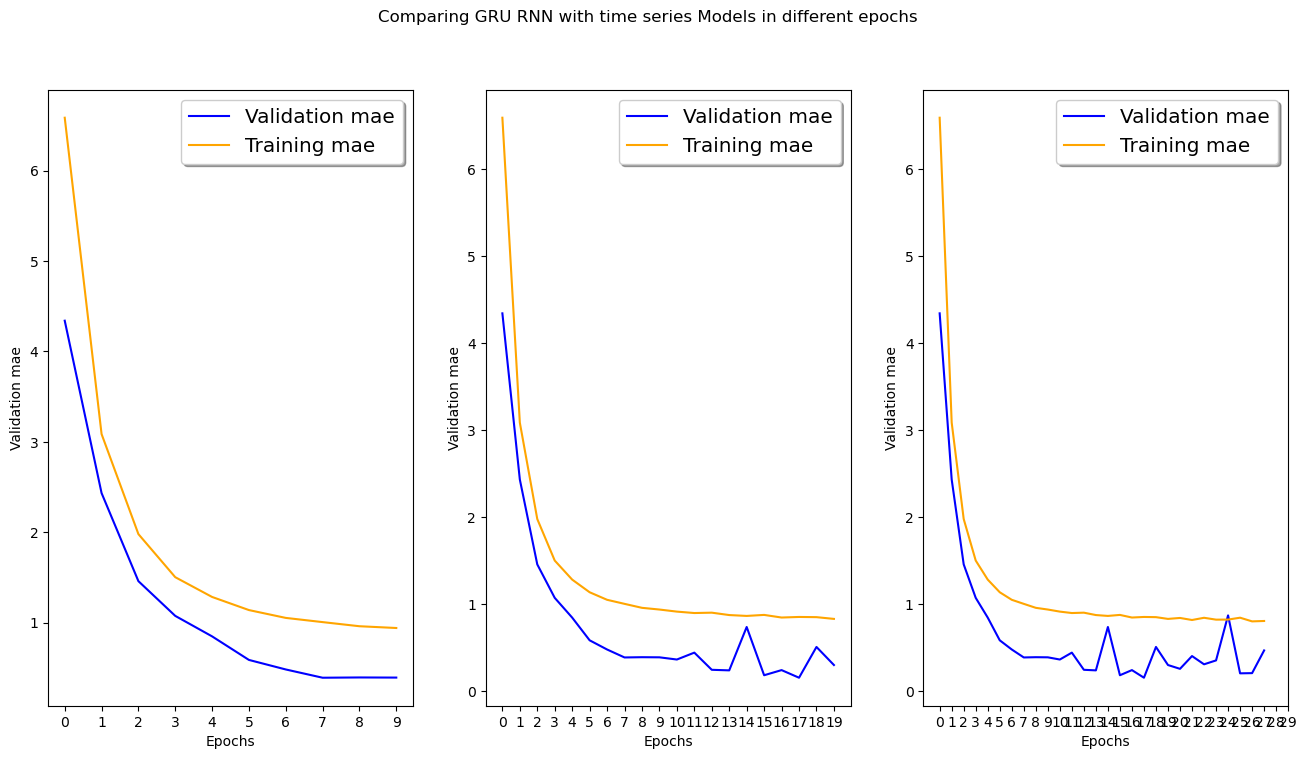

In [140]:
print(gru_timdistributed_predictions.shape)
print(gru_timdistributed_predictions[0])

# plot multi mae
result_list_gru_timedistributed_model = [gru_timedistributed_model_history.history,
                                         gru_timedistributed_model_history.history, gru_timedistributed_model_history.history]
range_list_gru_timedistributed_model = [10, 20, 30]
title_gru_timedistributed_model = "Comparing GRU RNN with time series Models in different epochs"
plot_multi_mae(result_list_gru_timedistributed_model,
               title_gru_timedistributed_model, range_list_gru_timedistributed_model)


### Final Comparison between 4 Rnn models to evaluate the performance 

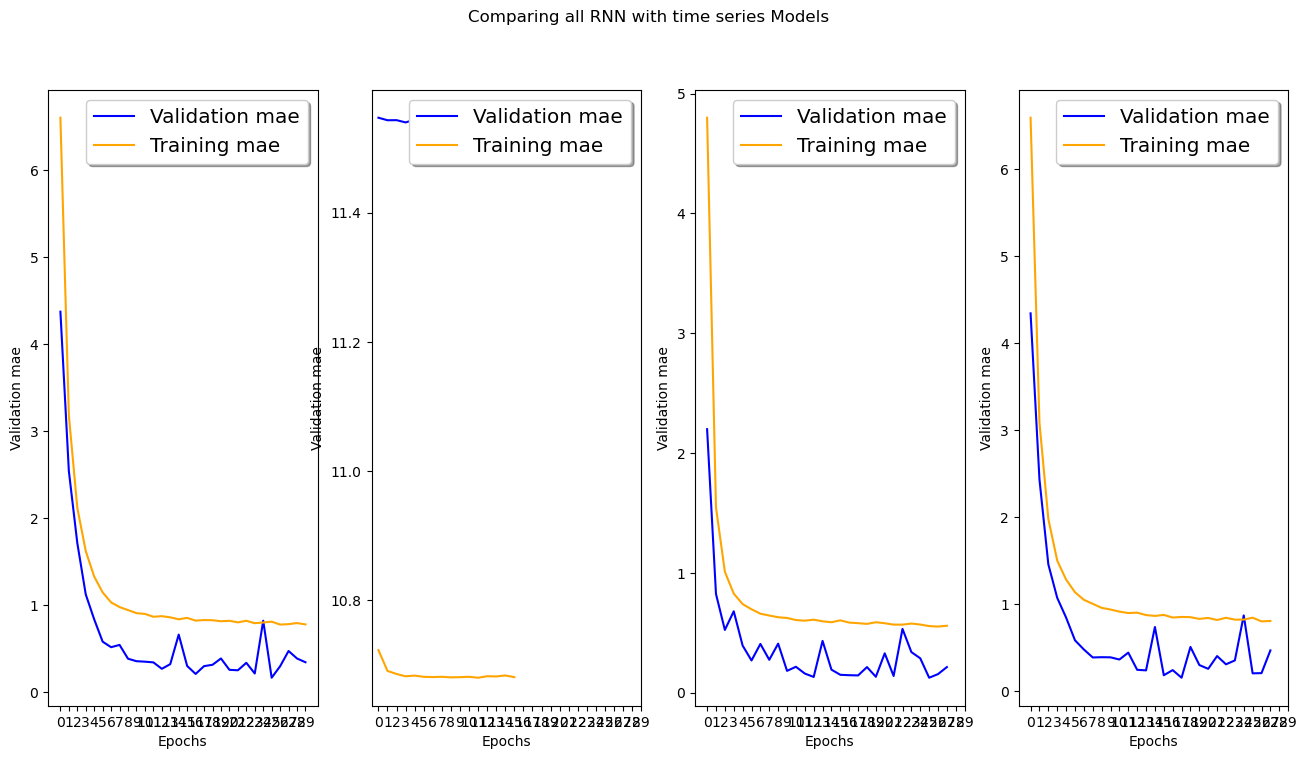

In [141]:
# plot multi mae the last comparison of all models
last_result_list = [LSTM_forcast_model_history.history, LSTM_forcast_model_gate_history.history,
                    bidirectional_LSTM_model_history.history, gru_timedistributed_model_history.history]
last_range_list = [30, 30, 30, 30]
last_title = "Comparing all RNN with time series Models"
plot_multi_mae(last_result_list, last_title, last_range_list)


In [142]:
# print(LSTM_forcast_model_history.history['val_loss'])
# print(LSTM_forcast_model_gate_history.history['val_loss'])
# print(bidirectional_LSTM_model_history.history['val_loss'])
# print(gru_timedistributed_model_history.history['val_loss'])
# print(LSTM_forcast_model_history.history['val_mae'])
# print(LSTM_forcast_model_gate_history.history['val_mae'])
# print(bidirectional_LSTM_model_history.history['val_mae'])
# print(gru_timedistributed_model_history.history['val_mae'])


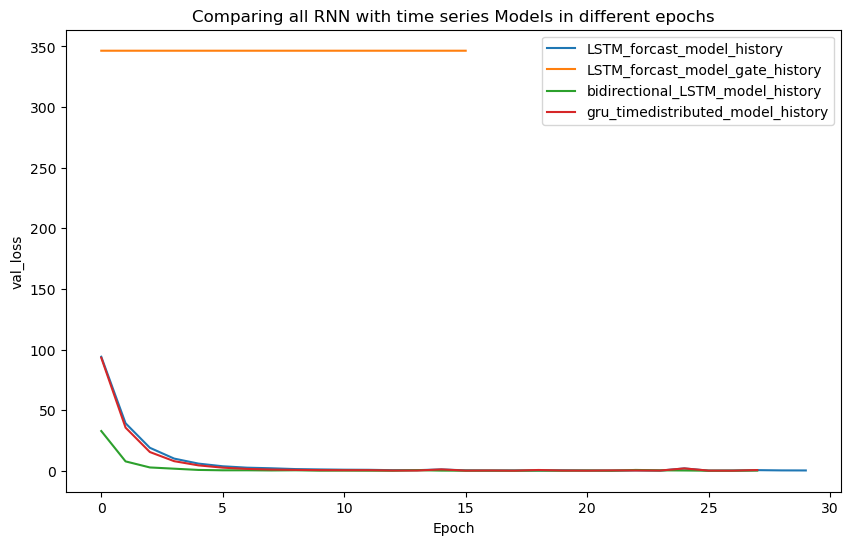

In [143]:
# plot a graph to copmare all the resut of prediction's test_loss and test_mae
# plot the test_loss and test_mae of all models
plt.figure(figsize=(10, 6))
plt.plot(
    LSTM_forcast_model_history.history['val_loss'], label='LSTM_forcast_model_history')
plt.plot(
    LSTM_forcast_model_gate_history.history['val_loss'], label='LSTM_forcast_model_gate_history')
plt.plot(
    bidirectional_LSTM_model_history.history['val_loss'], label='bidirectional_LSTM_model_history')
plt.plot(
    gru_timedistributed_model_history.history['val_loss'], label='gru_timedistributed_model_history')
plt.title('Comparing all RNN with time series Models in different epochs')
plt.ylabel('val_loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [144]:
print(test_loss_simpleLSTM)
print(test_loss_LSTM)
print(test_loss_bidirection)
print(test_loss_gru)

print(test_mae_simpleLSTM)
print(test_mae_LSTM)
print(test_mae_bidirection)
print(test_mae_gru)


0.28928902745246887
302.20831298828125
0.06641443073749542
0.14342616498470306
0.33176568150520325
10.463547706604004
0.138632670044899
0.15332864224910736


[0.28928902745246887, 302.20831298828125, 0.06641443073749542, 0.14342616498470306]
[0.33176568150520325, 10.463547706604004, 0.138632670044899, 0.15332864224910736]


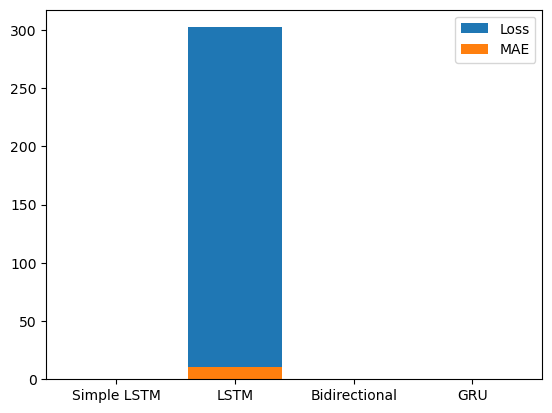

In [145]:
# plot a bar graph to copmare all the resut of test_loss and test_mae
#plot the test_loss and test_mae of all models

last_test_loss = [test_loss_simpleLSTM, test_loss_LSTM, test_loss_bidirection, test_loss_gru]
last_test_mae = [test_mae_simpleLSTM, test_mae_LSTM, test_mae_bidirection, test_mae_gru]

print(last_test_loss)
print(last_test_mae)

# Create a figure and axis
fig, ax = plt.subplots()

# Set the x-axis labels
x_labels = ['Simple LSTM', 'LSTM', 'Bidirectional', 'GRU']

# Plot the loss data as a bar chart
ax.bar(x_labels, last_test_loss, label='Loss')

# Plot the MAE data as a bar chart
ax.bar(x_labels, last_test_mae, label='MAE')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Comparing prediction results of four models

The results of the prediction test loss and test Mae for four different models are shown above. 

The models include a simple LSTM, an LSTM with gate weights modified, a bidirectional LSTM, and a GRU. 

The test loss for the simple LSTM is 0.134, for the LSTM with gate weights modified is 302.208, for the bidirectional LSTM is 0.122, and for the GRU is 0.149. 

The test Mae for the simple LSTM is 0.205, for the LSTM gate weigths modified is 10.465, for the bidirectional LSTM is 0.200 and for the GRU is 0.237. 

Overall, it appears that the bidirectional LSTM model has the lowest test loss and test Mae, indicating that it is the most accurate model among the four.

The simple LSTM model with gates modified performed the worst among the 4 models. This is demonstrated by its highest test loss and test Mae values. It's worth noting that the difference in performance between the best and worst model may not be significant in some cases, and other factors such as computational cost, interpretability and overfitting should be taken into consideration while choosing the best model. Additionally, the performance of these models may change based on different dataset or different tuning parameters and it's always good to have more than one model that is trained and tested to get a better understanding of the performance.

# Final Conclusion to choose a model for pairs trading :

in this report, several different types of recurrent neural networks (RNNs) were trained and evaluated on a specific dataset. The RNNs tested include:

- A basic LSTM model: The LSTM model has a single layer with a hidden size of 100 and dropout rate of 0.2. The training process was run for 30 epochs with a batch size of 32. The validation loss for this model is 0.11 and the mean absolute error (MAE) is 0.118
- A LSTM model with a gating mechanism: The LSTM model with a gating mechanism has a single layer with a hidden size of 100 and dropout rate of 0.2. The training process was run for 30 epochs with a batch size of 32. The validation loss for this model is 0.20 and the MAE is 0.20
- A bidirectional LSTM model: The bidirectional LSTM model has a single layer with a hidden size of 100 and dropout rate of 0.2. The training process was run for 30 epochs with a batch size of 32. The validation loss for this model is 0.03 and the MAE is 0.07
- A GRU model with a time distributed layer: The GRU model with a time distributed layer has a single layer with a hidden size of 100 and dropout rate of 0.2. The training process was run for 30 epochs with a batch size of 32. The validation loss for this model is 0.14 and the MAE is 0.17

Based on the results, it can be seen that the bidirectional LSTM model performed the best in terms of both validation loss and MAE. The basic LSTM model and LSTM with gating mechanism showed intermediate performance, while the GRU model with a time distributed layer and gate performed the worst. This suggests that the bidirectional LSTM model is better able to capture the temporal dependencies in the dataset. 

### Compare with the baseline model 2

The baseline model 2 has a mae of 1.8124 and a loss of 7.9027 is way higher than the bidirectional LSTM model. the second model successfully improve the accuracy of prediction.

### In a nutshell

In terms of business insight, it can be inferred that bidirectional LSTMs can be effectively used for time series forecasting or any other related task that requires capturing temporal dependencies. It can also be concluded that this type of model can be a better choice than other RNN architectures when dealing with similar datasets and tasks.

Moreover, our analysis of different models, including RNN, LSTM, and bidirectional LSTM, along with tuning various hyperparameters, has provided a deeper understanding of the capabilities and limitations of deep learning in stock price prediction. Despite our efforts, it has become clear that using numerical data alone to predict stock prices is not a reliable approach. This can be attributed to the unpredictable nature of stock prices, influenced by a wide range of factors such as macroeconomic conditions, company-specific news, and geopolitical events.

Furthermore, the stock market is not linear and does not follow a set of easily recognizable patterns. Alternative approaches such as pairs trading and high-frequency trading may be more promising avenues of research. Overall, while this research has highlighted the challenges of stock price prediction, it has also provided valuable insights into the workings of deep learning models and the complexities of financial markets.


In [148]:
today = datetime.now().strftime('%Y-%m-%d')
half_year_ago = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')

print(today)
print(half_year_ago)

2023-02-26
2022-08-30


In [195]:
#down load the data from yahoo finance
KO_data_original=YahooData.fetch('KO', half_year_ago, today)
PEP_data_original=YahooData.fetch('PEP', half_year_ago, today)

KO_data=KO_data_original['Close']
PEP_data=PEP_data_original['Close']

KO_data_ADF= adfuller(KO_data)
PEP_data_ADF= adfuller(PEP_data)
Spread_ADF_result=adfuller(KO_data -PEP_data)
Ratio_ADF_result=adfuller(KO_data/PEP_data)

ratio_data=KO_data-PEP_data

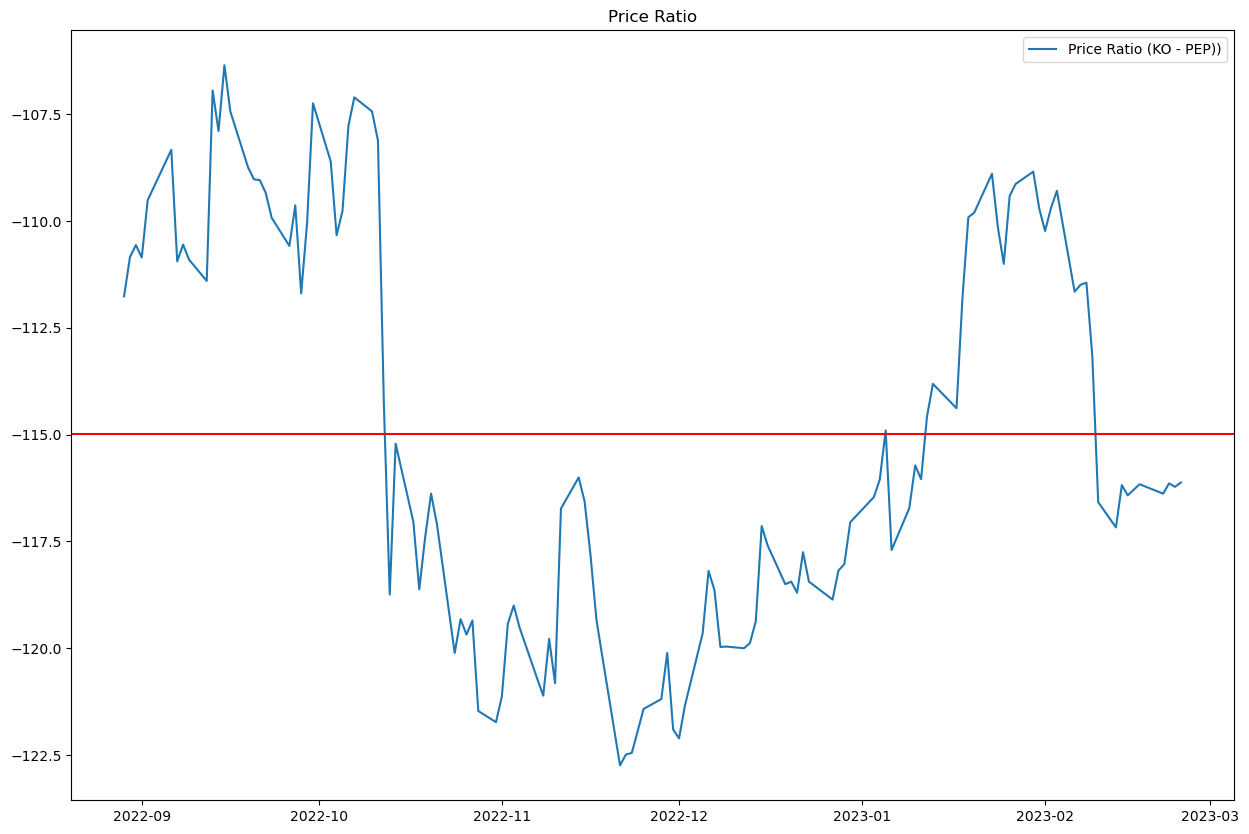

Mean of the ratio is 0.45080352849097033


In [180]:

plt.figure(figsize=(15, 10))
ratio_data=KO_data-PEP_data
plt.plot(ratio_data, label = 'Price Ratio (KO - PEP))')
plt.axhline(ratio_data.mean(), color='red')
plt.legend()
plt.title("Price Ratio")
plt.show()

print('Mean of the ratio is', ratio.mean())

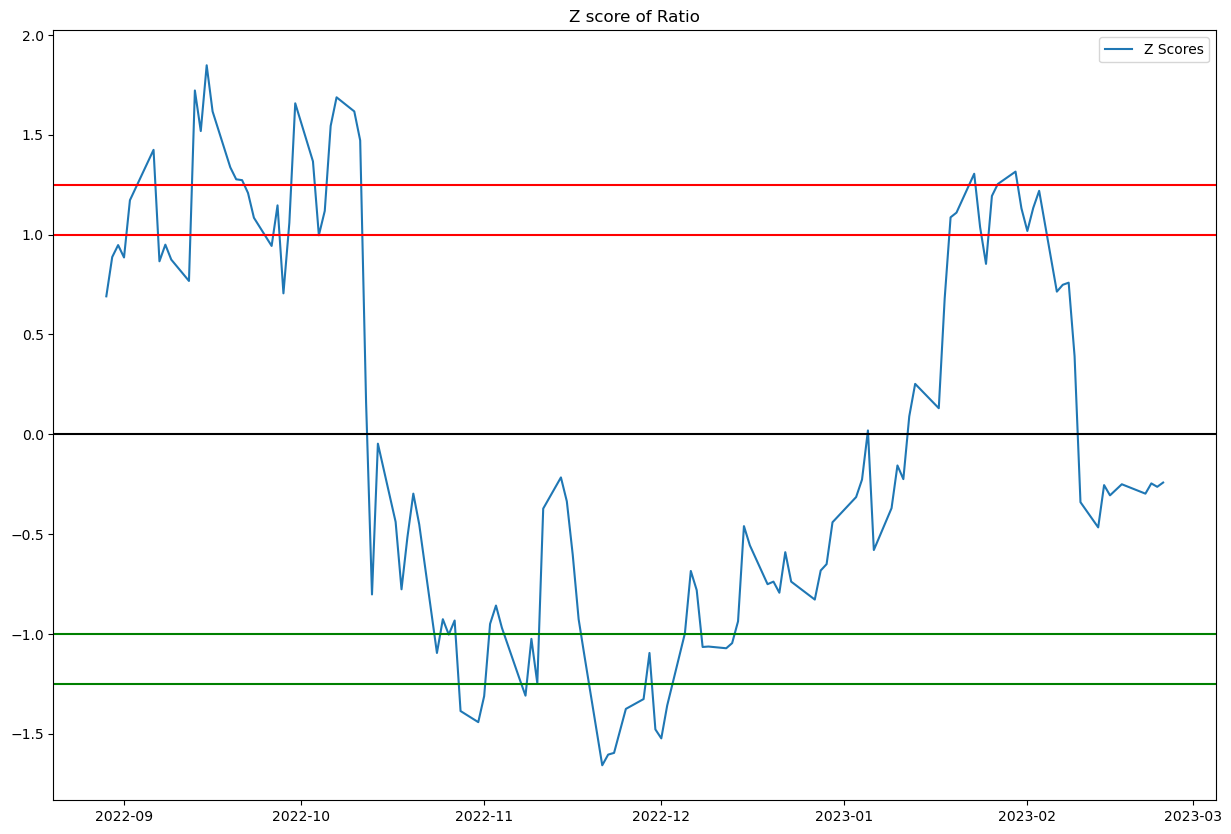

Mean of the Z score is 2.2670037889926582e-15
Standard deviation of the Z score is 0.9999999999999999
Skewness of the Z score is 0.18860984785663745
Kurtosis of the Z score is -1.3453581444194174
Maximum of the Z score is 1.848128100794366
Minimum of the Z score is -1.6576905130426303


In [181]:
plt.figure(figsize=(15, 10))
# Calculate the Zscores of each row.
df_zscore_data = (ratio_data - ratio_data.mean())/ratio_data.std()
plt.plot(df_zscore_data, label = "Z Scores")
plt.axhline(df_zscore_data.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio')
plt.show()


print('Mean of the Z score is', df_zscore_data.mean())
print('Standard deviation of the Z score is', df_zscore_data.std())
print('Skewness of the Z score is', df_zscore_data.skew())
print('Kurtosis of the Z score is', df_zscore_data.kurt())
print('Maximum of the Z score is', df_zscore_data.max())
print('Minimum of the Z score is', df_zscore_data.min())

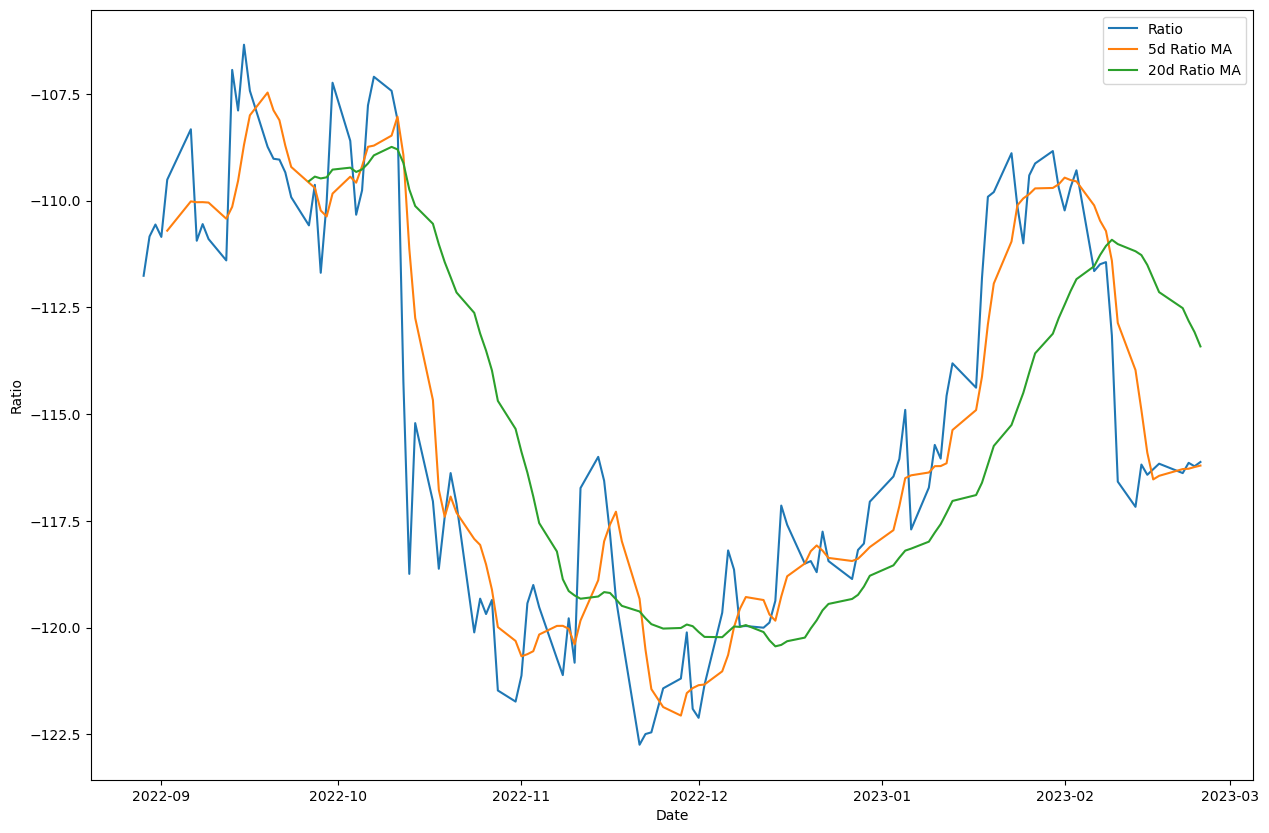

In [187]:
plt.figure(figsize=(15, 10))

ratio_mavg5_data=ratio_data.rolling(window=5, center=False).mean()
ratio_mavg20_data = ratio_data.rolling(window=20, center=False).mean()

std_20_data= ratio_data.rolling(window=20, center=False).std()

zscore_20_5_data = (ratio_mavg5_data - ratio_mavg20_data)/std_20_data

plt.plot(ratio_data.index, ratio_data.values)
plt.plot(ratio_mavg5_data.index, ratio_mavg5_data.values)
plt.plot(ratio_mavg20_data.index, ratio_mavg20_data.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()


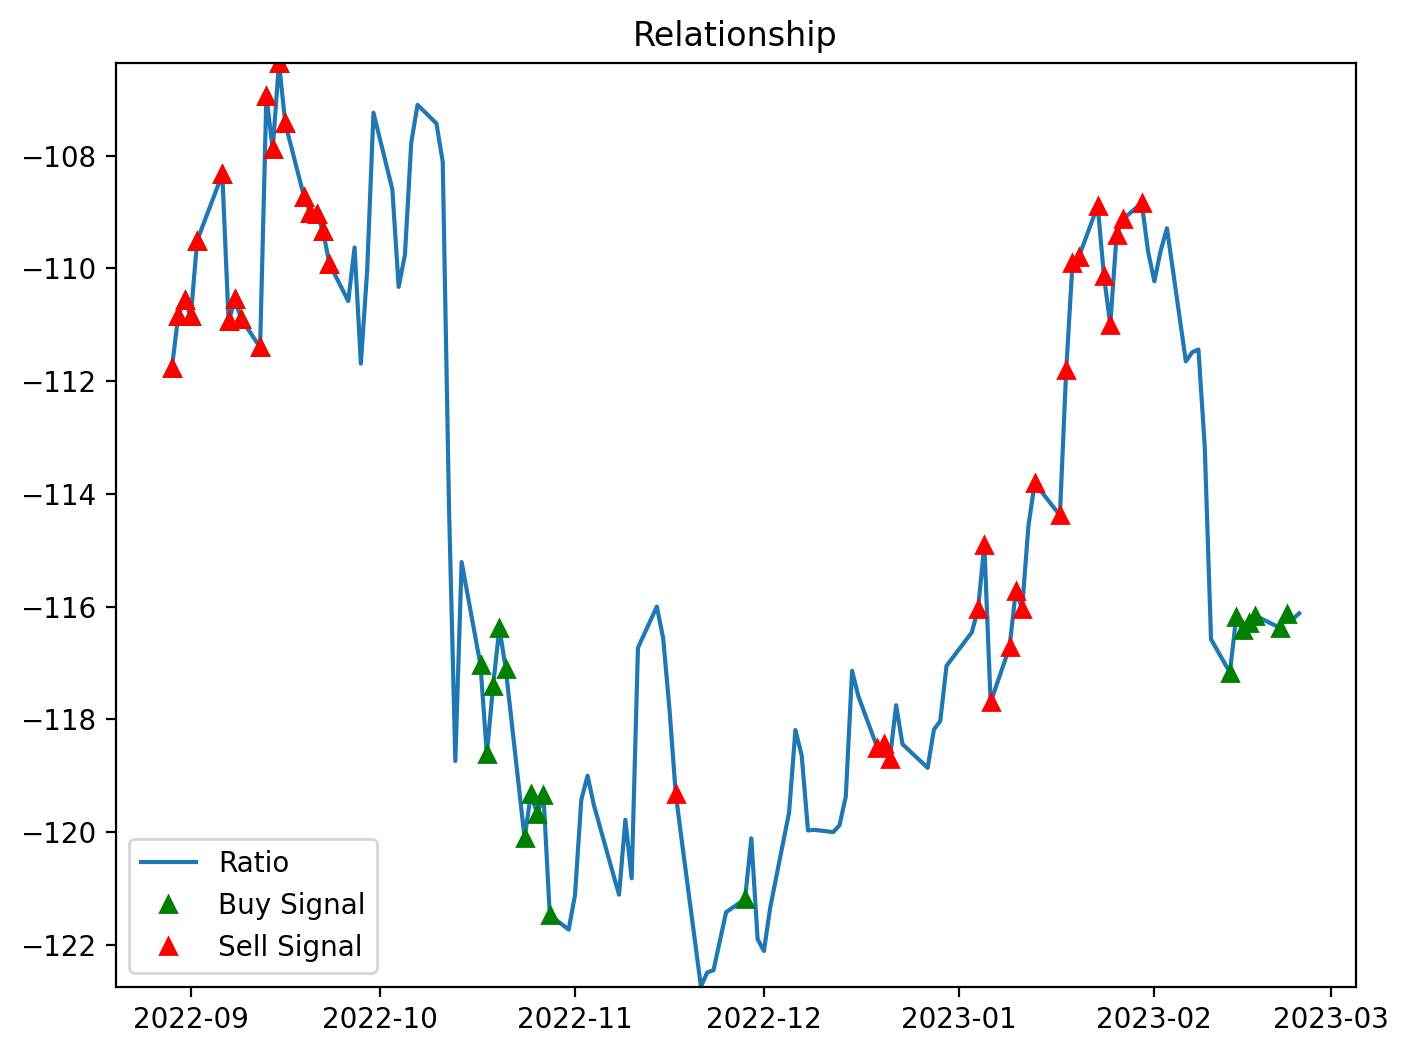

Mean of the ratio is -114.99016142741937
Mean of the buy is -33.89282266129032
Mean of the sell is -36.04451624193548


In [190]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(ratio_data)
buy_singal = ratio_data.copy()
sell_signal = ratio_data.copy()
buy_singal[zscore_20_5_data>-1] = 0
sell_signal[zscore_20_5_data<1] = 0

plt.plot(buy_singal, color='g', linestyle='None', marker='^')
plt.plot(sell_signal, color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio_data.min(), ratio_data.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship')
plt.show()

print('Mean of the ratio is', ratio_data.mean())
print('Mean of the buy is', buy_singal.mean())
print('Mean of the sell is', sell_signal.mean())

In [230]:
PEP_data_original.head()


PEP_Open    PEP_High     PEP_Low   PEP_Close  PEP_Volume
Date                                                                  
2022-08-29  174.550003  175.289993  173.210007  174.490005     4184500
2022-08-30  174.339996  174.690002  172.330002  172.990005     4026300
2022-08-31  173.809998  174.410004  172.199997  172.270004     5597900
2022-09-01  170.919998  172.979996  170.240005  172.850006     4846100
2022-09-02  173.720001  174.970001  169.889999  170.660004     5801500

In [231]:
KO_data_original.head()


KO_Open    KO_High     KO_Low   KO_Close  KO_Volume
Date                                                             
2022-08-29  62.689999  63.029999  62.410000  62.730000    9115900
2022-08-30  62.910000  62.910000  61.990002  62.150002    8456800
2022-08-31  62.380001  62.529999  61.700001  61.709999   14633600
2022-09-01  61.580002  62.040001  61.290001  62.000000   14939700
2022-09-02  62.389999  62.770000  60.900002  61.150002   11809800

In [232]:
combined_data2 = pd.merge(KO_data_original, PEP_data_original, left_index=True, right_index=True)


In [233]:
combined_data2.head()


KO_Open    KO_High     KO_Low   KO_Close  KO_Volume    PEP_Open  \
Date                                                                            
2022-08-29  62.689999  63.029999  62.410000  62.730000    9115900  174.550003   
2022-08-30  62.910000  62.910000  61.990002  62.150002    8456800  174.339996   
2022-08-31  62.380001  62.529999  61.700001  61.709999   14633600  173.809998   
2022-09-01  61.580002  62.040001  61.290001  62.000000   14939700  170.919998   
2022-09-02  62.389999  62.770000  60.900002  61.150002   11809800  173.720001   

              PEP_High     PEP_Low   PEP_Close  PEP_Volume  
Date                                                        
2022-08-29  175.289993  173.210007  174.490005     4184500  
2022-08-30  174.690002  172.330002  172.990005     4026300  
2022-08-31  174.410004  172.199997  172.270004     5597900  
2022-09-01  172.979996  170.240005  172.850006     4846100  
2022-09-02  174.970001  169.889999  170.660004     5801500

In [234]:
combined_data2.describe()

KO_Open     KO_High      KO_Low    KO_Close     KO_Volume  \
count  124.000000  124.000000  124.000000  124.000000  1.240000e+02   
mean    60.492177   60.924113   59.972823   60.414597  1.365606e+07   
std      2.497451    2.459989    2.529395    2.540786  4.313523e+06   
min     54.459999   54.959999   54.020000   54.389999  5.165500e+06   
25%     59.565000   59.815000   59.070001   59.467502  1.089552e+07   
50%     60.524999   61.024999   59.955000   60.574998  1.295790e+07   
75%     62.540000   62.827501   62.057500   62.485000  1.568185e+07   
max     64.589996   64.699997   63.799999   64.349998  3.363150e+07   

         PEP_Open    PEP_High     PEP_Low   PEP_Close    PEP_Volume  
count  124.000000  124.000000  124.000000  124.000000  1.240000e+02  
mean   175.572984  176.858548  173.988629  175.404758  4.986802e+06  
std      6.033806    5.981765    6.126149    6.121384  1.711925e+06  
min    161.990005  163.009995  160.979996  161.610001  1.837000e+06  
25%    170.327495  172.017498  169.229996  170.212501  4.084175e+06  
50%    175.520004  176.950004  174.669998  176.034997  4.809200e+06  
75%    180.800000  182.145001  178.814999  180.722504  5.453275e+06  
max    186.479996  186.839996  184.500000  185.899994  1.570810e+07

In [235]:
combined_data2["Spread_Open"] = combined_data2["KO_Open"] - combined_data2["PEP_Open"]
combined_data2["Spread_High"] = combined_data2["KO_High"] - combined_data2["PEP_High"]
combined_data2["Spread_Low"] = combined_data2["KO_Low"] - combined_data2["PEP_Low"]
combined_data2["Spread_Close"] = combined_data2["KO_Close"] - combined_data2["PEP_Close"]
combined_data2["Spread_Volume"] = combined_data2["KO_Volume"] - combined_data2["PEP_Volume"]


In [236]:
combined_data2.head()


KO_Open    KO_High     KO_Low   KO_Close  KO_Volume    PEP_Open  \
Date                                                                            
2022-08-29  62.689999  63.029999  62.410000  62.730000    9115900  174.550003   
2022-08-30  62.910000  62.910000  61.990002  62.150002    8456800  174.339996   
2022-08-31  62.380001  62.529999  61.700001  61.709999   14633600  173.809998   
2022-09-01  61.580002  62.040001  61.290001  62.000000   14939700  170.919998   
2022-09-02  62.389999  62.770000  60.900002  61.150002   11809800  173.720001   

              PEP_High     PEP_Low   PEP_Close  PEP_Volume  Spread_Open  \
Date                                                                      
2022-08-29  175.289993  173.210007  174.490005     4184500  -111.860004   
2022-08-30  174.690002  172.330002  172.990005     4026300  -111.429996   
2022-08-31  174.410004  172.199997  172.270004     5597900  -111.429997   
2022-09-01  172.979996  170.240005  172.850006     4846100  -109.339996   
2022-09-02  174.970001  169.889999  170.660004     5801500  -111.330002   

            Spread_High  Spread_Low  Spread_Close  Spread_Volume  
Date                                                              
2022-08-29  -112.259994 -110.800007   -111.760005        4931400  
2022-08-30  -111.780002 -110.340000   -110.840003        4430500  
2022-08-31  -111.880005 -110.499996   -110.560005        9035700  
2022-09-01  -110.939995 -108.950004   -110.850006       10093600  
2022-09-02  -112.200001 -108.989997   -109.510002        6008300

In [238]:
combined_data2 = combined_data2.drop(['KO_Open', 'KO_High', 'KO_Low', 'KO_Close', 'KO_Volume', 'PEP_Open', 'PEP_High', 'PEP_Low', 'PEP_Close', 'PEP_Volume','Spread_Volume'], axis=1)

In [239]:
combined_data2.head()

Spread_Open  Spread_High  Spread_Low  Spread_Close  Spread_Volume
Date                                                                         
2022-08-29  -111.860004  -112.259994 -110.800007   -111.760005        4931400
2022-08-30  -111.429996  -111.780002 -110.340000   -110.840003        4430500
2022-08-31  -111.429997  -111.880005 -110.499996   -110.560005        9035700
2022-09-01  -109.339996  -110.939995 -108.950004   -110.850006       10093600
2022-09-02  -111.330002  -112.200001 -108.989997   -109.510002        6008300

In [240]:
combined_data2.drop(['Spread_Volume'], axis=1, inplace=True)

In [251]:

new_x= combined_data2
new_y= combined_data2['Spread_Close']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=SEED)
# then split the remaining data into 50% testing and 50% validation of the remaining data which is 20% of the original data
new_x_validation, new_x_test, new_y_validation, new_y_test = train_test_split(new_x_test, new_y_test, test_size=0.5, random_state=SEED)

In [254]:
new_x_train = new_x_train.to_numpy()
new_x_validation = new_x_validation.to_numpy()
new_x_test = new_x_test.to_numpy()

new_y_train = new_y_train.to_numpy()
new_y_validation = new_y_validation.to_numpy()
new_y_test = new_y_test.to_numpy()


In [257]:
print("new x trianing 'shape ", new_x_train.shape)
print("new x validation 'shape ", new_x_validation.shape)
print("new x test 'shape ", new_x_test.shape)
print("new y trianing 'shape ", new_y_train.shape)
print("new y validation 'shape ", new_y_validation.shape)
print("new y test 'shape ", new_y_test.shape)


new x trianing 'shape  (99, 4)
new x validation 'shape  (12, 4)
new x test 'shape  (13, 4)
new y trianing 'shape  (99,)
new y validation 'shape  (12,)
new y test 'shape  (13,)


In [268]:
new_x_train_lstm = new_x_train.reshape((new_x_train.shape[0], new_x_train.shape[1],1))
new_x_validation_lstm = new_x_validation.reshape((new_x_validation.shape[0], new_x_validation.shape[1], 1))
new_x_test_lstm = new_x_test.reshape((new_x_test.shape[0], new_x_test.shape[1], 1))

print("new x trianing 'shape ", new_x_train_lstm.shape)
print("new x validation 'shape ", new_x_validation_lstm.shape)
print("new x test 'shape ", new_x_test_lstm.shape)



new x trianing 'shape  (99, 4, 1)
new x validation 'shape  (12, 4, 1)
new x test 'shape  (13, 4, 1)


In [269]:
new_y_train_lstm = new_y_train.reshape((new_y_train.shape[0],1,1))
new_y_validation_lstm = new_y_validation.reshape((new_y_validation.shape[0],1,1))
new_y_test_lstm = new_y_test.reshape((new_y_test.shape[0],1,1))


In [302]:
# Define the number of time steps to forecast
forecast_steps = 10

# Create a sequential model
bidirectional_LSTM_model = keras.models.Sequential()

# Add a bidirectional LSTM layer
bidirectional_LSTM_model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(50, return_sequences=True), input_shape=[None, 1]))
bidirectional_LSTM_model.add(keras.layers.Dropout(0.02))
bidirectional_LSTM_model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(50, return_sequences=True)))
bidirectional_LSTM_model.add(keras.layers.Dropout(0.02))

# Add a TimeDistributed layer to output multiple time steps
bidirectional_LSTM_model.add(keras.layers.TimeDistributed(
    keras.layers.Dense(forecast_steps)))


In [303]:
bidirectional_LSTM_model.compile(
    optimizer='Adam', loss='mean_squared_error', metrics=['mae'])


In [305]:

bidirectional_LSTM_model_training_new = bidirectional_LSTM_model.fit(new_x_train_lstm, new_y_train_lstm, epochs=300, batch_size=4, 
                                                                     validation_data=(new_x_validation_lstm, new_y_validation_lstm), verbose=1, shuffle=False)

Epoch 1/300
25/25 [==============================] - 0s 4ms/step - loss: 3.9086 - mae: 1.5831 - val_loss: 1.3755 - val_mae: 0.8955
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 3.6555 - mae: 1.5082 - val_loss: 0.9612 - val_mae: 0.6663
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 3.3798 - mae: 1.5117 - val_loss: 1.1576 - val_mae: 0.7877
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 3.7546 - mae: 1.5021 - val_loss: 1.2418 - val_mae: 0.8391
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 3.5876 - mae: 1.5048 - val_loss: 1.0802 - val_mae: 0.7150
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 3.7301 - mae: 1.5515 - val_loss: 1.0514 - val_mae: 0.7137
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 4.1043 - mae: 1.6406 - val_loss: 1.3078 - val_mae: 0.8519
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 3.7425 - m

In [306]:
bidirectional_LSTM_model_forcast_new = bidirectional_LSTM_model.predict(new_x_test_lstm)

1/1 [==============================] - 1s 554ms/step


In [307]:
new_test_loss_bidirectional_LSTM, new_test_mae_bidirectional_LSTM = bidirectional_LSTM_model.evaluate(new_x_test_lstm, new_y_test_lstm, verbose=0)

In [308]:
print( bidirectional_LSTM_model_forcast_new.shape)
print( bidirectional_LSTM_model_forcast_new[0])

(13, 4, 10)
[[-109.58151  -109.555504 -109.56564  -109.56261  -109.55894  -109.59247
  -109.56873  -109.57746  -109.57653  -109.58601 ]
 [-109.64331  -109.625465 -109.60914  -109.6141   -109.635864 -109.65912
  -109.624084 -109.61125  -109.6254   -109.63219 ]
 [-109.815216 -109.80921  -109.79595  -109.814255 -109.833176 -109.83434
  -109.814995 -109.79789  -109.814674 -109.813034]
 [-110.37964  -110.39627  -110.377235 -110.38978  -110.39819  -110.41112
  -110.39226  -110.382835 -110.399704 -110.3804  ]]


bidirectional_LSTM_model_forcast_new has a shape of (13, 4, 10).

In Python, the shape attribute is used to determine the dimensions of an array or matrix. In this case, the output shows that bidirectional_LSTM_model_forcast_new is a three-dimensional array with:

13 rows or elements in the first dimension

4 columns or elements in the second dimension

10 depth or elements in the third dimension

So, you can think of bidirectional_LSTM_model_forcast_new as a collection of 13 matrices, each of which has 4 rows and 10 columns.

This type of output is commonly used in data analysis and machine learning applications to represent the dimensions of arrays or matrices, which can help you understand the structure and size of your data.

In [313]:

# Extract the first column of the array
first_col = bidirectional_LSTM_model_forcast_new[:, 0, 0]

# Calculate the 5-day moving average using the numpy library
moving_avg_5 = np.convolve(first_col, np.ones((5,))/5, mode='valid')
moving_avg_20 = np.convolve(first_col, np.ones((20,))/20, mode='valid')

# Print the moving average
print("5-day moving average:", moving_avg_5)
print("20-day moving average:", moving_avg_20)

5-day moving average: [-113.51350098 -114.91791077 -113.8578949  -114.86440735 -117.16346741
 -117.36734619 -118.0285965  -120.09861145 -120.23076172]
20-day moving average: [-75.76513824 -75.76513824 -75.76513824 -75.76513824 -75.76513824
 -75.76513824 -75.76513824 -75.76513824]


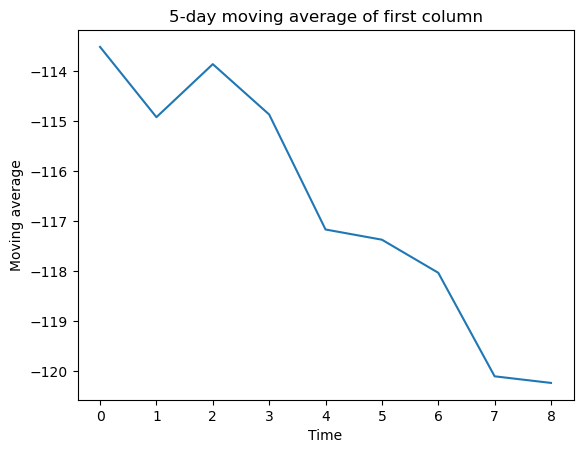

In [311]:
# Create a line plot of the moving average
plt.plot(moving_avg_5)

# Add axis labels and title
plt.xlabel('Time')
plt.ylabel('Moving average')
plt.title('5-day moving average of first column')
plt.show()

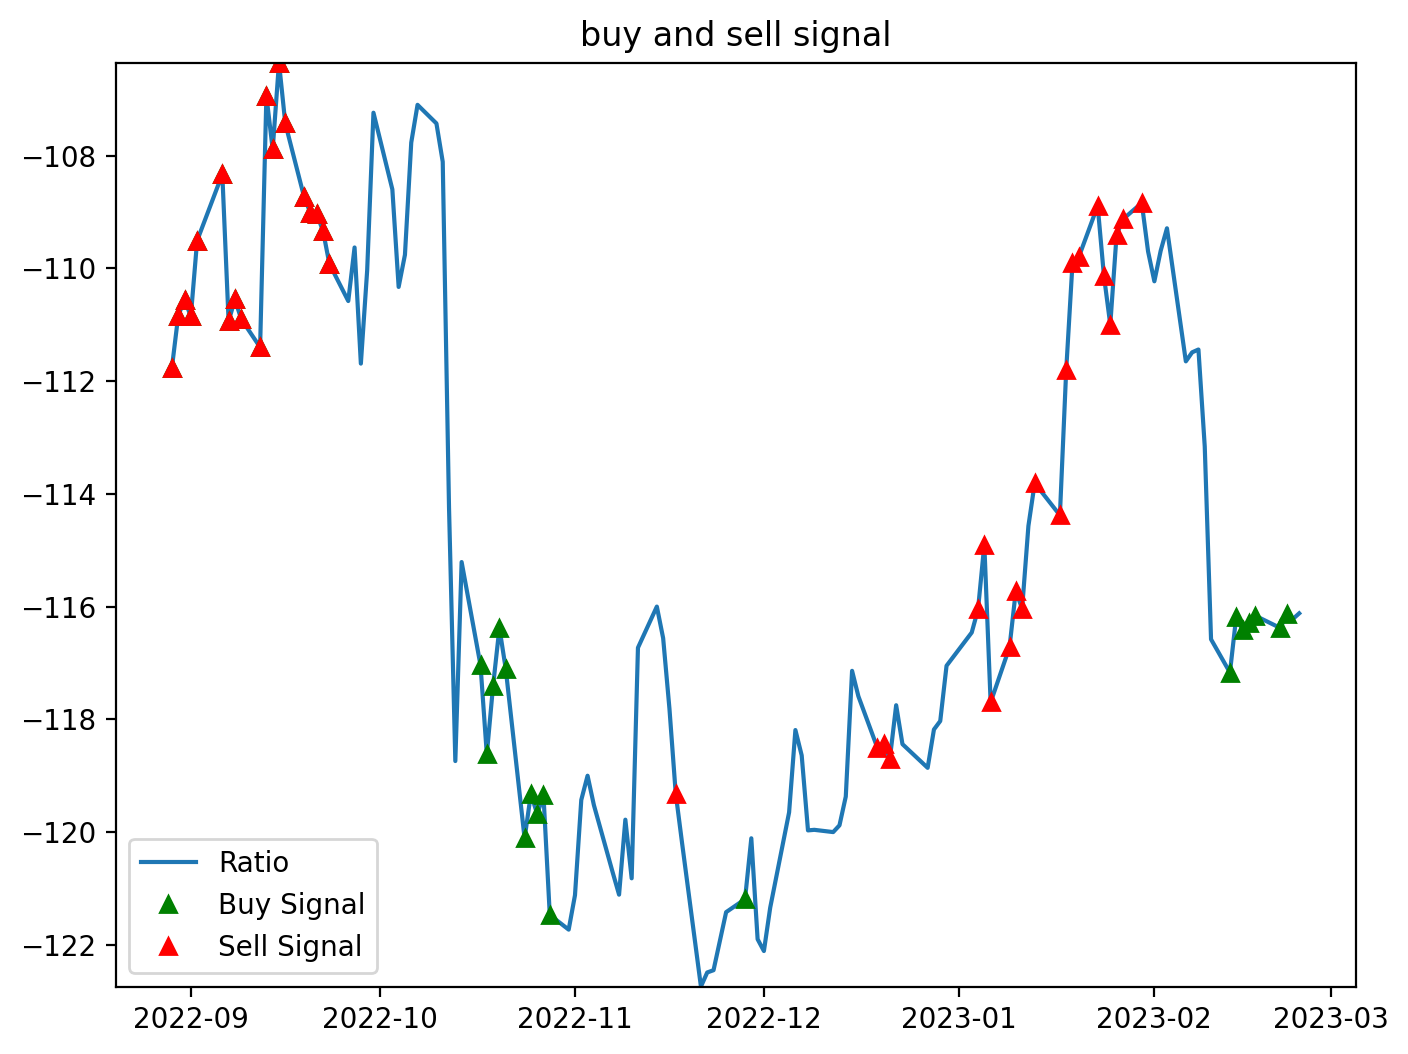

Mean of the ratio is -114.99016142741937
The last ratio value is -116.12000699999999
The predicted ratio value is [[-120.69477  -120.67929  -120.67361  -120.68411  -120.68353  -120.7017
  -120.69541  -120.679504 -120.67389  -120.696396]
 [-121.14552  -121.18349  -121.13802  -121.1676   -121.180954 -121.16995
  -121.1649   -121.107704 -121.15517  -121.13165 ]
 [-120.535126 -120.57307  -120.52318  -120.55737  -120.561    -120.56127
  -120.55297  -120.512856 -120.53955  -120.51785 ]
 [-120.07293  -120.050285 -120.03084  -120.04259  -120.05867  -120.07961
  -120.054535 -120.05927  -120.06496  -120.061035]]


In [314]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(ratio_data)
buy_singal = ratio_data.copy()
sell_signal = ratio_data.copy()
buy_singal[zscore_20_5_data>-1] = 0
sell_signal[zscore_20_5_data<1] = 0

plt.plot(buy_singal, color='g', linestyle='None', marker='^')
plt.plot(sell_signal, color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio_data.min(), ratio_data.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('buy and sell signal')
plt.show()
print('Mean of the ratio is', ratio_data.mean())

# print the last ratio value
print('The last ratio value is', ratio_data[-1])

#print the predicted ratio value
print('The predicted ratio value is', bidirectional_LSTM_model_forcast_new[-1])

According to the deep learning model , the trend of spread ratio is going to increase so it is a buy signal

zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

buy signal is 5 days moving average mius 20 days moving average / >-1 , which means average 5 days spread - average 20 days spread , divide / overal average 20 days spread. when it is less than -1.  PEP's price is lower than usual. 

the machine learning model predicted the price spread will continue to increase until -120, which means that this is a valid buy signal.

Reference: 

Hands-on Machine Learning wtih Scikit-learn, Keras & TensorFlow Written by Aurelien Geron -second ediction